In [2]:
from pyedflib import highlevel
import pyedflib as plib
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

def read_file_signal(file_path, index):
    f = plib.EdfReader(file_path)
    signal = f.readSignal(index)
    f.close()
    return signal

def signal_labels(file_path):
    f = plib.EdfReader(file_path)
    labels = f.getSignalLabels()
    f.close()
    return labels

def combined_signal(file_list, index):
    combined_signals = []
    for file in file_list:
        temp = read_file_signal(file, index)
        combined_signals.append(temp)
    return np.concatenate(combined_signals)

def plot_signal(label, signal):
    plt.figure(figsize=(20, 10))
    plt.plot(signal)
    plt.title(f"{label} signal")
    plt.xlabel("time")
    plt.ylabel("amplitude")
    # plt.ylim(-300, 300)
    plt.show()

def thresholding(signal, threshold):
    mean = signal.mean()
    std = np.std(signal)
    lower_limit = mean - threshold * std
    upper_limit = mean + threshold * std
    filtered_signal = np.where((signal >= lower_limit) & (signal <= upper_limit), signal, mean)
    return filtered_signal

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

def mean_of_interval(signal, start, end):
    return stat.mean(signal[start:end])

edf_files_1 = [  #severe 
    "c:\\Users\\anany\\Downloads\\00000349-297469[001].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[002].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[003].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[004].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[005].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[006].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[007].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[008].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[009].edf",
    "c:\\Users\\anany\\Downloads\\00000349-297469[010].edf"
]

edf_files_2 = [
    "C:\\Users\\anany\\Downloads\\00000344-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000344-297469[008].edf"
]

edf_files_3 = [
    "C:\\Users\\anany\\Downloads\\00000338-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[009].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[010].edf",
    "C:\\Users\\anany\\Downloads\\00000338-297469[011].edf"
]

edf_files_4 = [  #mild
    "C:\\Users\\anany\\Downloads\\00000336-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[009].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[010].edf",
    "C:\\Users\\anany\\Downloads\\00000336-297469[011].edf"
]

labels = signal_labels(edf_files_1[0])
labels[16] = "Flow patient 1"
labels[17] = "Flow patient 2"
labels[23] = "Flow patient 3"
print(labels)

['EEG F3-A2', 'EEG F4-A1', 'EEG A1-A2', 'EEG C3-A2', 'EEG C4-A1', 'EEG O1-A2', 'EEG O2-A1', 'EOG LOC-A2', 'EOG ROC-A1', 'EMG Chin', 'Leg 1', 'Leg 2', 'ECG I', 'RR', 'ECG II', 'Snore', 'Flow patient 1', 'Flow patient 2', 'Effort THO', 'Effort ABD', 'SpO2', 'Pleth', 'Body', 'Flow patient 3', 'xPAP CPAP', 'xPAP IPAP', 'xPAP EPAP', 'Leak Total', 'PulseRate', 'PressCheck', 'ECG IIHF', 'Technical']


# WEEK 13

In [3]:
for i in range(10):
    signal = read_file_signal(edf_files_1[i], 5)
    print(len(signal))  

720000
720000
720000
720000
720000
720000
720000
720000
720000
442200


34611.0


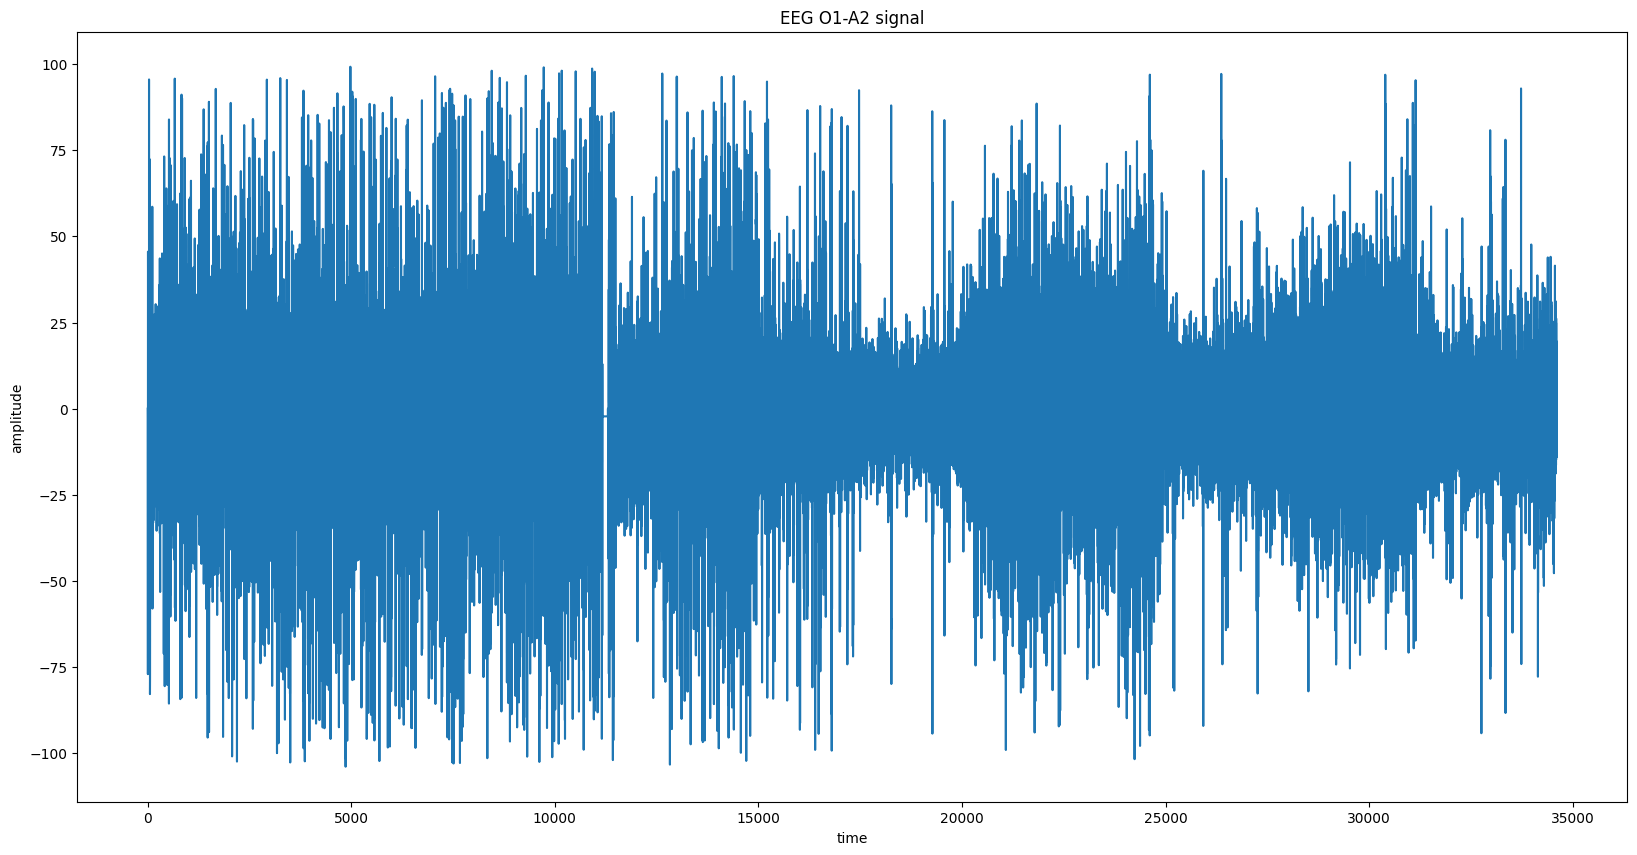

In [4]:
index = labels.index("EEG O1-A2")
signal = combined_signal(edf_files_1, index)
thresholded_signal = thresholding(signal, 2)
print(len(thresholded_signal)/200)
resampled_signal_1hz = resample_signal(thresholded_signal, int(len(thresholded_signal)/200))
plot_signal(labels[index], resampled_signal_1hz)

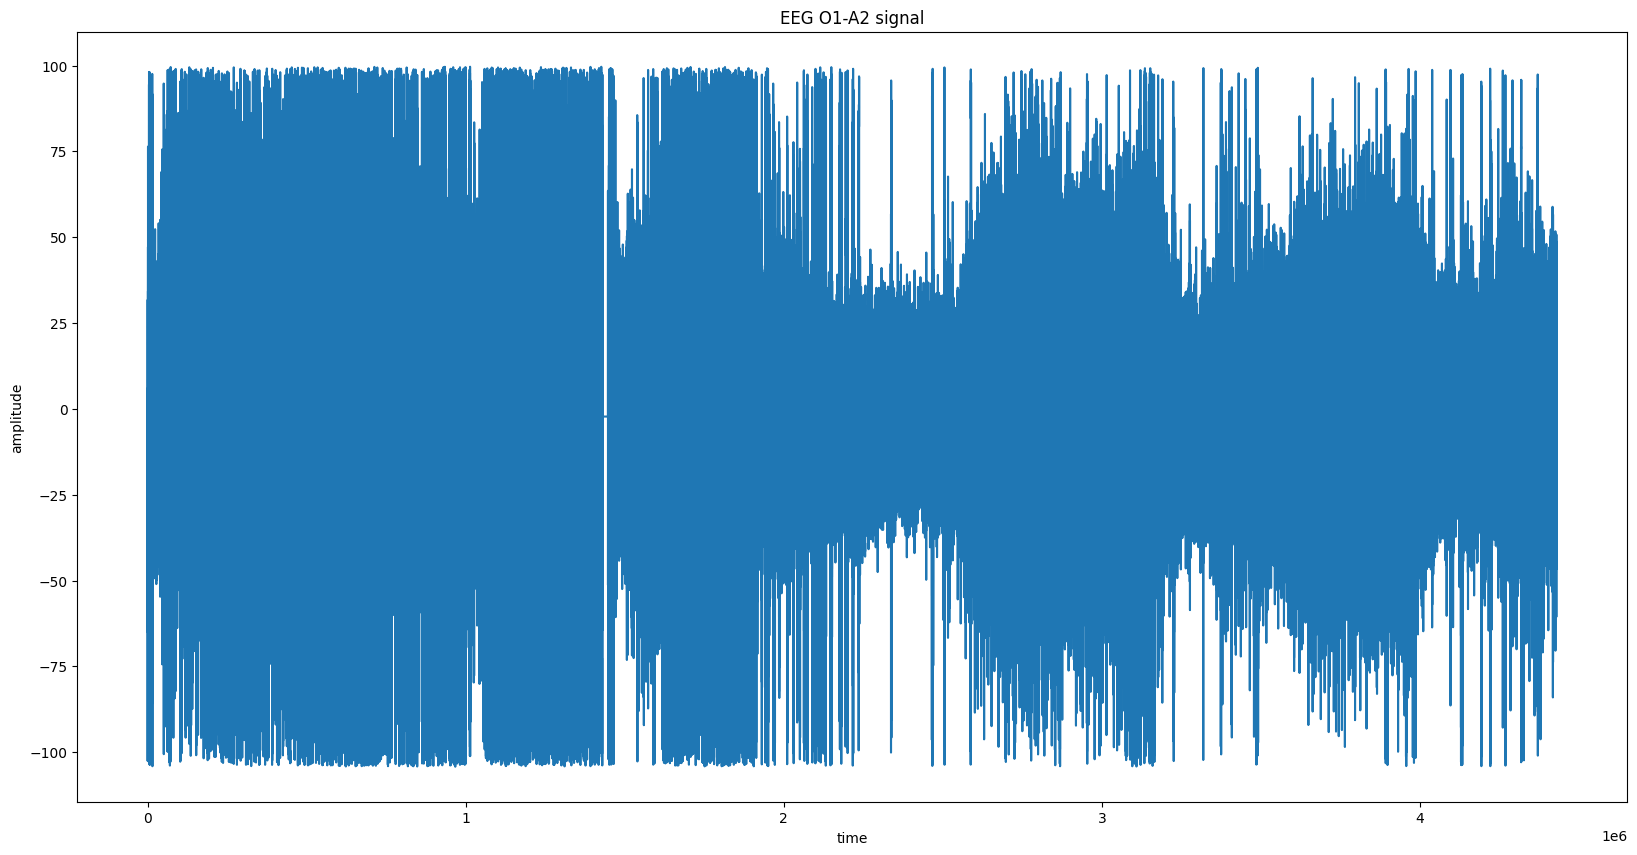

In [5]:
resample_signal_128hz = resample_signal(thresholded_signal, int(len(thresholded_signal)/200)*128)
plot_signal(labels[index], resample_signal_128hz)

## DFT

In [6]:
fft_result_1 = np.fft.fft(resampled_signal_1hz)
sampling_rate = 1
freq1 = np.fft.fftfreq(len(resampled_signal_1hz), 1/sampling_rate)

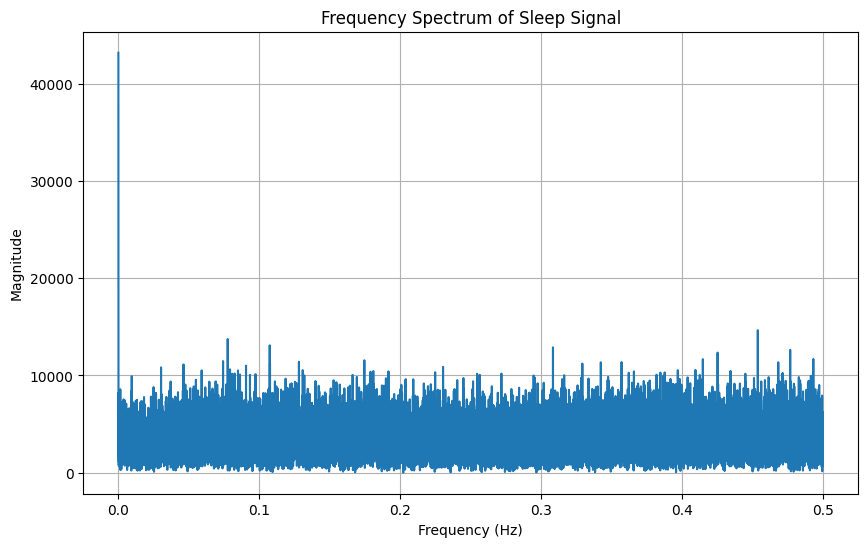

In [7]:
# Magnitude spectrum
magnitude_spectrum1 = np.abs(fft_result_1)

# Plot the positive frequencies only
plt.figure(figsize=(10, 6))
plt.plot(freq1[:len(freq1)//2], magnitude_spectrum1[:len(magnitude_spectrum1)//2])
plt.title("Frequency Spectrum of Sleep Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

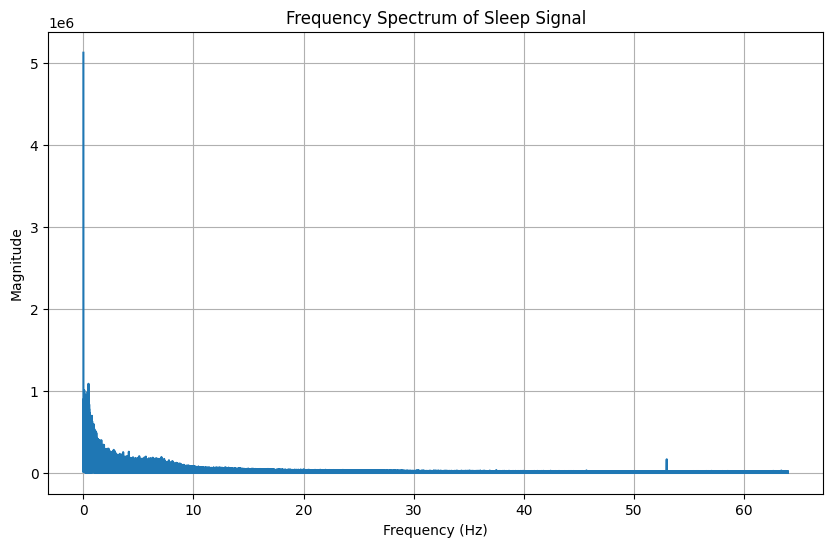

In [8]:
fft_result_2 = np.fft.fft(resample_signal_128hz)
sampling_rate = 128
freq2 = np.fft.fftfreq(len(resample_signal_128hz), 1/sampling_rate)

# Magnitude spectrum
magnitude_spectrum2 = np.abs(fft_result_2)

# Plot the positive frequencies only
plt.figure(figsize=(10, 6))
plt.plot(freq2[:len(freq2)//2], magnitude_spectrum2[:len(magnitude_spectrum2)//2])
plt.title("Frequency Spectrum of Sleep Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

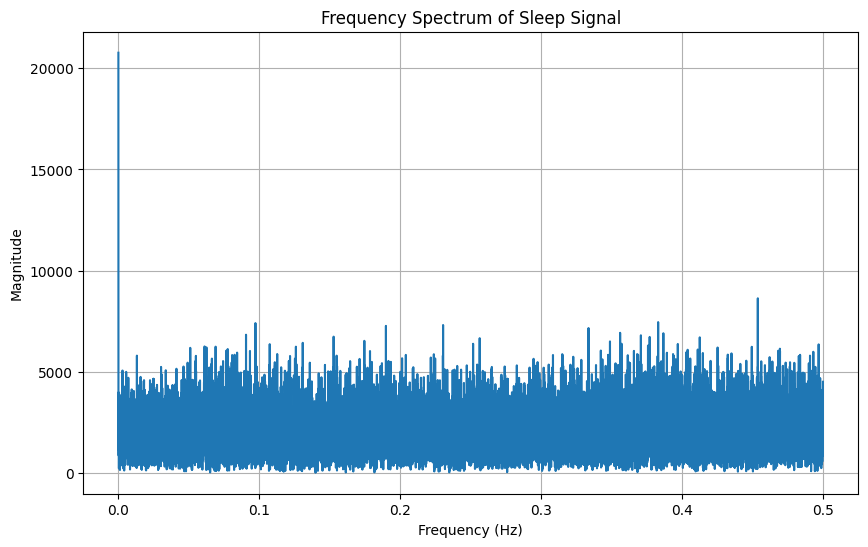

In [9]:
from scipy.signal import windows

window1 = windows.hann(len(resampled_signal_1hz))
windowed_signal1 = resampled_signal_1hz * window1
fft_result_windowed1 = np.fft.fft(windowed_signal1)

magnitude_spectrum_windowed1 = np.abs(fft_result_windowed1)
plt.figure(figsize=(10, 6))
plt.plot(freq1[:len(freq1)//2], magnitude_spectrum_windowed1[:len(magnitude_spectrum_windowed1)//2])
plt.title("Frequency Spectrum of Sleep Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

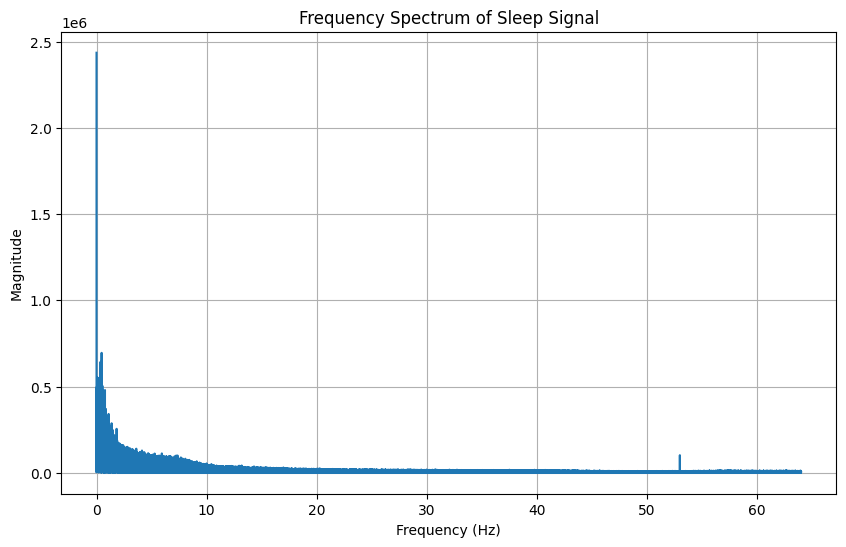

In [10]:
window2 = windows.hann(len(resample_signal_128hz))
windowed_signal2 = resample_signal_128hz * window2
fft_result_windowed2 = np.fft.fft(windowed_signal2)

magnitude_spectrum_windowed2 = np.abs(fft_result_windowed2)
plt.figure(figsize=(10, 6))
plt.plot(freq2[:len(freq2)//2], magnitude_spectrum_windowed2[:len(magnitude_spectrum_windowed2)//2])
plt.title("Frequency Spectrum of Sleep Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


In [11]:
print(freq2)
print(len(freq2))

[ 0.00000000e+00  2.88925486e-05  5.77850972e-05 ... -8.66776458e-05
 -5.77850972e-05 -2.88925486e-05]
4430208


## DCT

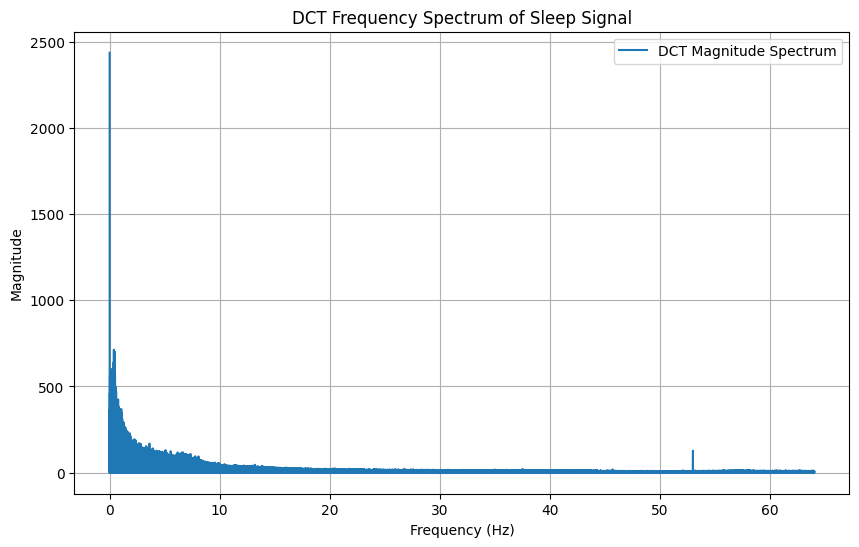

In [12]:
from scipy.fftpack import dct
import matplotlib.pyplot as plt
import numpy as np

# Assume resample_signal_128hz and sampling_rate are already defined
sampling_rate = 128  # Sampling rate in Hz

# Apply the DCT (Type-II is commonly used)
dct_result1 = dct(resample_signal_128hz, type=2, norm='ortho')

# Frequency bins for DCT
freq_dct = np.linspace(0, sampling_rate / 2, len(dct_result1))

# Magnitude spectrum
magnitude_spectrum_dct = np.abs(dct_result1)

# Plot the DCT spectrum
plt.figure(figsize=(10, 6))
plt.plot(freq_dct, magnitude_spectrum_dct, label="DCT Magnitude Spectrum")
plt.title("DCT Frequency Spectrum of Sleep Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()
plt.show()

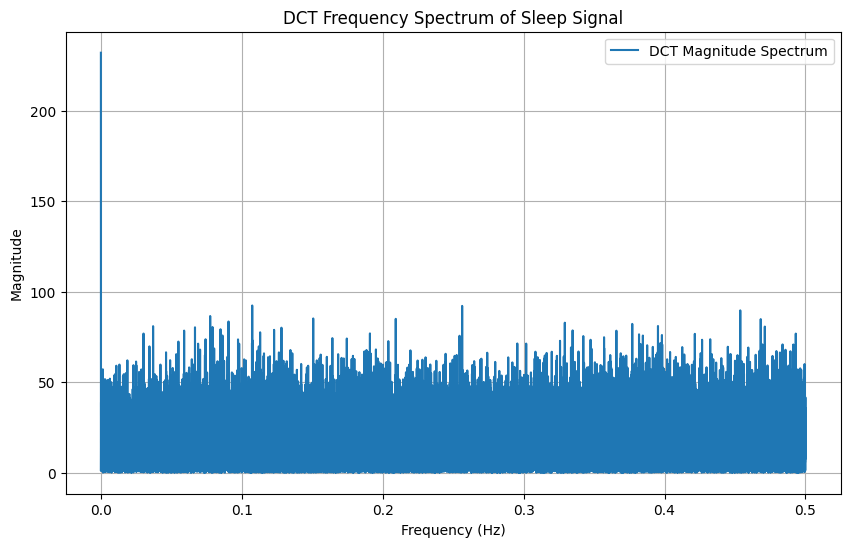

In [13]:
from scipy.fftpack import dct
import matplotlib.pyplot as plt
import numpy as np

# Assume resample_signal_128hz and sampling_rate are already defined
sampling_rate = 1  # Sampling rate in Hz

# Apply the DCT (Type-II is commonly used)
dct_result2 = dct(resampled_signal_1hz, type=2, norm='ortho')

# Frequency bins for DCT
freq_dct = np.linspace(0, sampling_rate / 2, len(dct_result2))

# Magnitude spectrum
magnitude_spectrum_dct = np.abs(dct_result2)

# Plot the DCT spectrum
plt.figure(figsize=(10, 6))
plt.plot(freq_dct, magnitude_spectrum_dct, label="DCT Magnitude Spectrum")
plt.title("DCT Frequency Spectrum of Sleep Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()
plt.show()

c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


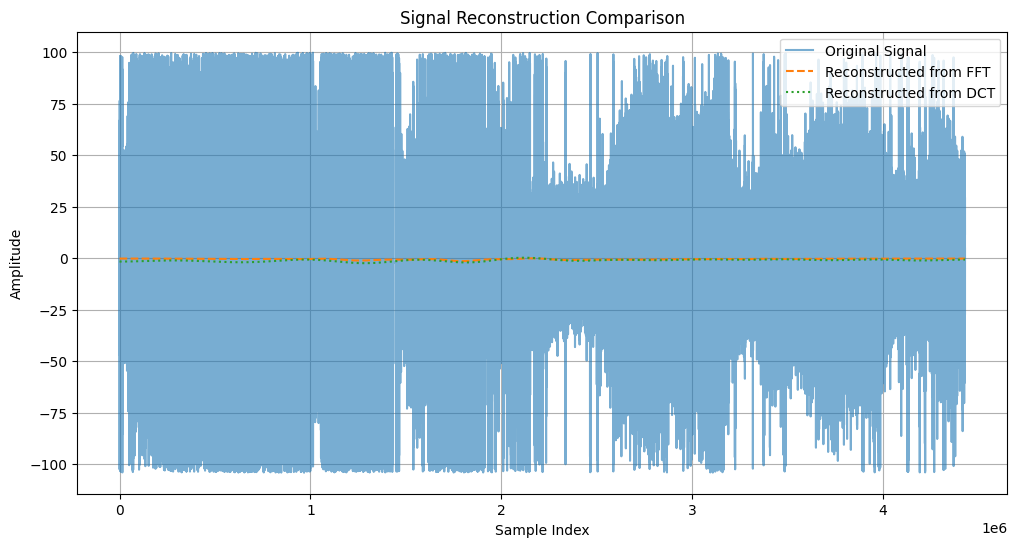

In [14]:
# Keep only low frequencies (e.g., first 20 components)
fft_filtered_128 = np.copy(fft_result_windowed2)
fft_filtered_128[20:] = 0

fft_filtered_1 = np.copy(fft_result_windowed1)
fft_filtered_1[20:] = 0

dct_filtered = np.copy(dct_result1)
dct_filtered[20:] = 0

# Reconstruct the signal
reconstructed_fft_128 = np.fft.ifft(fft_filtered_128).real
reconstructed_fft_1 = np.fft.ifft(fft_filtered_1).real
reconstructed_dct = dct(dct_filtered, type=3, norm='ortho')

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(resample_signal_128hz, label="Original Signal", alpha=0.6)
plt.plot(reconstructed_fft_128, label="Reconstructed from FFT", linestyle='dashed')
plt.plot(reconstructed_dct, label="Reconstructed from DCT", linestyle='dotted')
plt.title("Signal Reconstruction Comparison")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

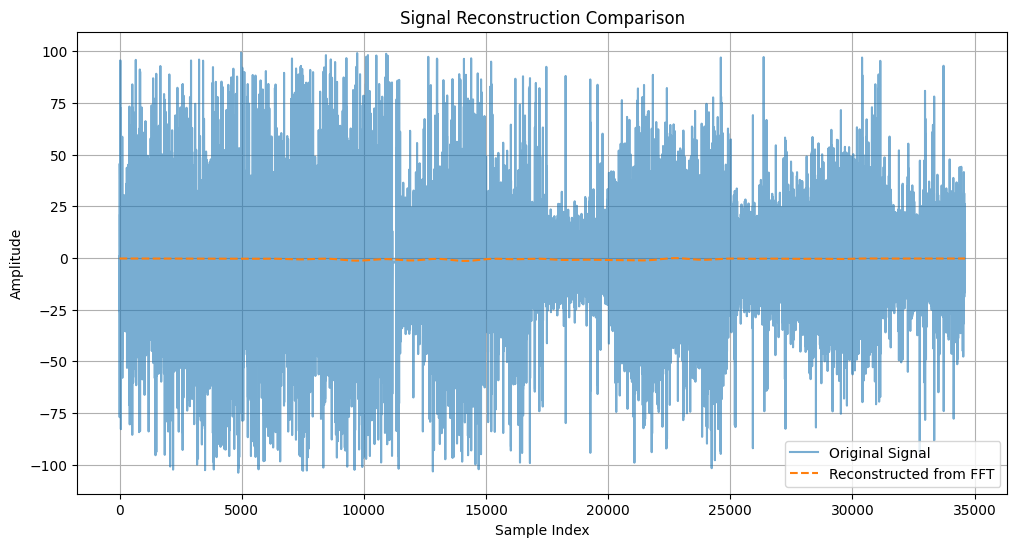

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(resampled_signal_1hz, label="Original Signal", alpha=0.6)
plt.plot(reconstructed_fft_1, label="Reconstructed from FFT", linestyle='dashed')
# plt.plot(reconstructed_dct, label="Reconstructed from DCT", linestyle='dotted')
plt.title("Signal Reconstruction Comparison")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

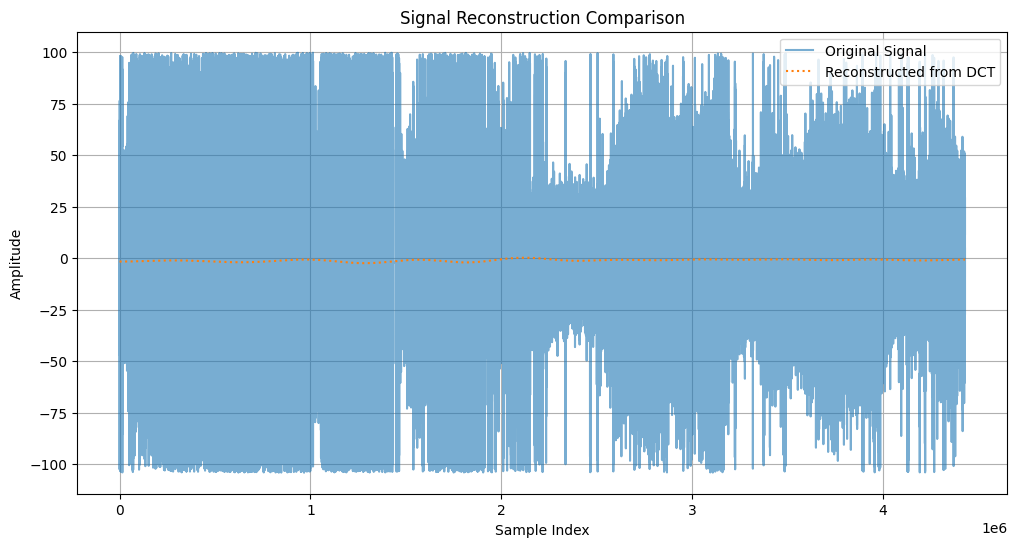

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(resample_signal_128hz, label="Original Signal", alpha=0.6)
# plt.plot(reconstructed_fft, label="Reconstructed from FFT", linestyle='dashed')
plt.plot(reconstructed_dct, label="Reconstructed from DCT", linestyle='dotted')
plt.title("Signal Reconstruction Comparison")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

## compare means 

In [17]:
dft = reconstructed_fft_128
dct_signal = reconstructed_dct
plain_signal = resample_signal_128hz

mw1f = np.mean(dft[0:360*128])
mw1c = np.mean(dct_signal[0:360*128])
mw1o = np.mean(plain_signal[0:360*128])
sdw1f = np.std(dft[0:360*128])
sdw1c = np.std(dct_signal[0:360*128])
sdw1o = np.std(plain_signal[0:360*128])

mn1f = np.mean(dft[360*128:600*128])
mn1c = np.mean(dct_signal[360*128:600*128])
mn1o = np.mean(plain_signal[360*128:600*128])
sdn1f = np.std(dft[360*128:600*128])
sdn1c = np.std(dct_signal[360*128:600*128])
sdn1o = np.std(plain_signal[360*128:600*128])

mw2f = np.mean(dft[600*128:750*128])
mw2c = np.mean(dct_signal[600*128:750*128])
mw2o = np.mean(plain_signal[600*128:750*128])
sdw2f = np.std(dft[600*128:750*128])
sdw2c = np.std(dct_signal[600*128:750*128])
sdw2o = np.std(plain_signal[600*128:750*128])

mn2f = np.mean(dft[750*128:1200*128])
mn2c = np.mean(dct_signal[750*128:1200*128])
mn2o = np.mean(plain_signal[750*128:1200*128])
sdn2f = np.std(dft[750*128:1200*128])
sdn2c = np.std(dct_signal[750*128:1200*128])
sdn2o = np.std(plain_signal[750*128:1200*128])

print(mw1f, mw1c, mw1o)
print(sdw1f, sdw1c, sdw1o)
print(mn1f, mn1c, mn1o)
print(sdn1f, sdn1c, sdn1o)
print(mw2f, mw2c, mw2o)
print(sdw2f, sdw2c, sdw2o)
print(mn2f, mn2c, mn2o)
print(sdn2f, sdn2c, sdn2o)

-0.2729338115852145 -1.7123787026400603 -1.5230562833928356
0.0031700320045070372 0.010222208195006533 19.6988149341197
-0.2672841562151226 -1.6630932609557205 -1.9845660204833526
0.0003128269172325675 0.016575371448256253 26.043254165293863
-0.26952264937815185 -1.6097063330340116 -0.9947519550146321
0.001133212463542178 0.013492371558839034 23.57189532631458
-0.2815337349676338 -1.5042210718641937 -2.1043384012473
0.005905529792387791 0.04848251689665315 25.255109128752135


In [18]:
m1 = np.mean(dft[1200*128:2580*128])
m2 = np.mean(plain_signal[1200*128:2580*128])

m3 = np.mean(dft[4050*128:4260*128])
m4 = np.mean(plain_signal[4050*128:4260*128])

print(m1, m2)
print(m3, m4)

-0.2898587569944288 -1.0647415072042796
-0.37848486932721204 -1.7287080650611653


# WEEK 14

In [19]:
import xml.etree.ElementTree as ET

 
def make_time_flags(root, times, prev_stage):
    for stage in root.findall('.//User/Stage'):
        stage_type = stage.get('Type')  # Get the 'Type' attribute
        start_time = stage.get('Start')  # Get the 'Start' attribute
        times[start_time] = [prev_stage, stage_type]
        prev_stage = stage_type
    return times

file_path_mild = 'C:\\Users\\anany\\Desktop\\OSA\\user_mild_336.rml'
    # Parse the XML file
tree_mild = ET.parse(file_path_mild)
root_mild = tree_mild.getroot()

file_path_severe = 'C:\\Users\\anany\\Desktop\\OSA\\user_severe_349.rml'
tree_severe = ET.parse(file_path_severe)
root_severe = tree_severe.getroot()

times_mild = {}
times_severe = {}
prev_stage = 'Wake'

times_mild = make_time_flags(root_mild, times_mild, prev_stage)
times_severe = make_time_flags(root_severe, times_severe, prev_stage)

print(times_mild)
print(times_severe)

{'0': ['Wake', 'Wake'], '1980': ['Wake', 'NonREM1'], '2610': ['NonREM1', 'Wake'], '2730': ['Wake', 'NonREM1'], '2790': ['NonREM1', 'Wake'], '2850': ['Wake', 'NonREM1'], '3060': ['NonREM1', 'NonREM2'], '3840': ['NonREM2', 'NonREM3'], '4890': ['NonREM3', 'Wake'], '5070': ['Wake', 'NonREM1'], '5220': ['NonREM1', 'Wake'], '5640': ['Wake', 'NonREM1'], '5880': ['NonREM1', 'Wake'], '6360': ['Wake', 'NonREM1'], '6540': ['NonREM1', 'NonREM2'], '8100': ['NonREM2', 'NonREM3'], '8250': ['NonREM3', 'Wake'], '8310': ['Wake', 'NonREM2'], '8580': ['NonREM2', 'NonREM3'], '8790': ['NonREM3', 'NonREM2'], '8970': ['NonREM2', 'NonREM3'], '9240': ['NonREM3', 'NonREM2'], '9480': ['NonREM2', 'NonREM3'], '10110': ['NonREM3', 'Wake'], '10200': ['Wake', 'NonREM2'], '10380': ['NonREM2', 'Wake'], '10590': ['Wake', 'NonREM2'], '10830': ['NonREM2', 'NonREM3'], '11580': ['NonREM3', 'Wake'], '11640': ['Wake', 'NonREM1'], '11760': ['NonREM1', 'NonREM3'], '12090': ['NonREM3', 'Wake'], '12210': ['Wake', 'NonREM2'], '1245

In [20]:
def plot_reconstructed_signal_1hz(signal, time, start_state, end_state):
    filtered_signal = signal[time-800:time+800]
    plt.figure(figsize=(20, 10))
    plt.plot(filtered_signal, color='red')
    plt.axvline(x=800, color='black', linestyle='--')
    plt.title(f"Transition from {start_state} to {end_state} for 1Hz signal")
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.show()

def plot_reconstructed_signal_128hz(signal, time, start_state, end_state):
    filtered_signal = signal[time*128-800*128:time*128+800*128]
    plt.figure(figsize=(20, 10))
    plt.plot(filtered_signal, color = 'blue')
    plt.axvline(x=800*128, color='black', linestyle='--')
    plt.title(f"Transition from {start_state} to {end_state} for 128Hz signal")
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.show()

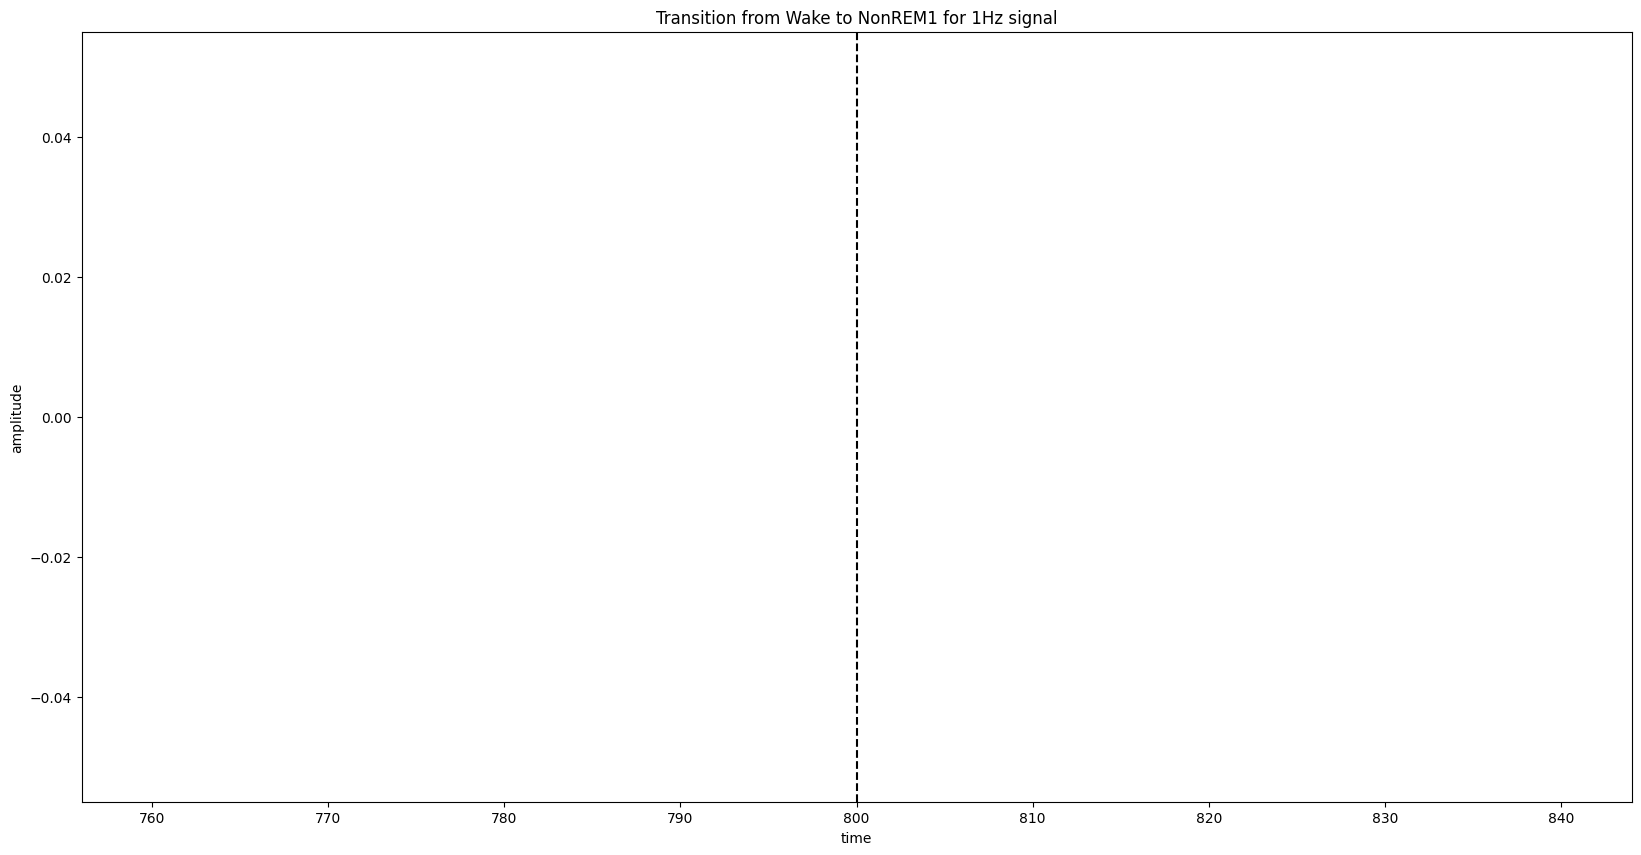

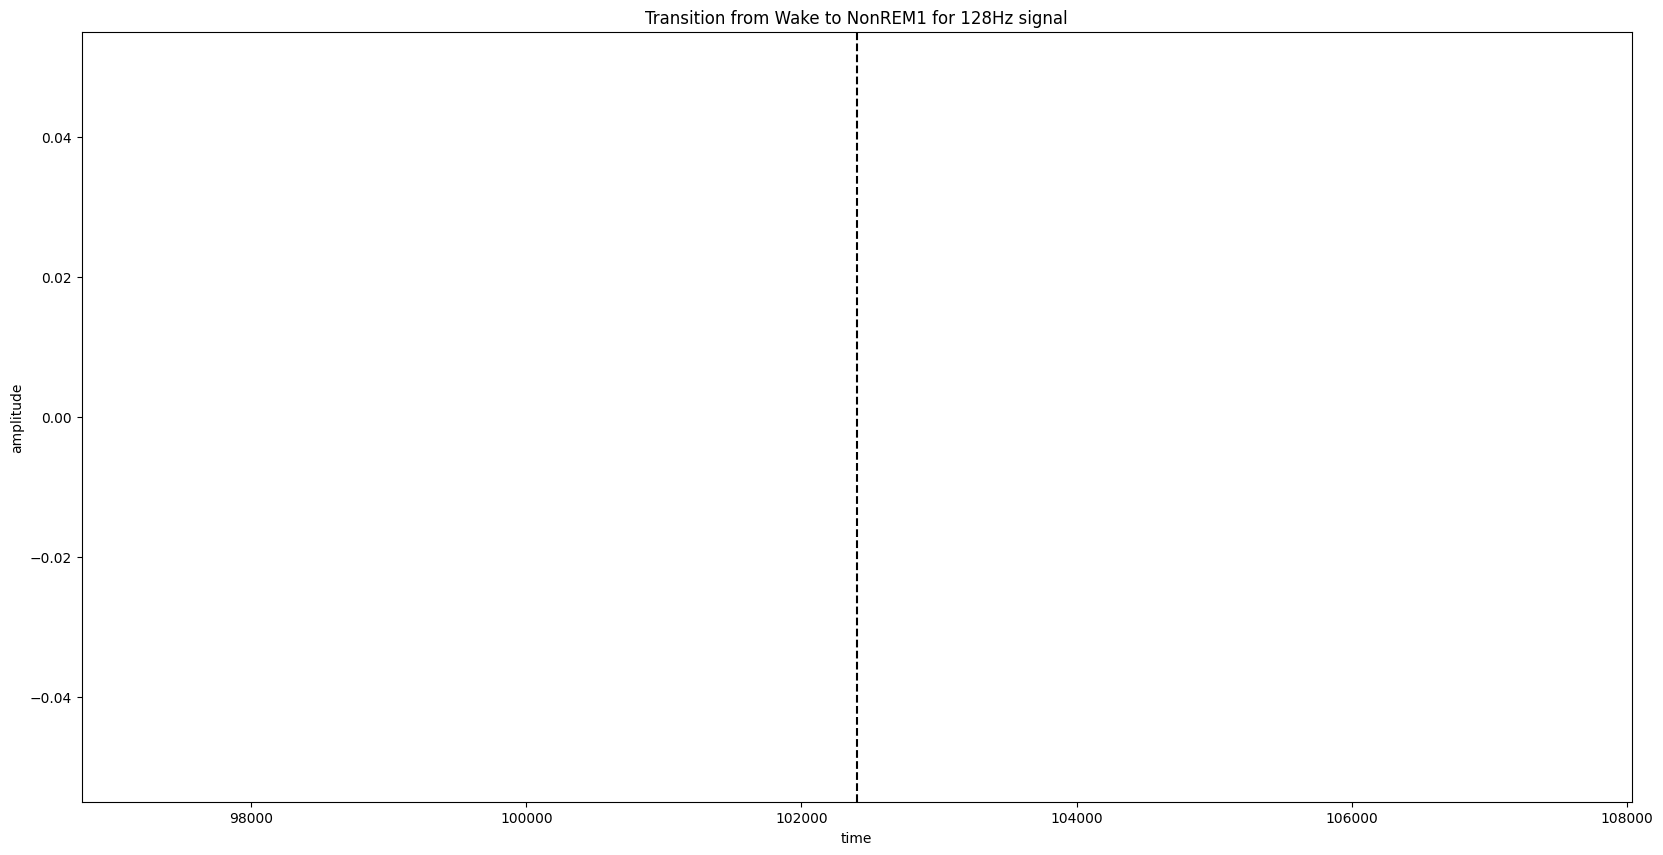

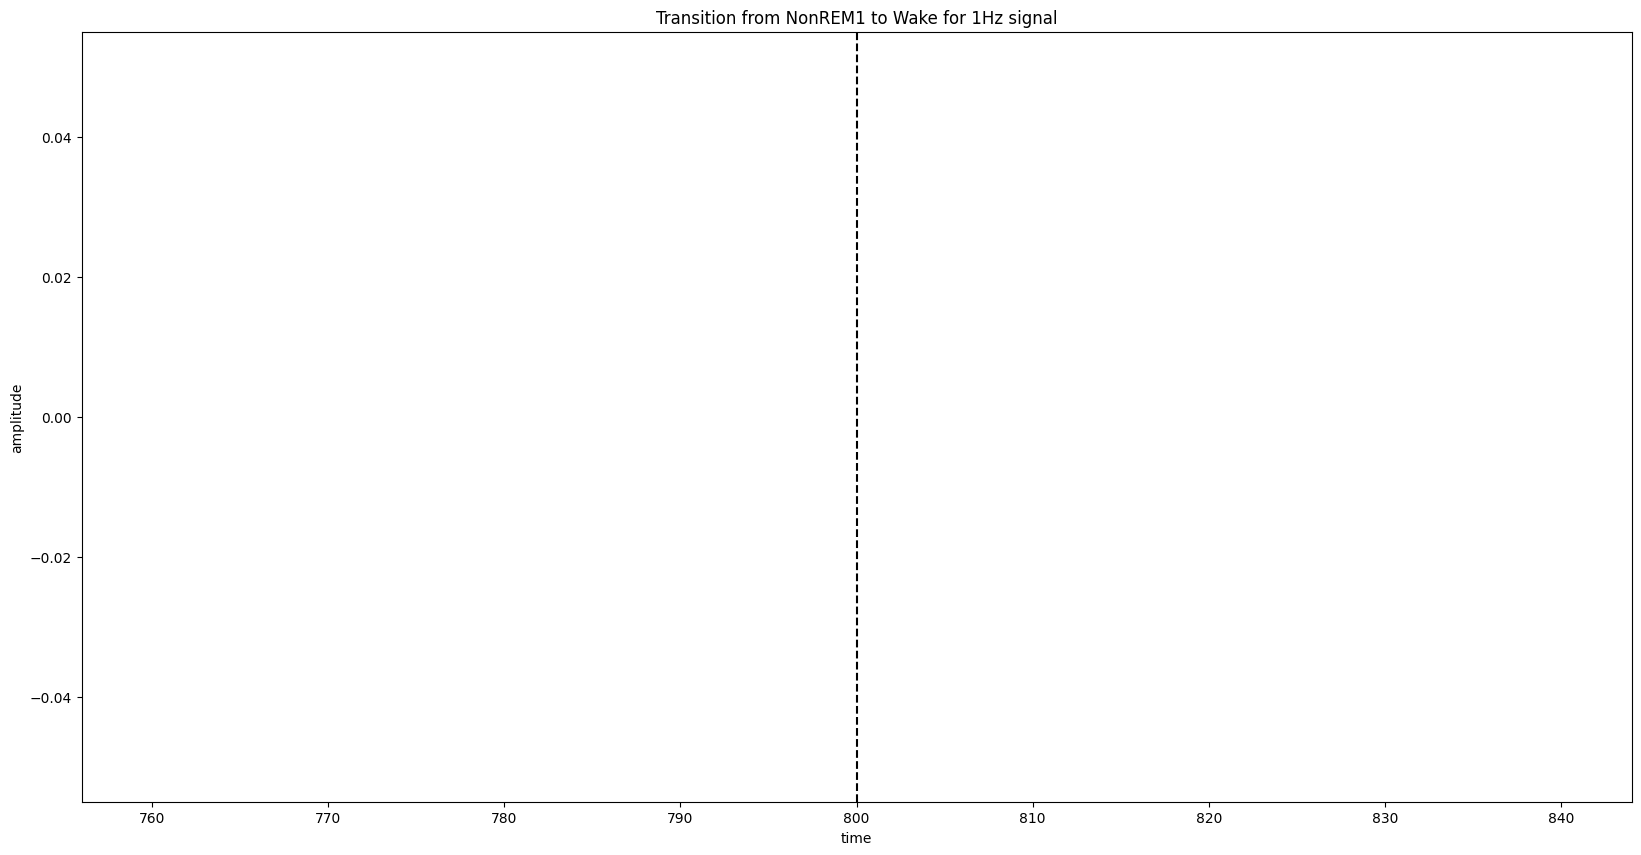

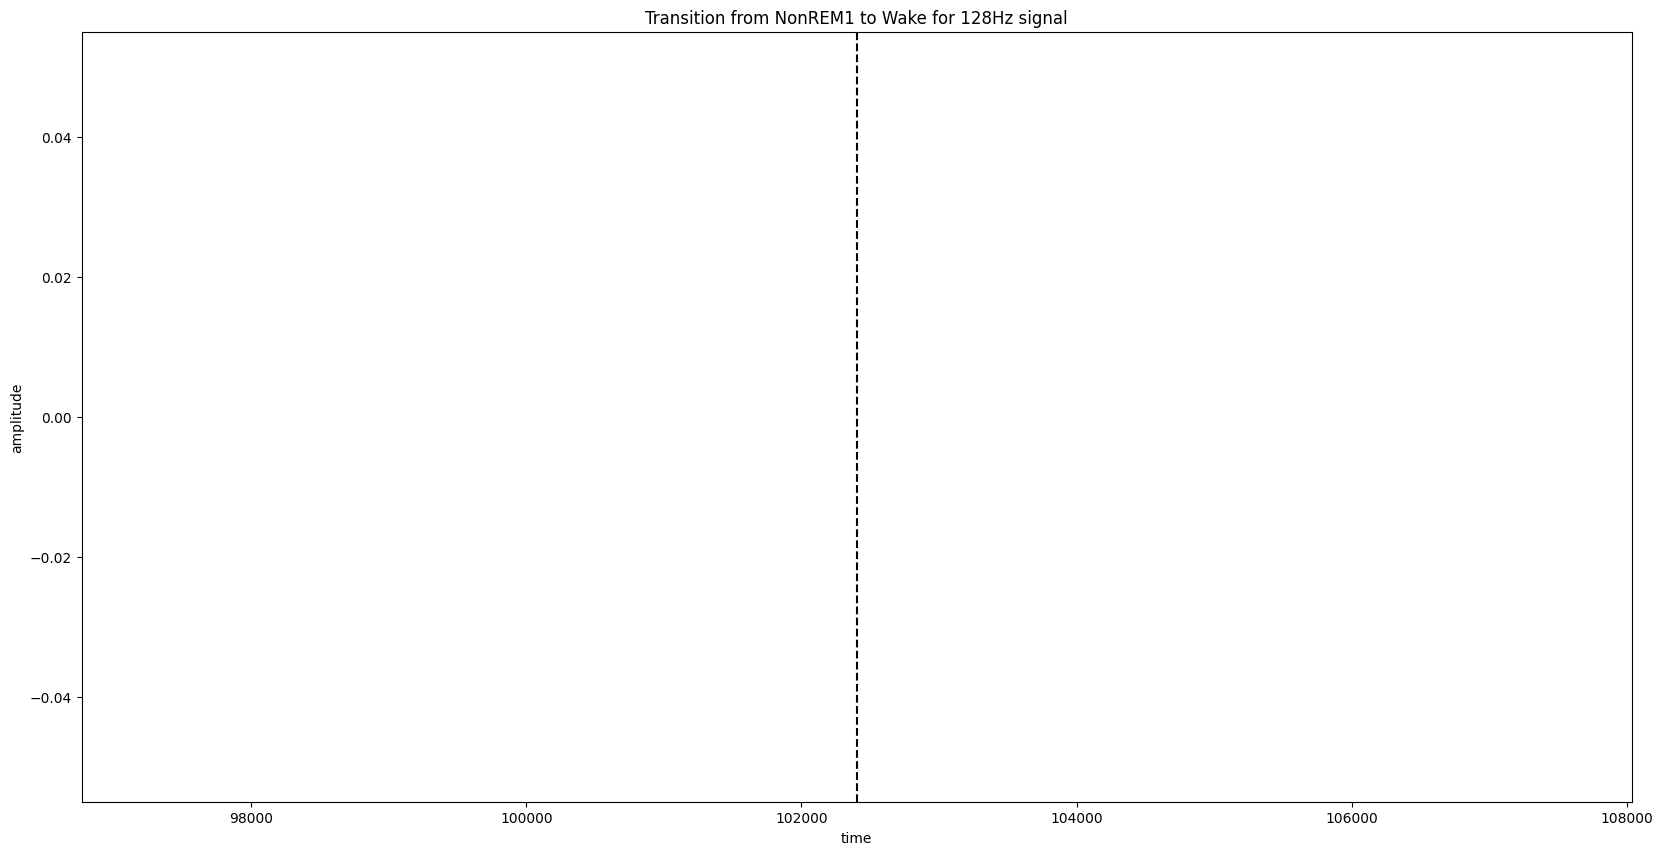

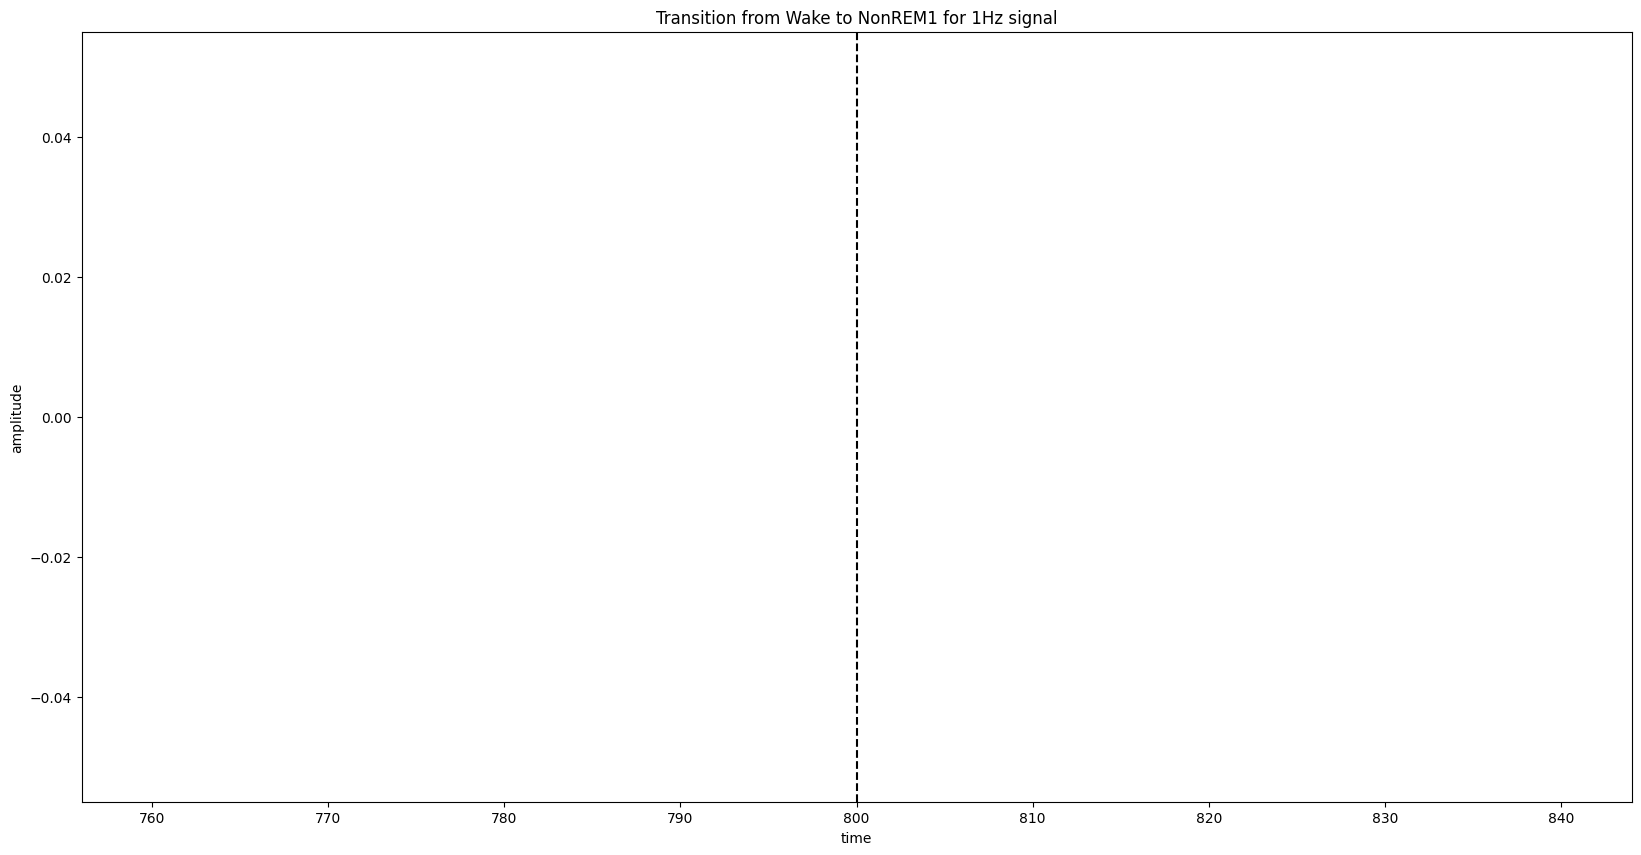

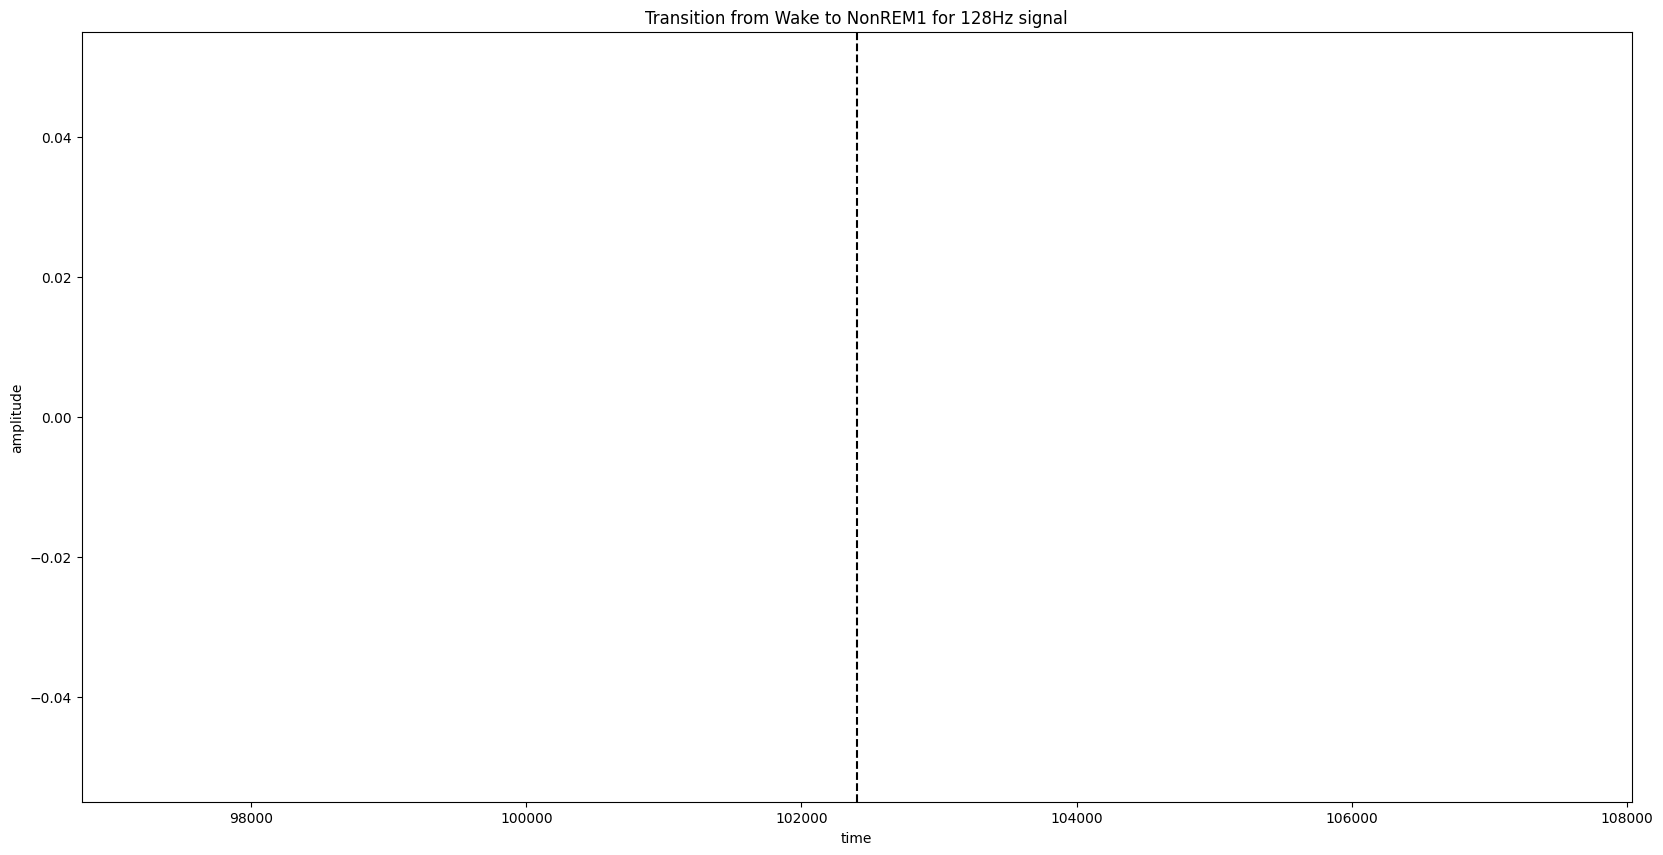

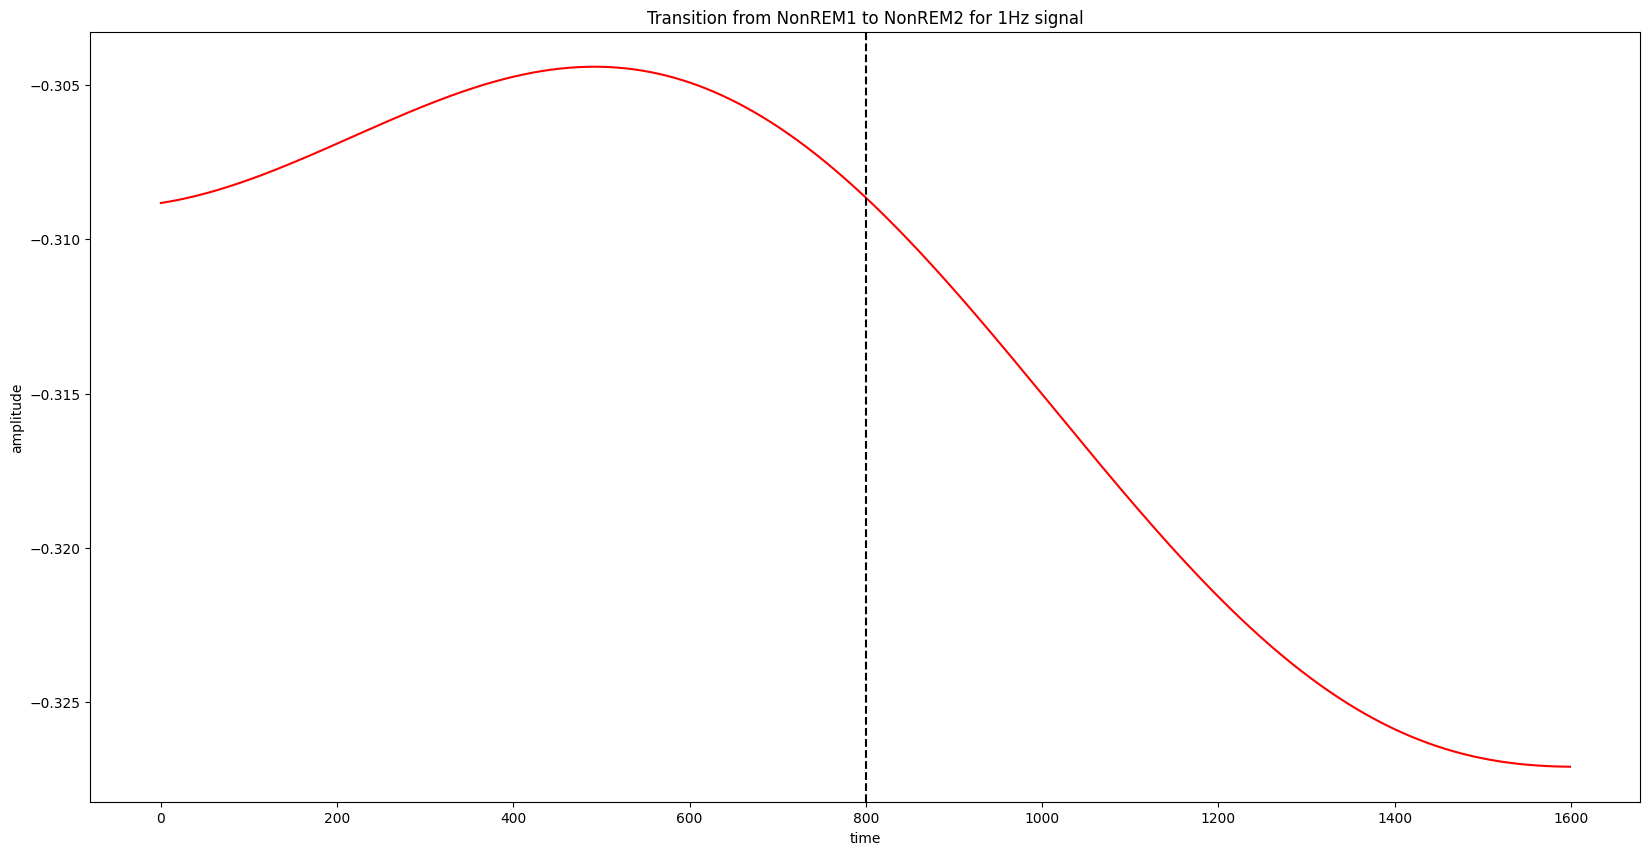

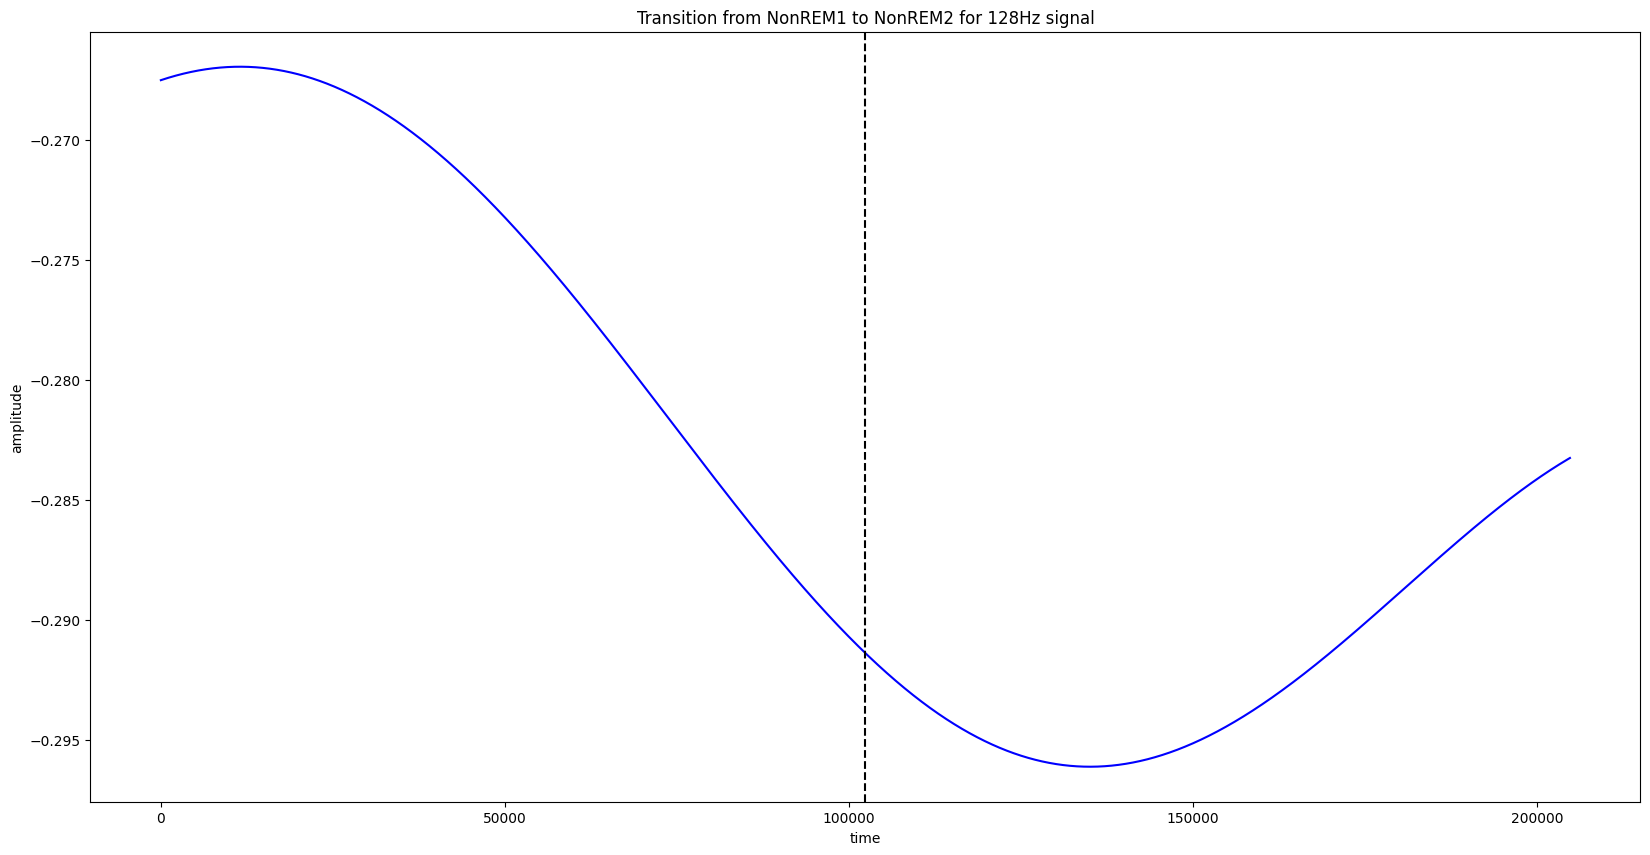

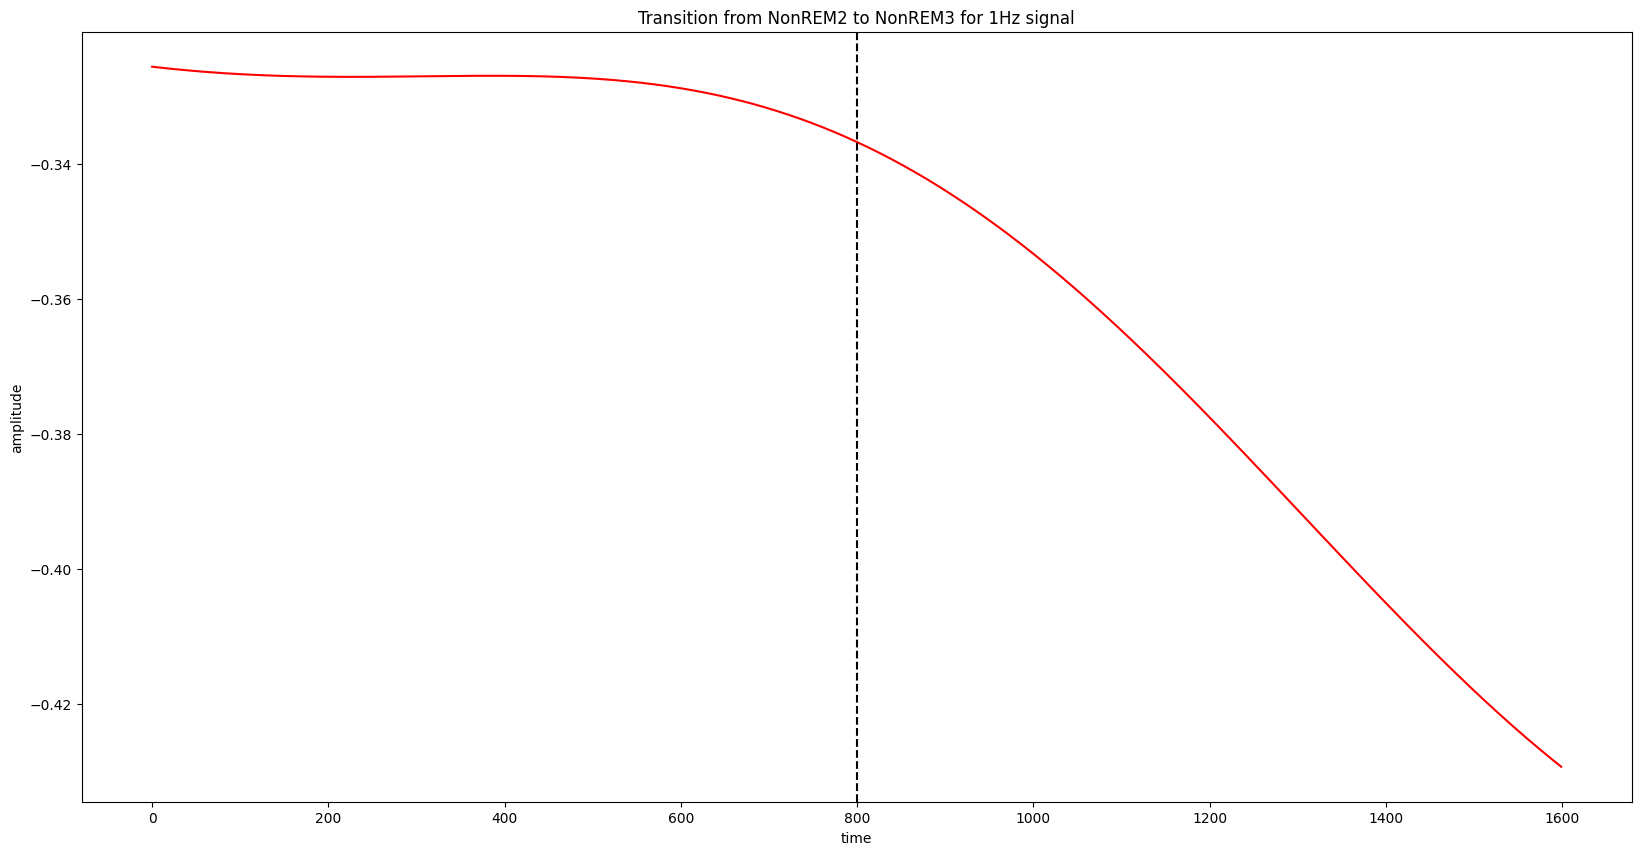

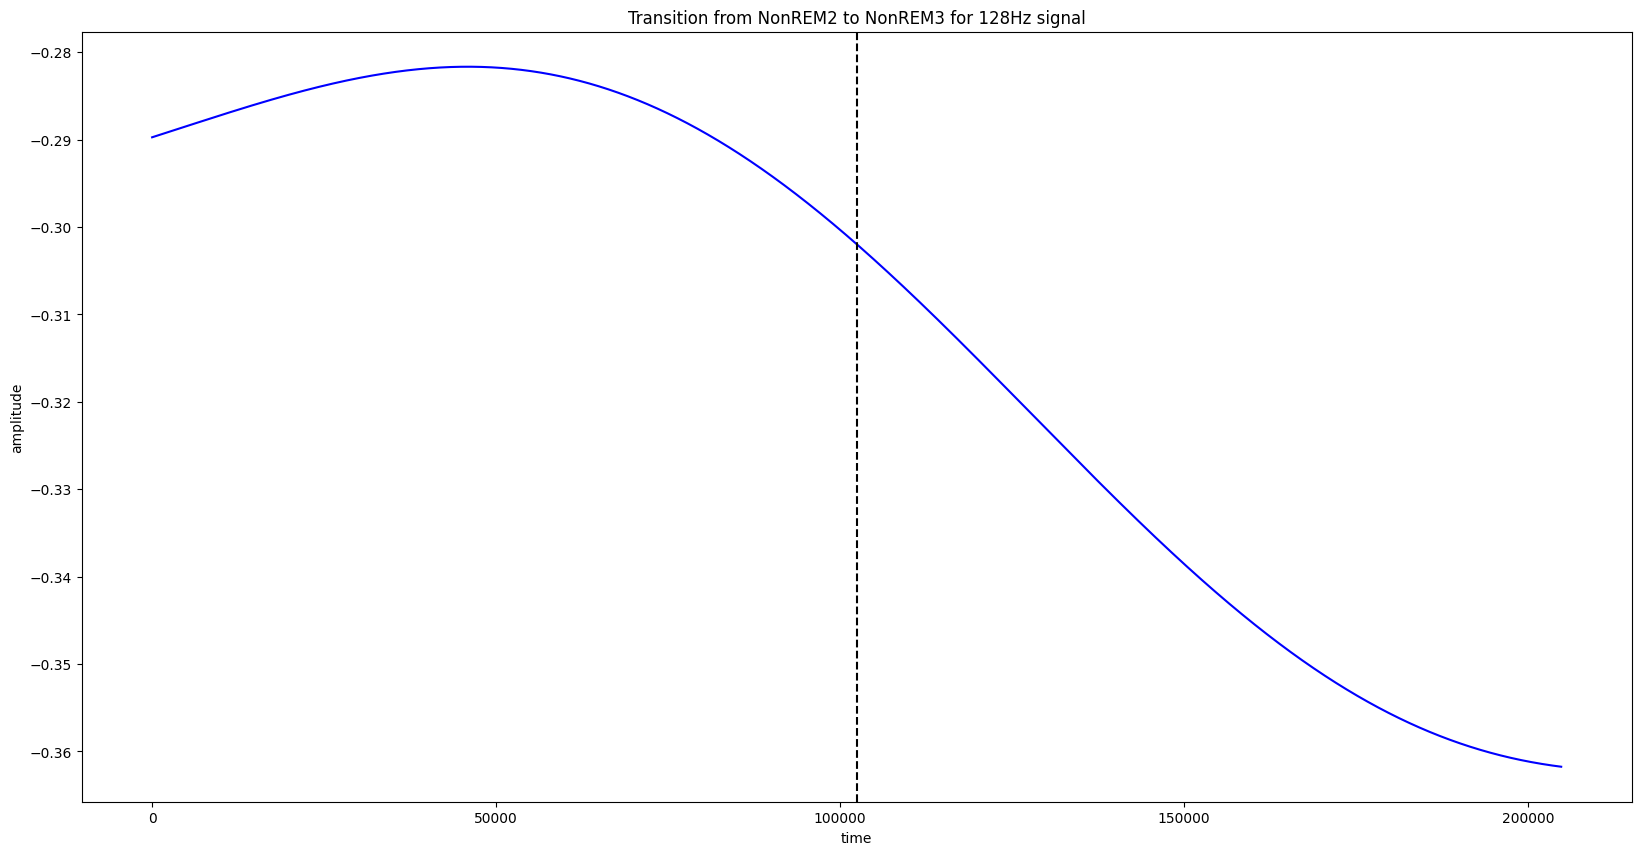

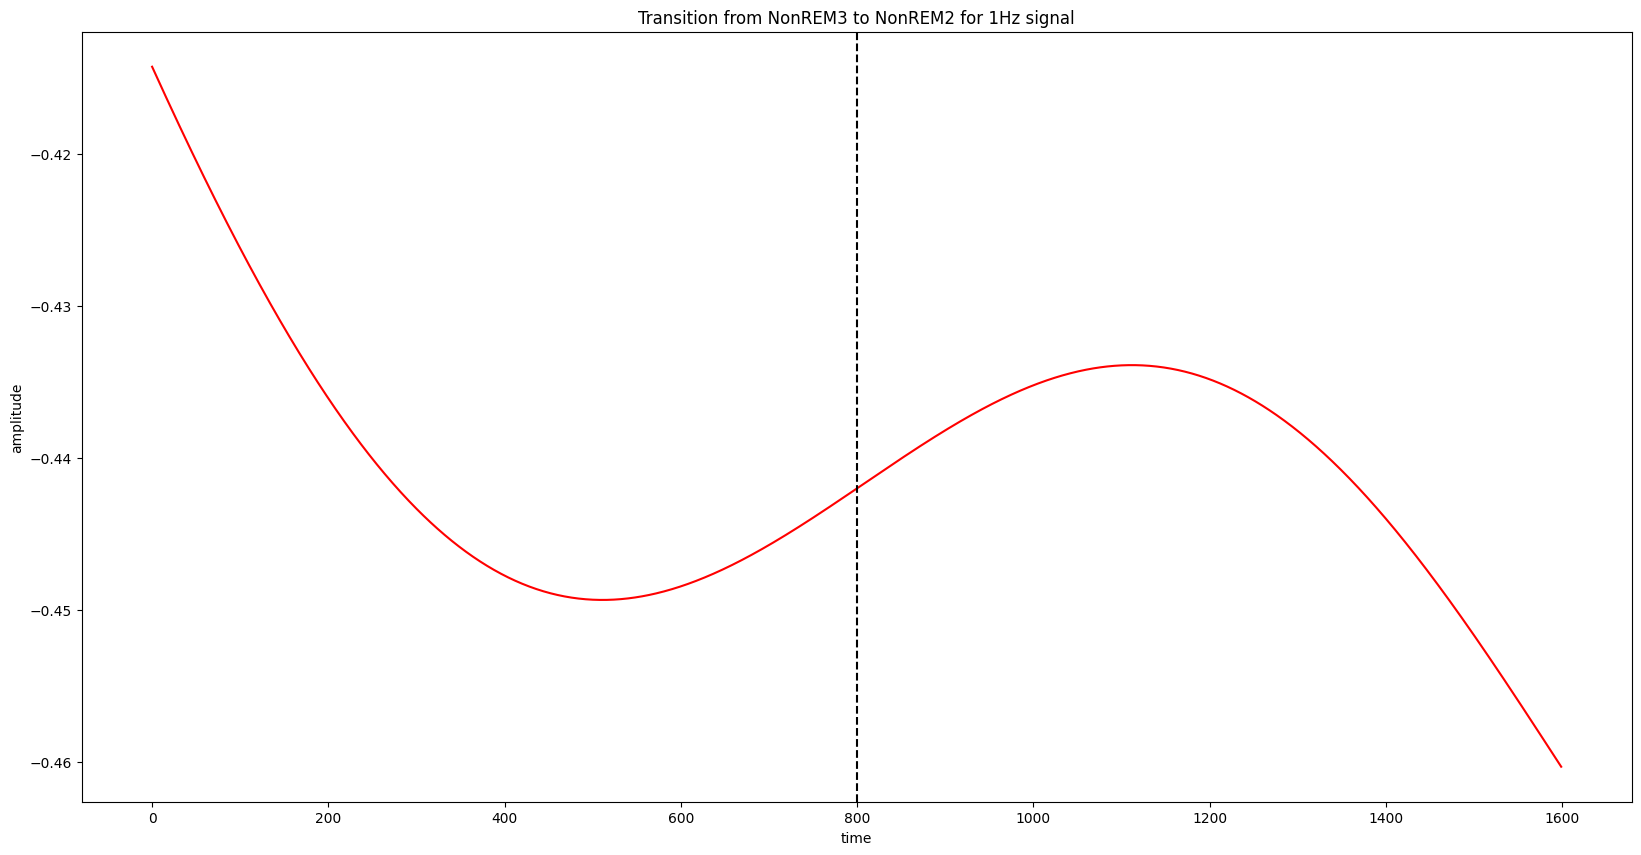

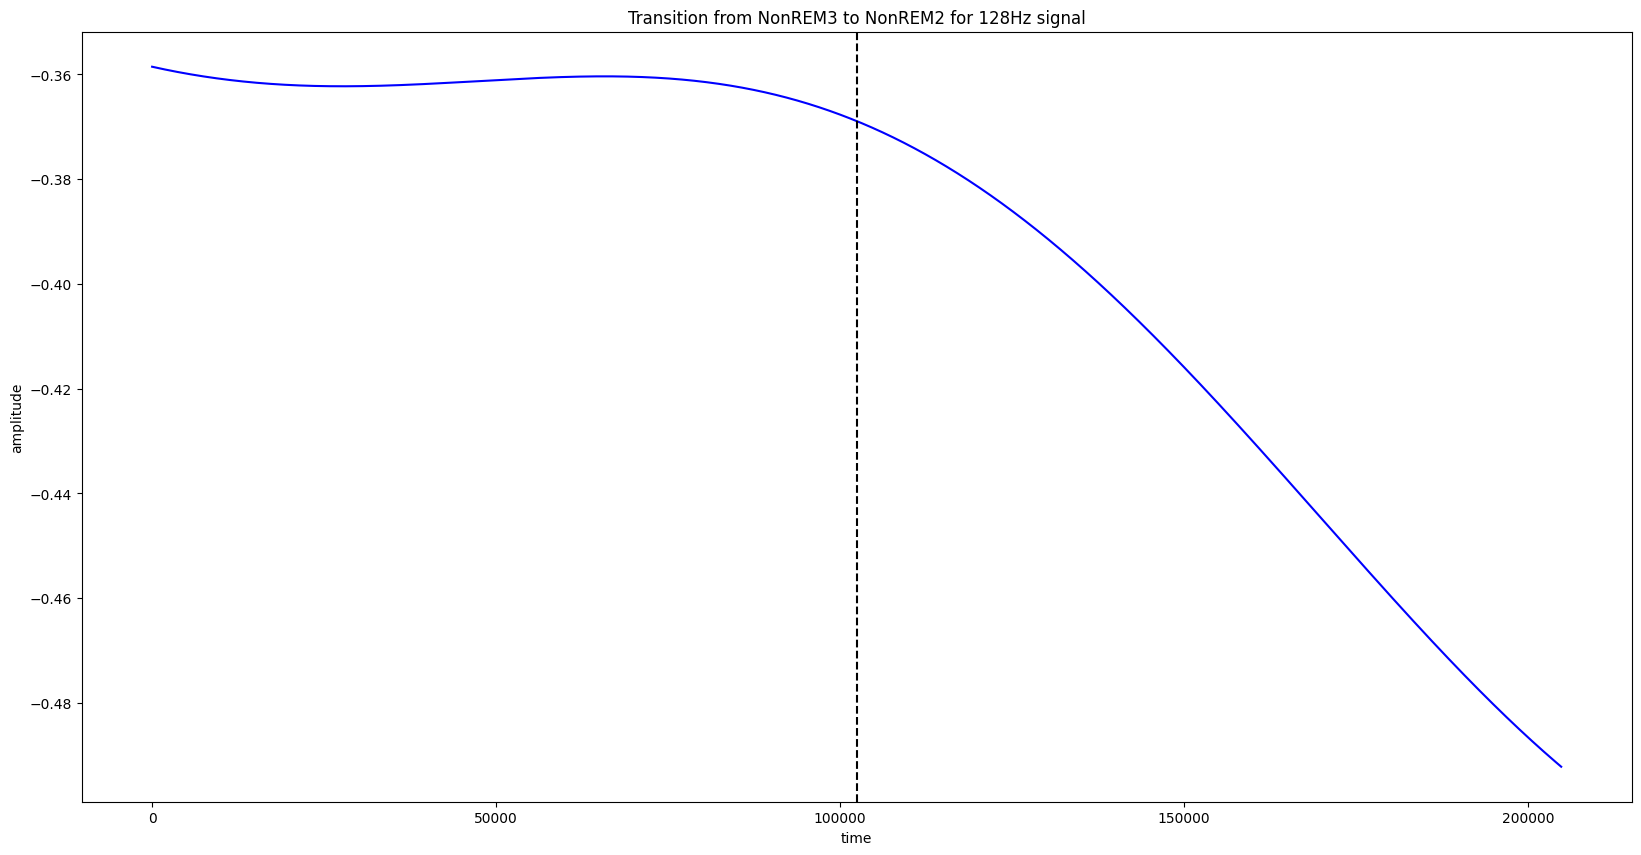

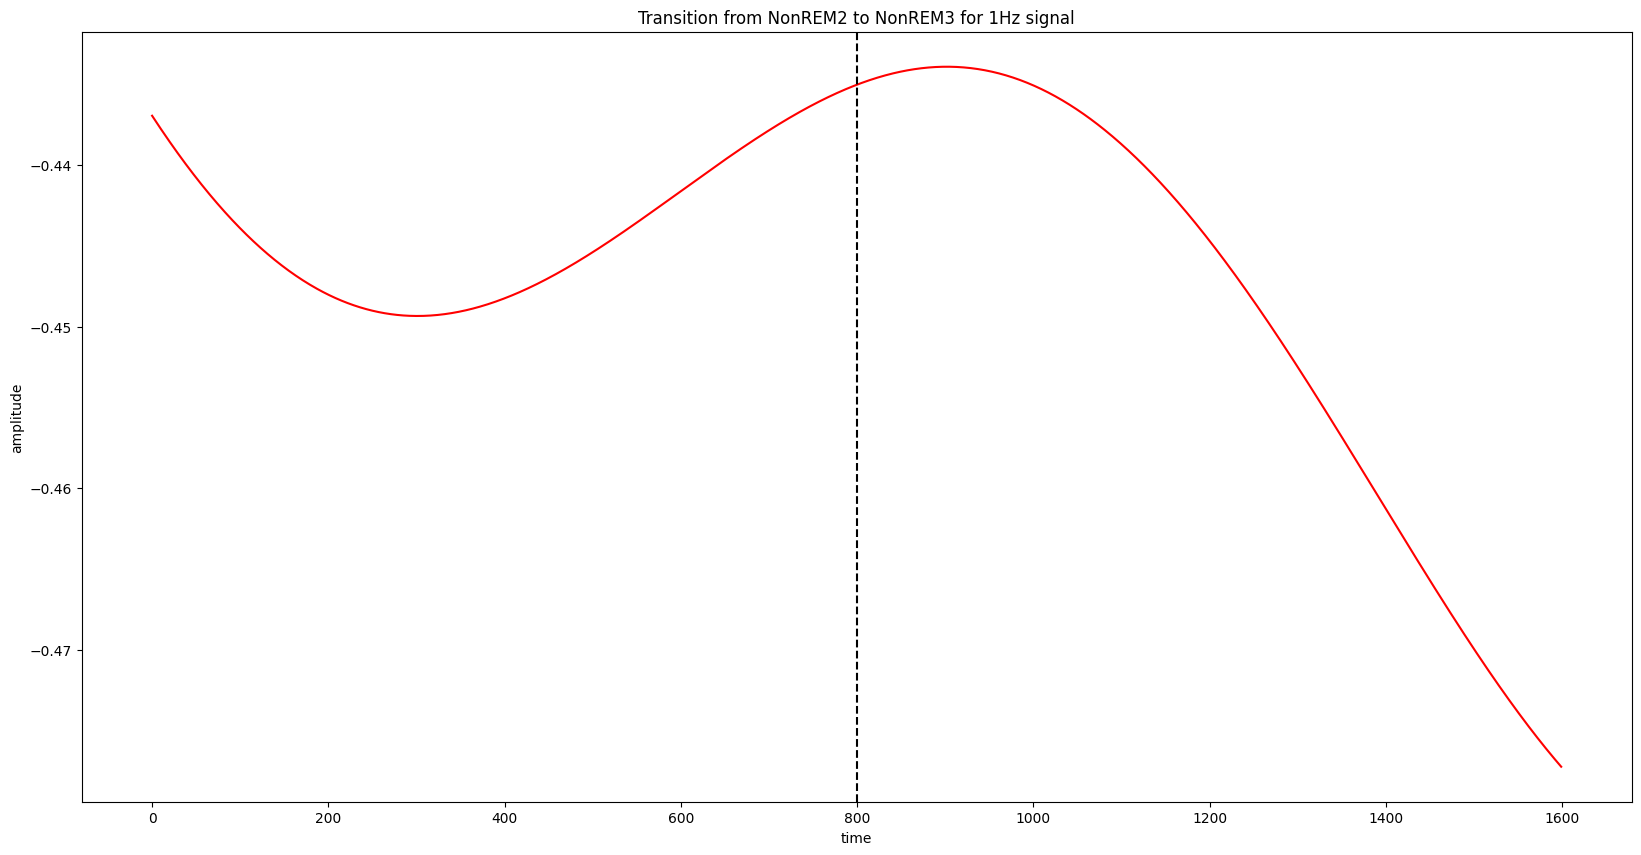

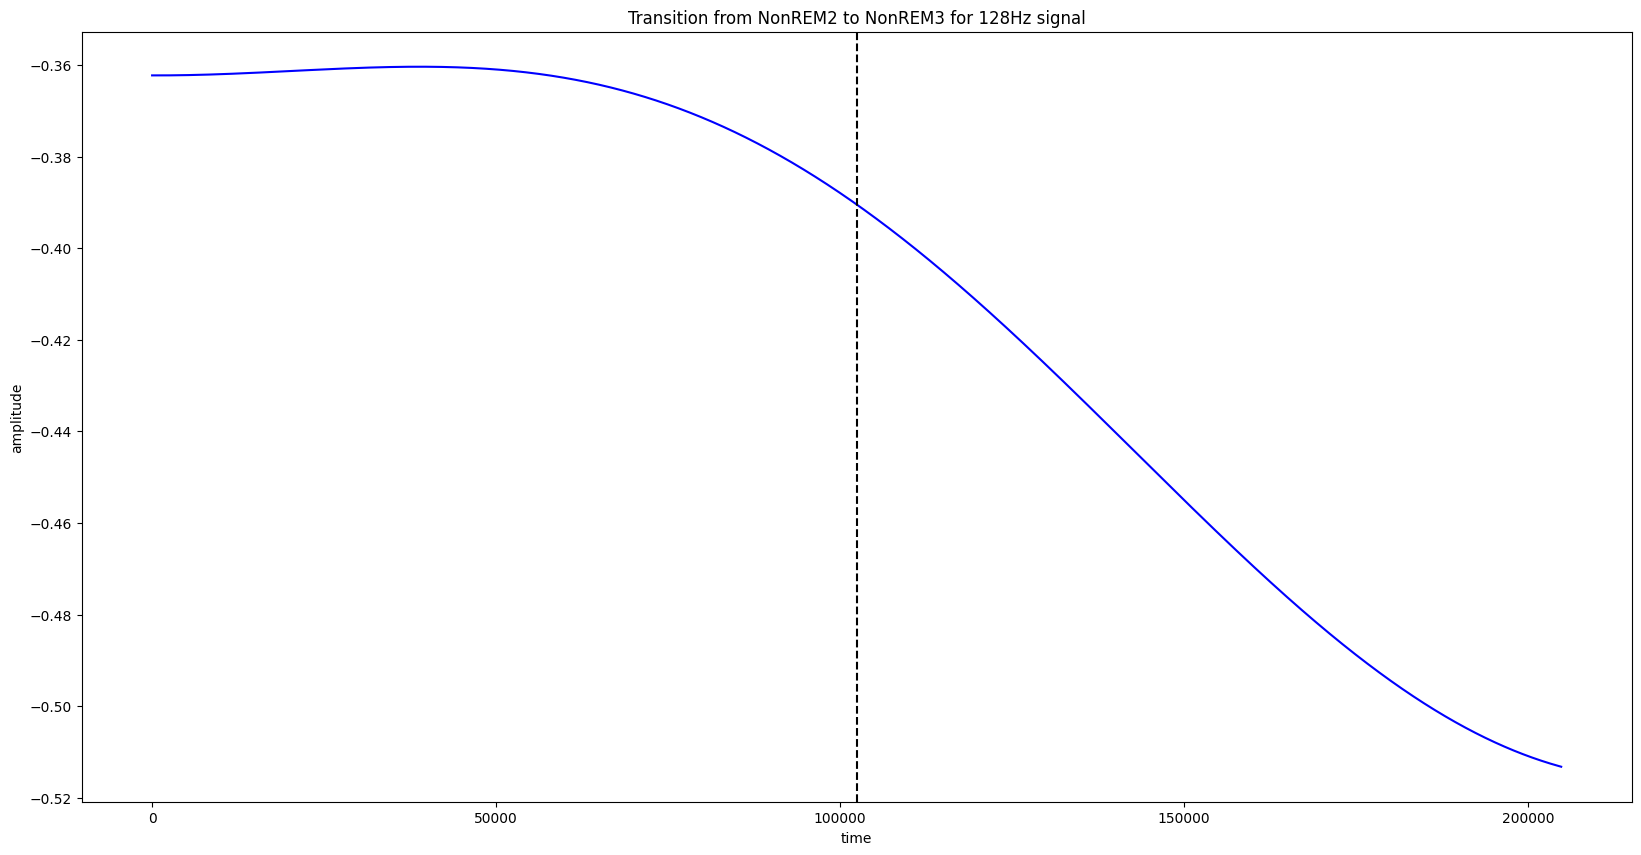

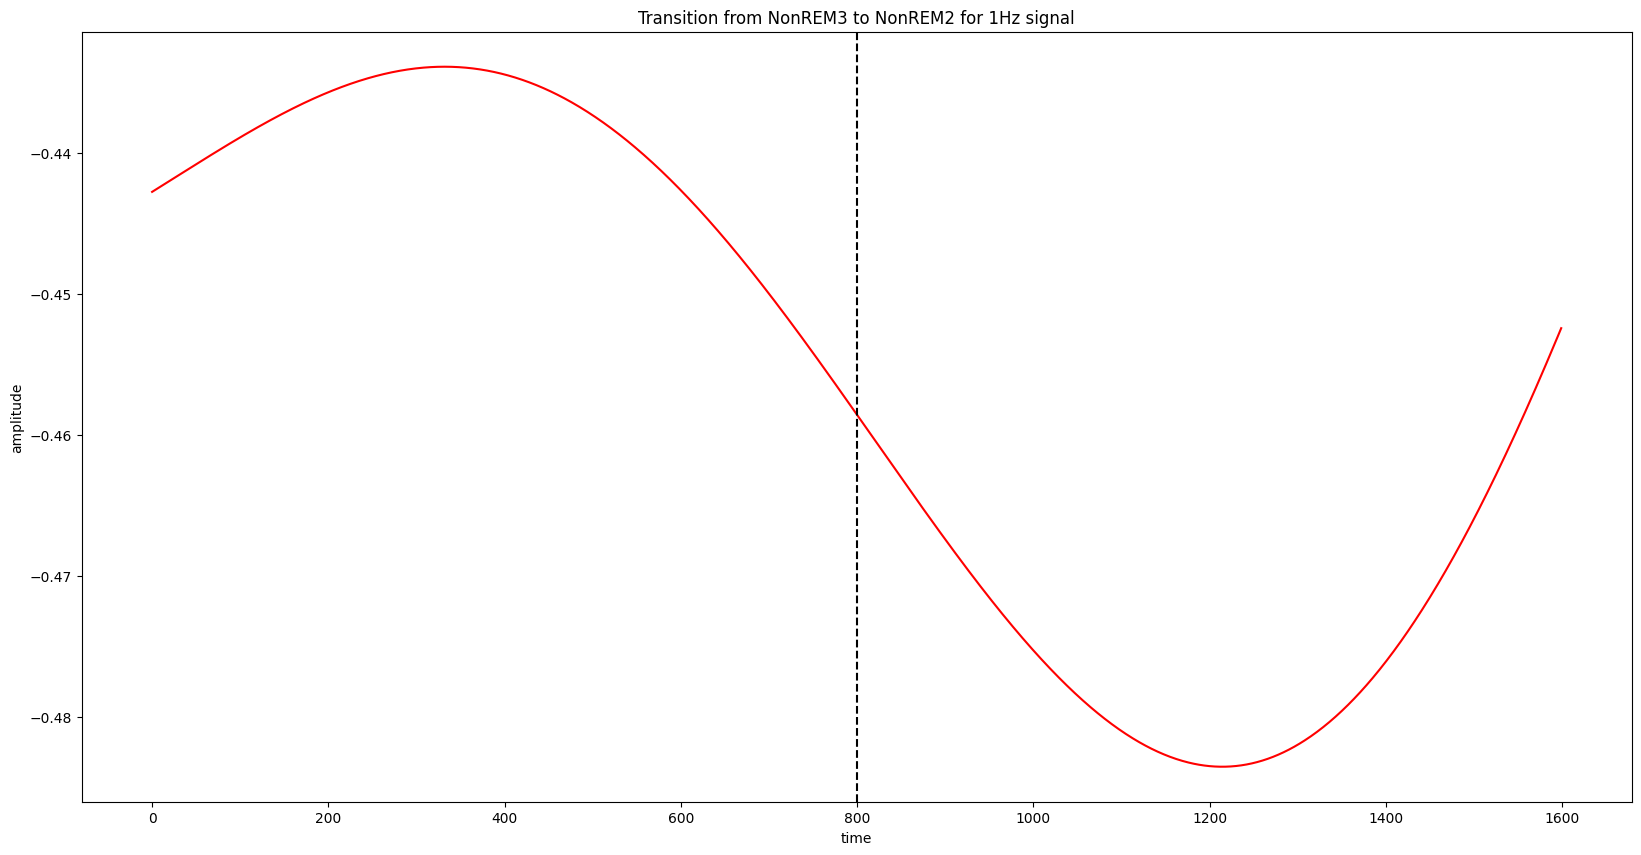

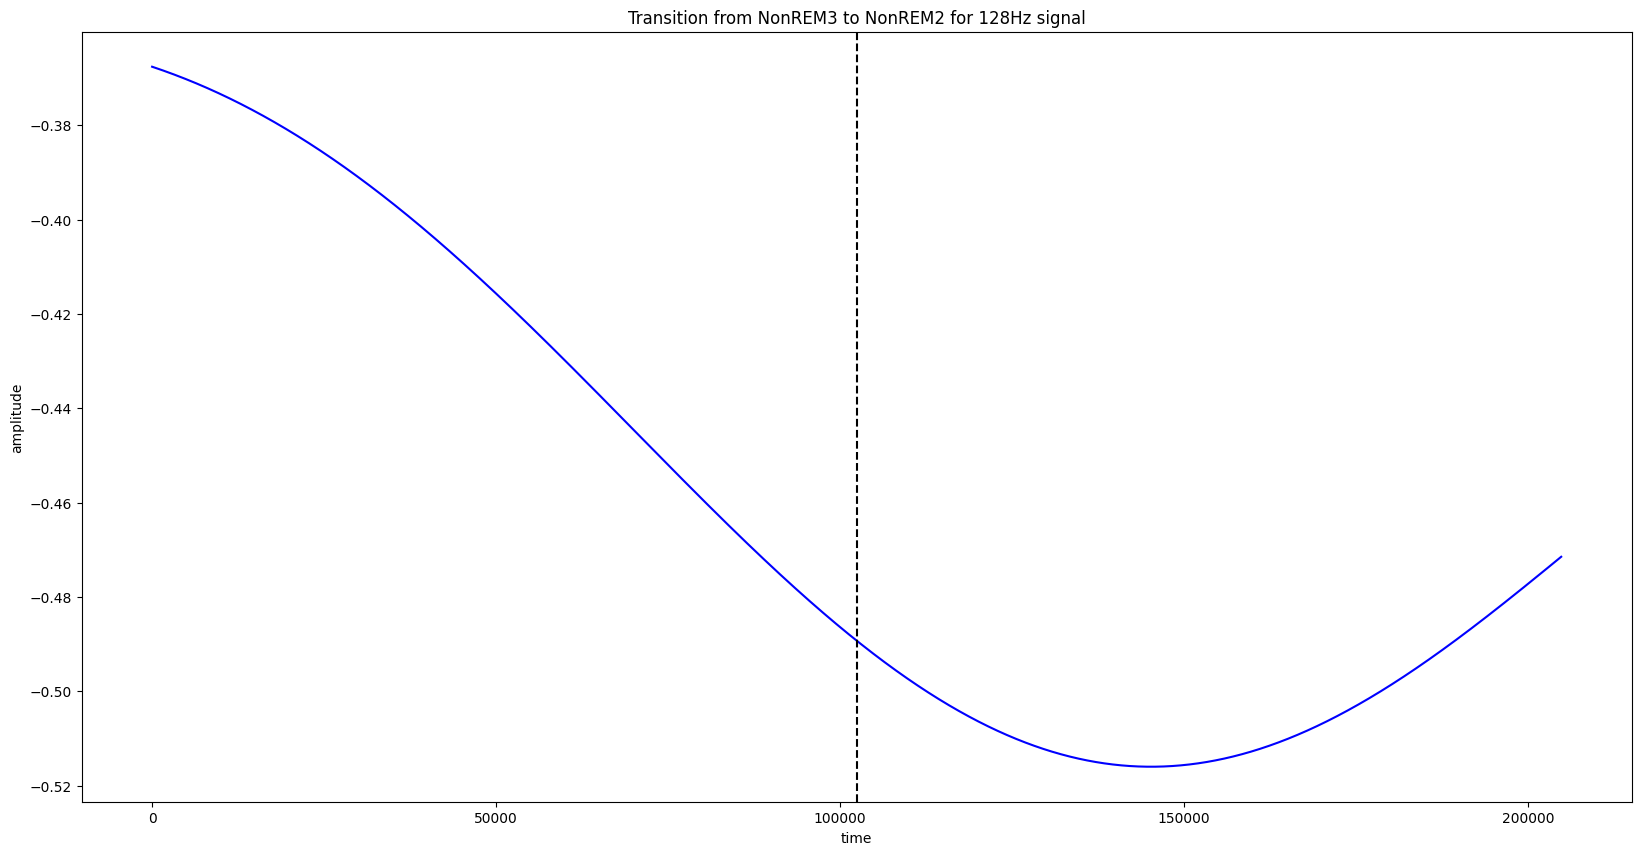

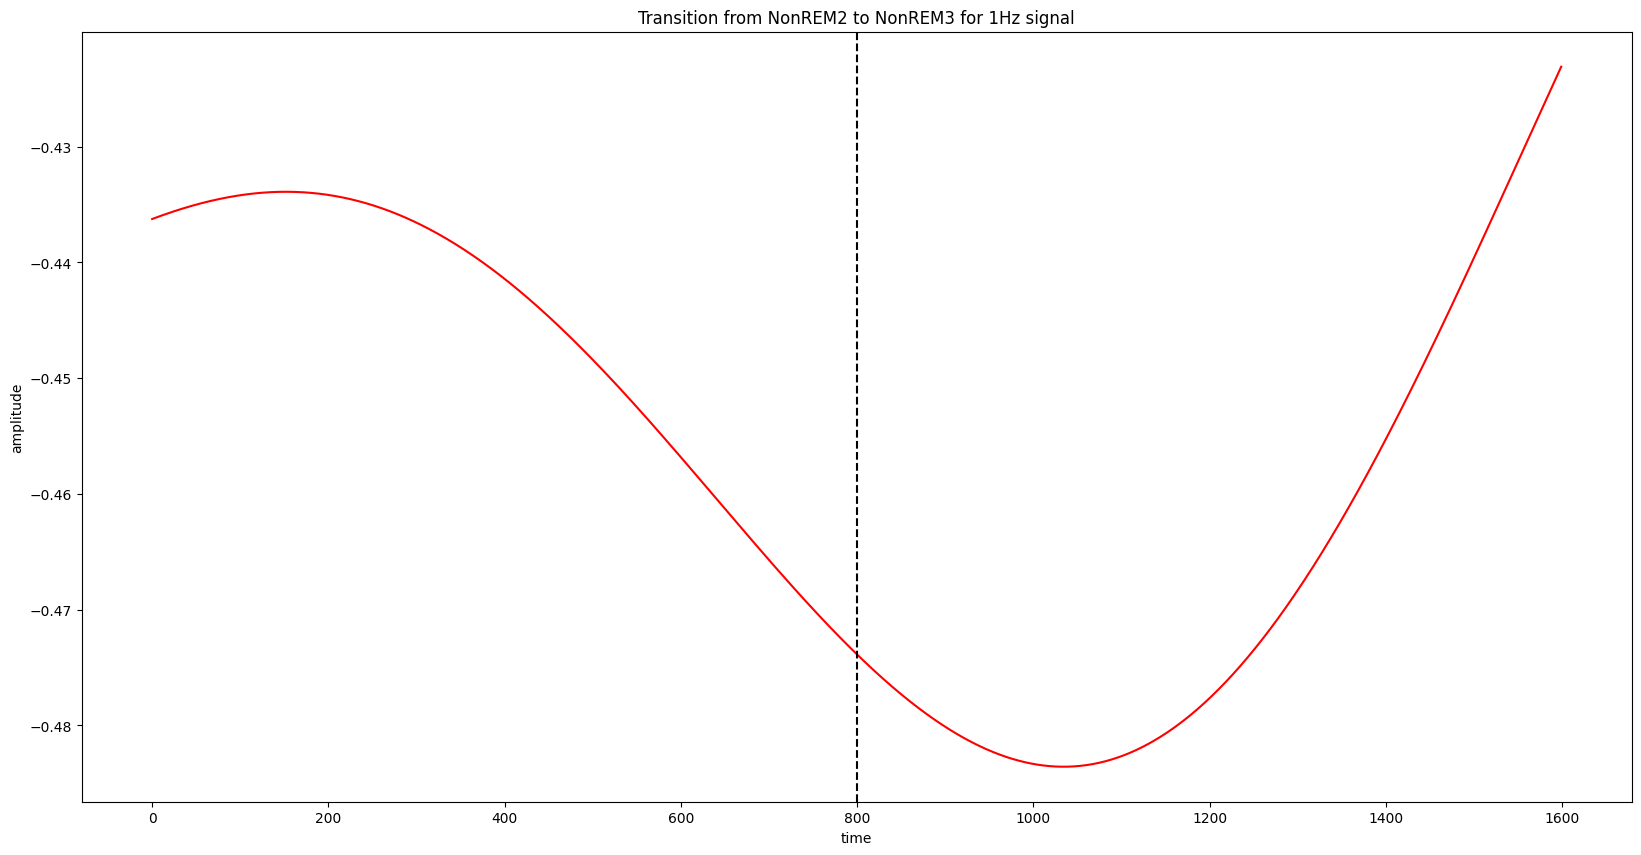

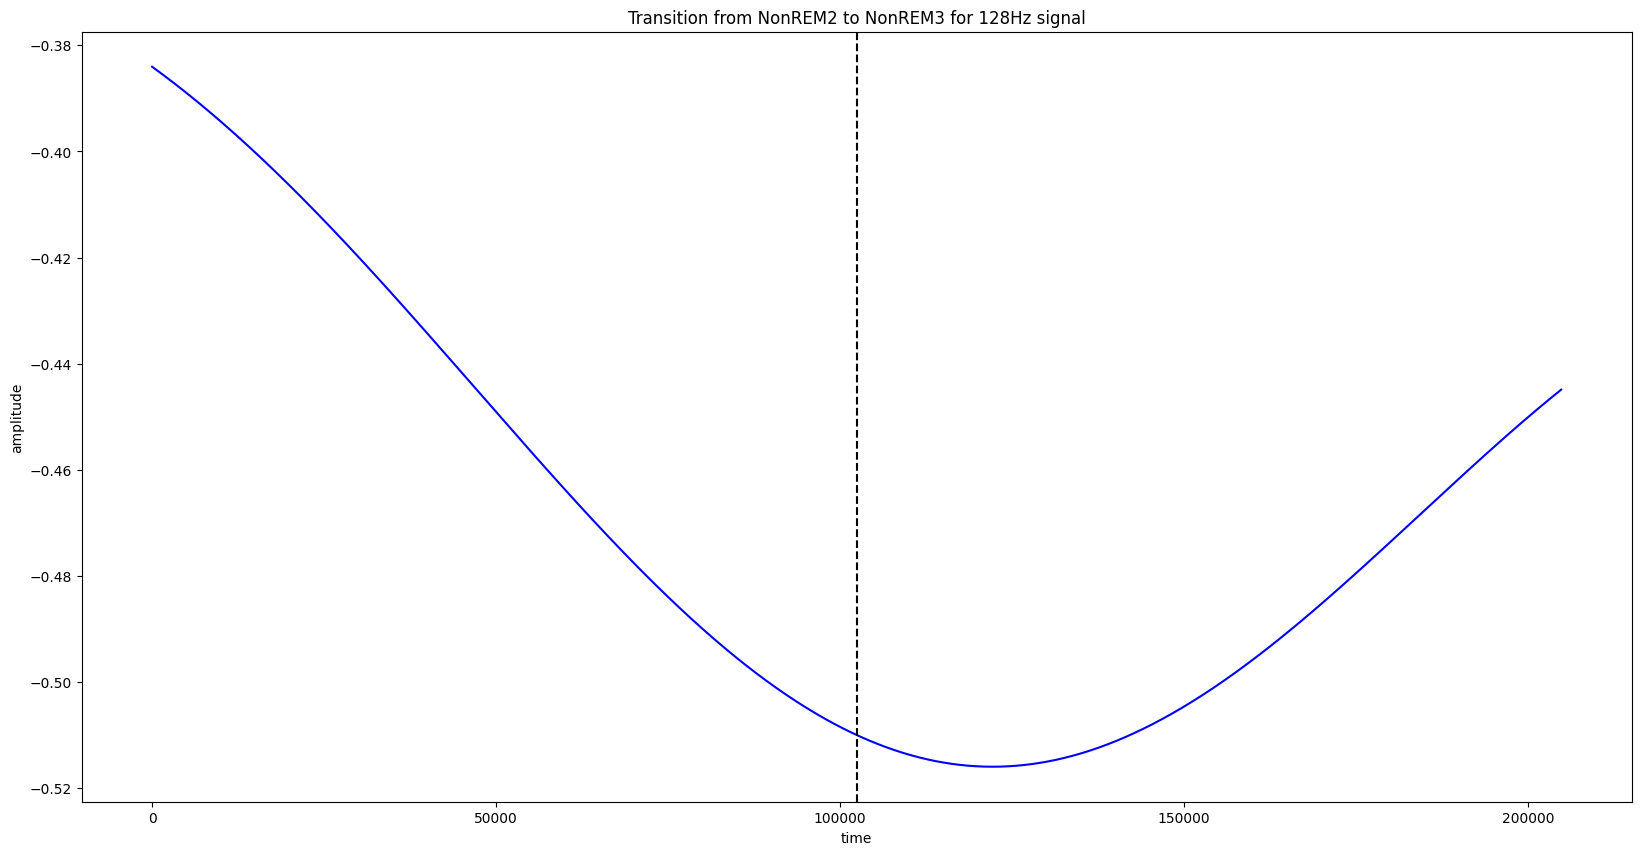

In [21]:
import itertools

dict_items = iter(times_severe.items())
next(dict_items)
for key, value in itertools.islice(dict_items, 9):
    plot_reconstructed_signal_1hz(reconstructed_fft_1, int(key), value[0], value[1])
    plot_reconstructed_signal_128hz(reconstructed_fft_128, int(key), value[0], value[1])

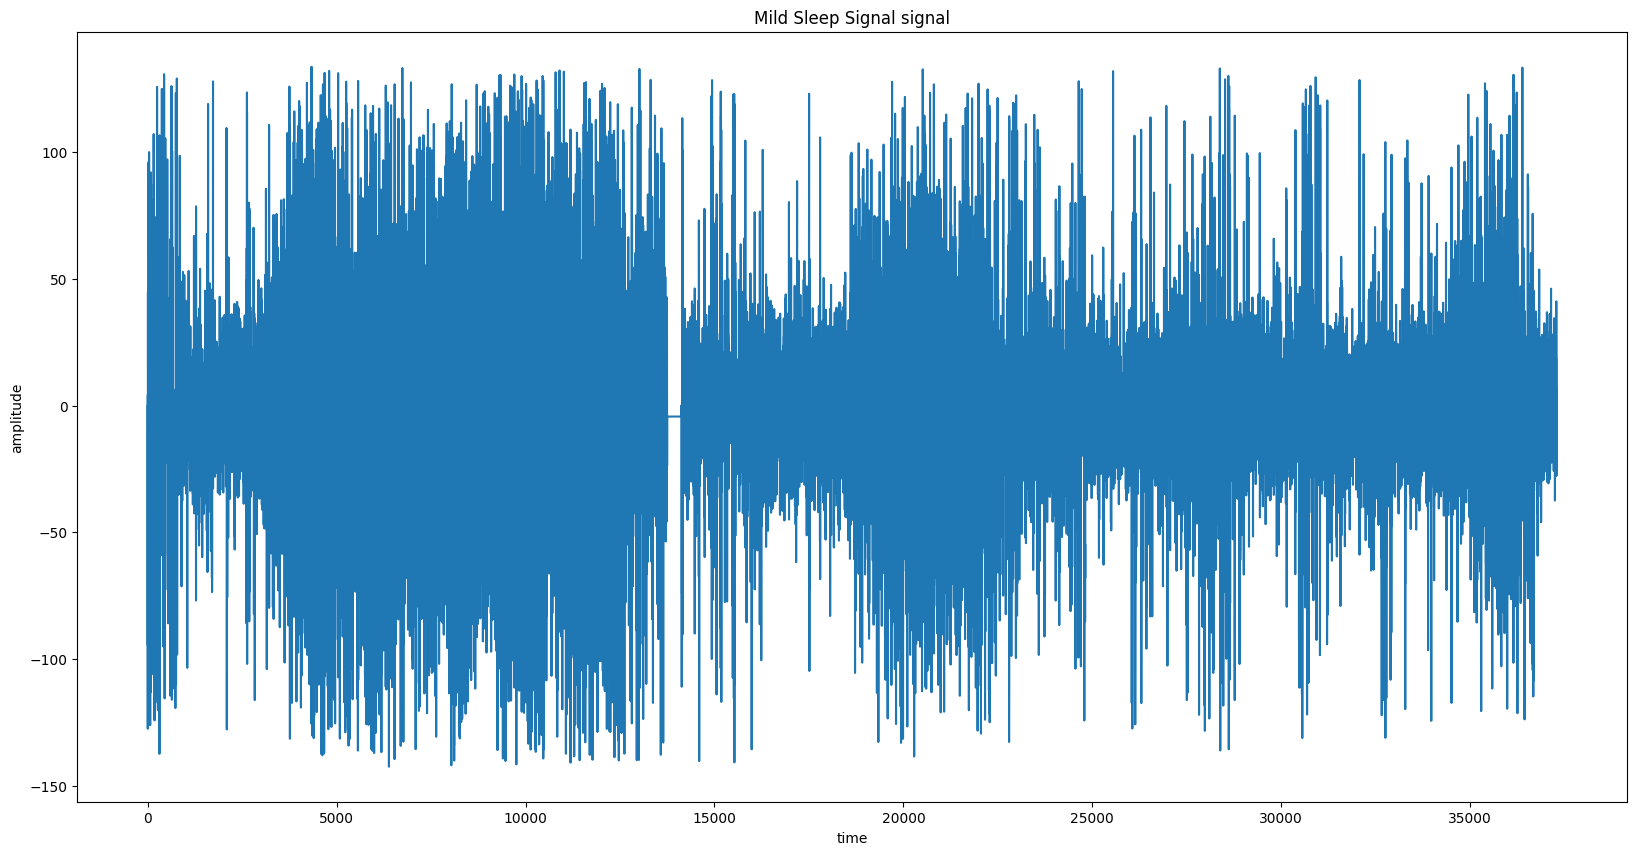

In [22]:
#mild signal EEG O1-A2

mild_signal = combined_signal(edf_files_4, 5)
thresholded_signal_mild = thresholding(mild_signal, 2)
resampled_signal_1hz_mild = resample_signal(thresholded_signal_mild, int(len(thresholded_signal_mild)/200))
resample_signal_128hz_mild = resample_signal(thresholded_signal_mild, int(len(thresholded_signal_mild)/200)*128)
plot_signal("Mild Sleep Signal", resampled_signal_1hz_mild)

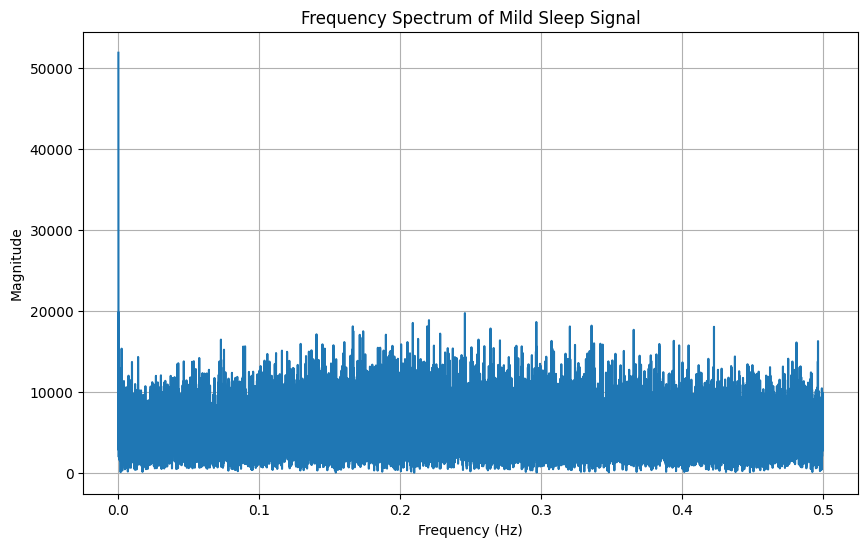

In [23]:
fft_result_1_mild = np.fft.fft(resampled_signal_1hz_mild)
sampling_rate = 1
freq1_mild = np.fft.fftfreq(len(resampled_signal_1hz_mild), 1/sampling_rate)
magnitude_spectrum1_mild = np.abs(fft_result_1_mild)
plt.figure(figsize=(10, 6))
plt.plot(freq1_mild[:len(freq1_mild)//2], magnitude_spectrum1_mild[:len(magnitude_spectrum1_mild)//2])
plt.title("Frequency Spectrum of Mild Sleep Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

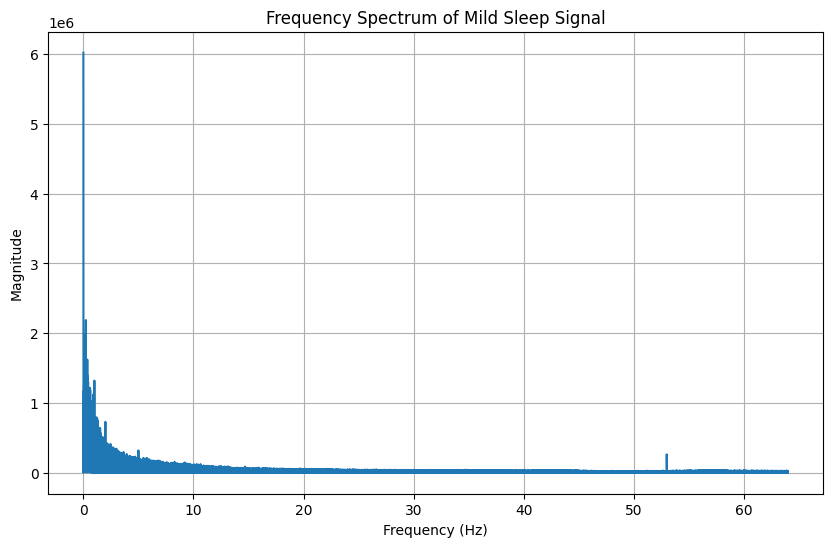

In [24]:
fft_result_128_mild = np.fft.fft(resample_signal_128hz_mild)
sampling_rate = 128
freq2_mild = np.fft.fftfreq(len(resample_signal_128hz_mild), 1/sampling_rate)
magnitude_spectrum2_mild = np.abs(fft_result_128_mild)
plt.figure(figsize=(10, 6))
plt.plot(freq2_mild[:len(freq2_mild)//2], magnitude_spectrum2_mild[:len(magnitude_spectrum2_mild)//2])
plt.title("Frequency Spectrum of Mild Sleep Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

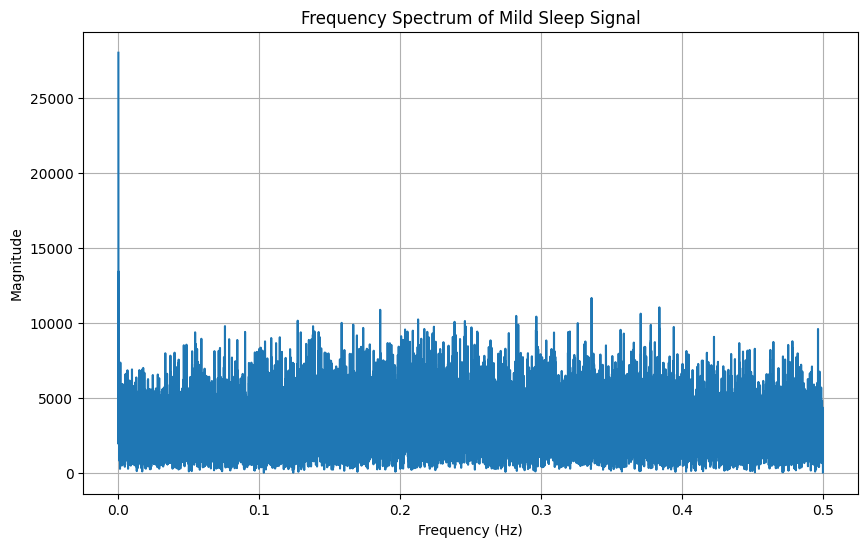

In [25]:
from scipy.signal import windows
window1_mild = windows.hann(len(resampled_signal_1hz_mild))
windowed_signal1_mild = resampled_signal_1hz_mild * window1_mild
fft_result_windowed1_mild = np.fft.fft(windowed_signal1_mild)
magnitude_spectrum_windowed1_mild = np.abs(fft_result_windowed1_mild)
plt.figure(figsize=(10, 6))
plt.plot(freq1_mild[:len(freq1_mild)//2], magnitude_spectrum_windowed1_mild[:len(magnitude_spectrum_windowed1_mild)//2])
plt.title("Frequency Spectrum of Mild Sleep Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

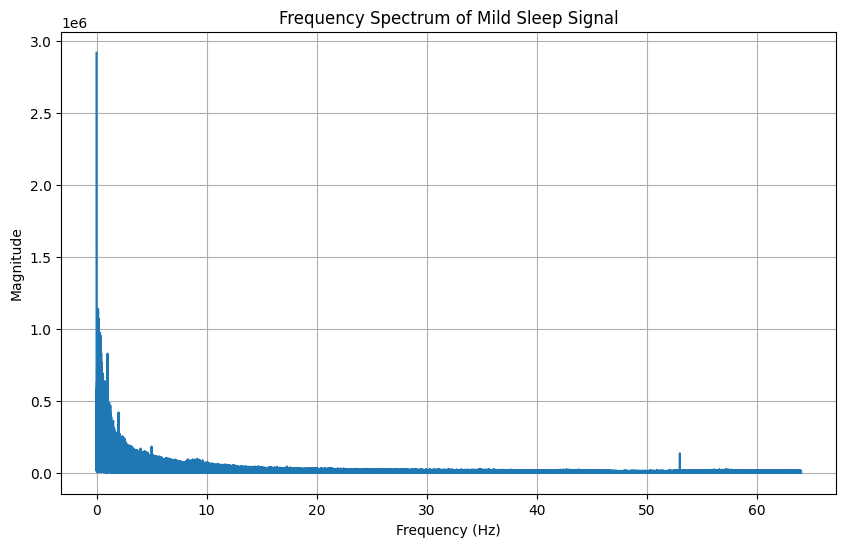

In [26]:
window2_mild = windows.hann(len(resample_signal_128hz_mild))
windowed_signal2_mild = resample_signal_128hz_mild * window2_mild
fft_result_windowed2_mild = np.fft.fft(windowed_signal2_mild)
magnitude_spectrum_windowed2_mild = np.abs(fft_result_windowed2_mild)
plt.figure(figsize=(10, 6))
plt.plot(freq2_mild[:len(freq2_mild)//2], magnitude_spectrum_windowed2_mild[:len(magnitude_spectrum_windowed2_mild)//2])
plt.title("Frequency Spectrum of Mild Sleep Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

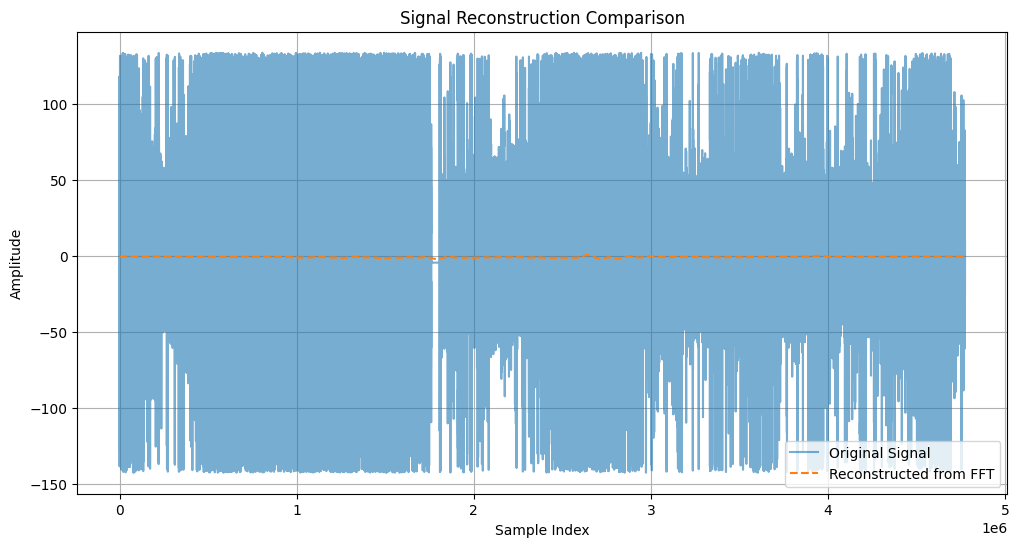

In [27]:
fft_filtered_128_mild = np.copy(fft_result_windowed2_mild)
fft_filtered_128_mild[50:] = 0

fft_filtered_1_mild = np.copy(fft_result_windowed1_mild)
fft_filtered_1_mild[50:] = 0

reconstructed_fft_128_mild = np.fft.ifft(fft_filtered_128_mild).real
reconstructed_fft_1_mild = np.fft.ifft(fft_filtered_1_mild).real

plt.figure(figsize=(12, 6))
plt.plot(resample_signal_128hz_mild, label="Original Signal", alpha=0.6)
plt.plot(reconstructed_fft_128_mild, label="Reconstructed from FFT", linestyle='dashed')
plt.title("Signal Reconstruction Comparison")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

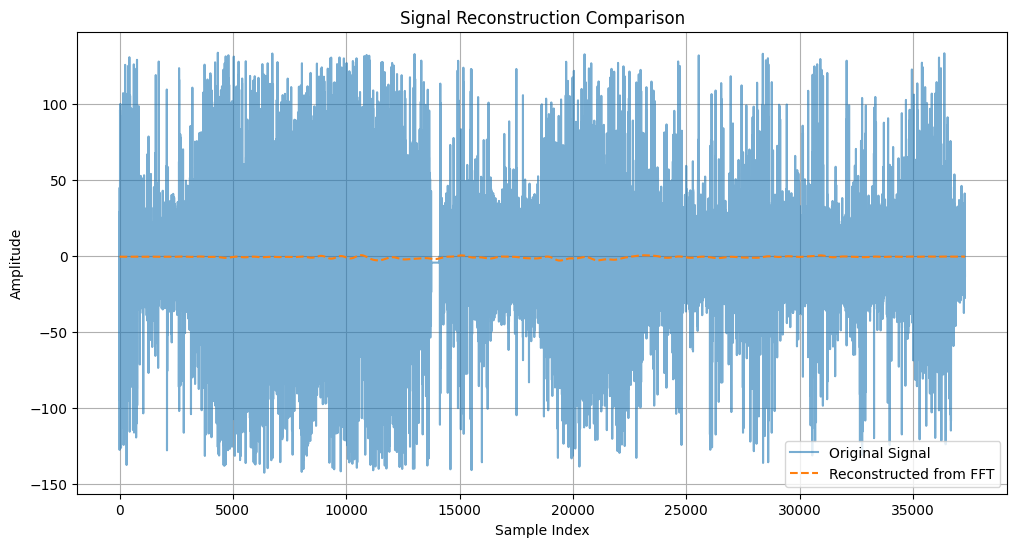

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(resampled_signal_1hz_mild, label="Original Signal", alpha=0.6)
plt.plot(reconstructed_fft_1_mild, label="Reconstructed from FFT", linestyle='dashed')
plt.title("Signal Reconstruction Comparison")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

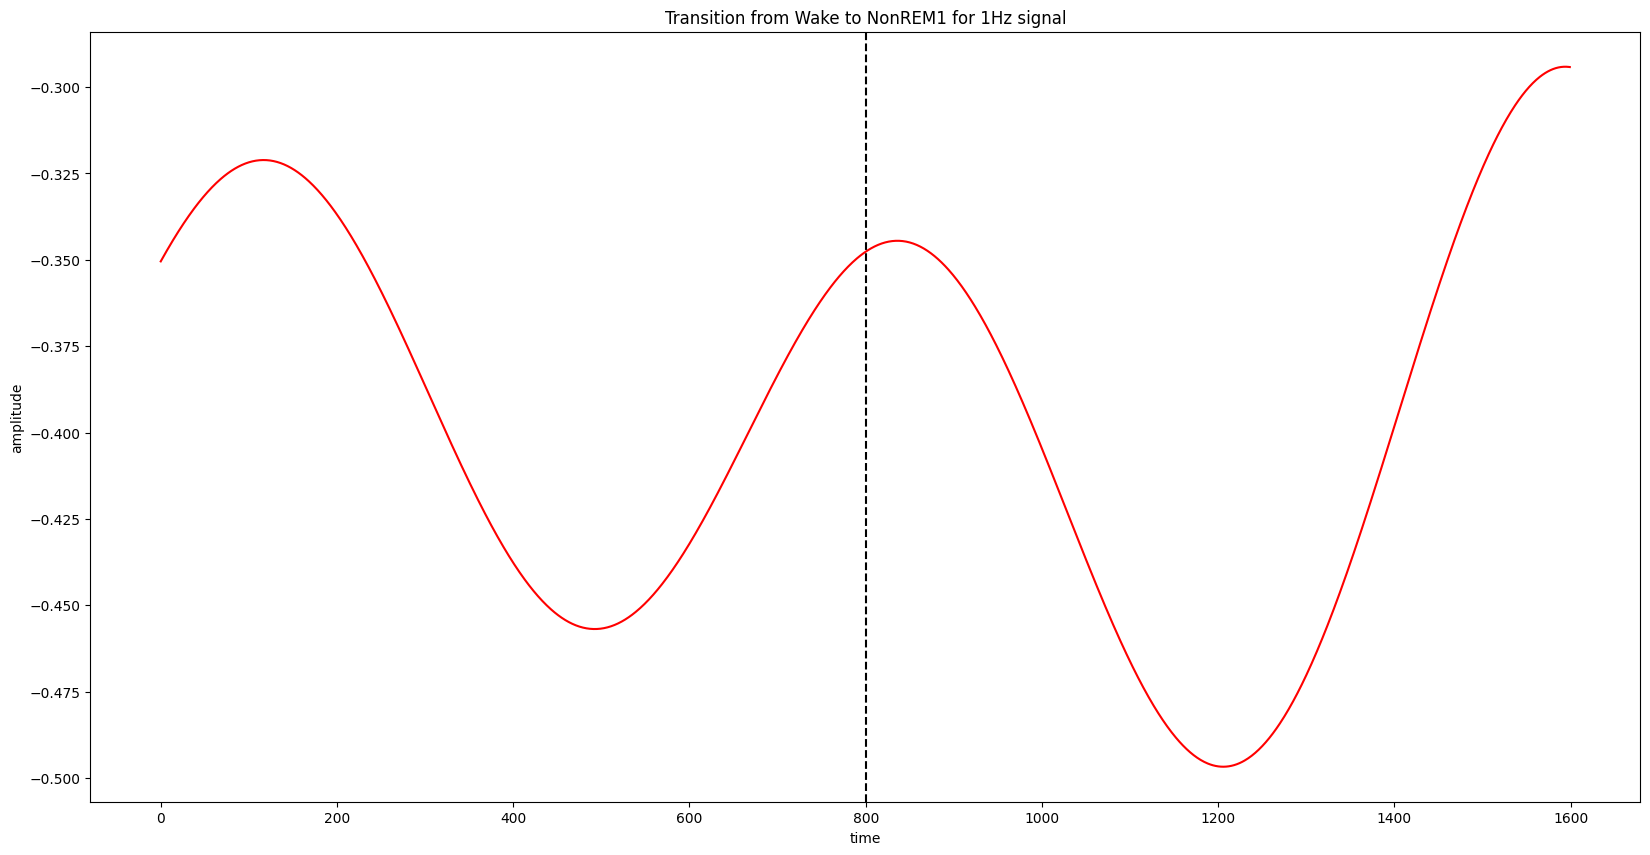

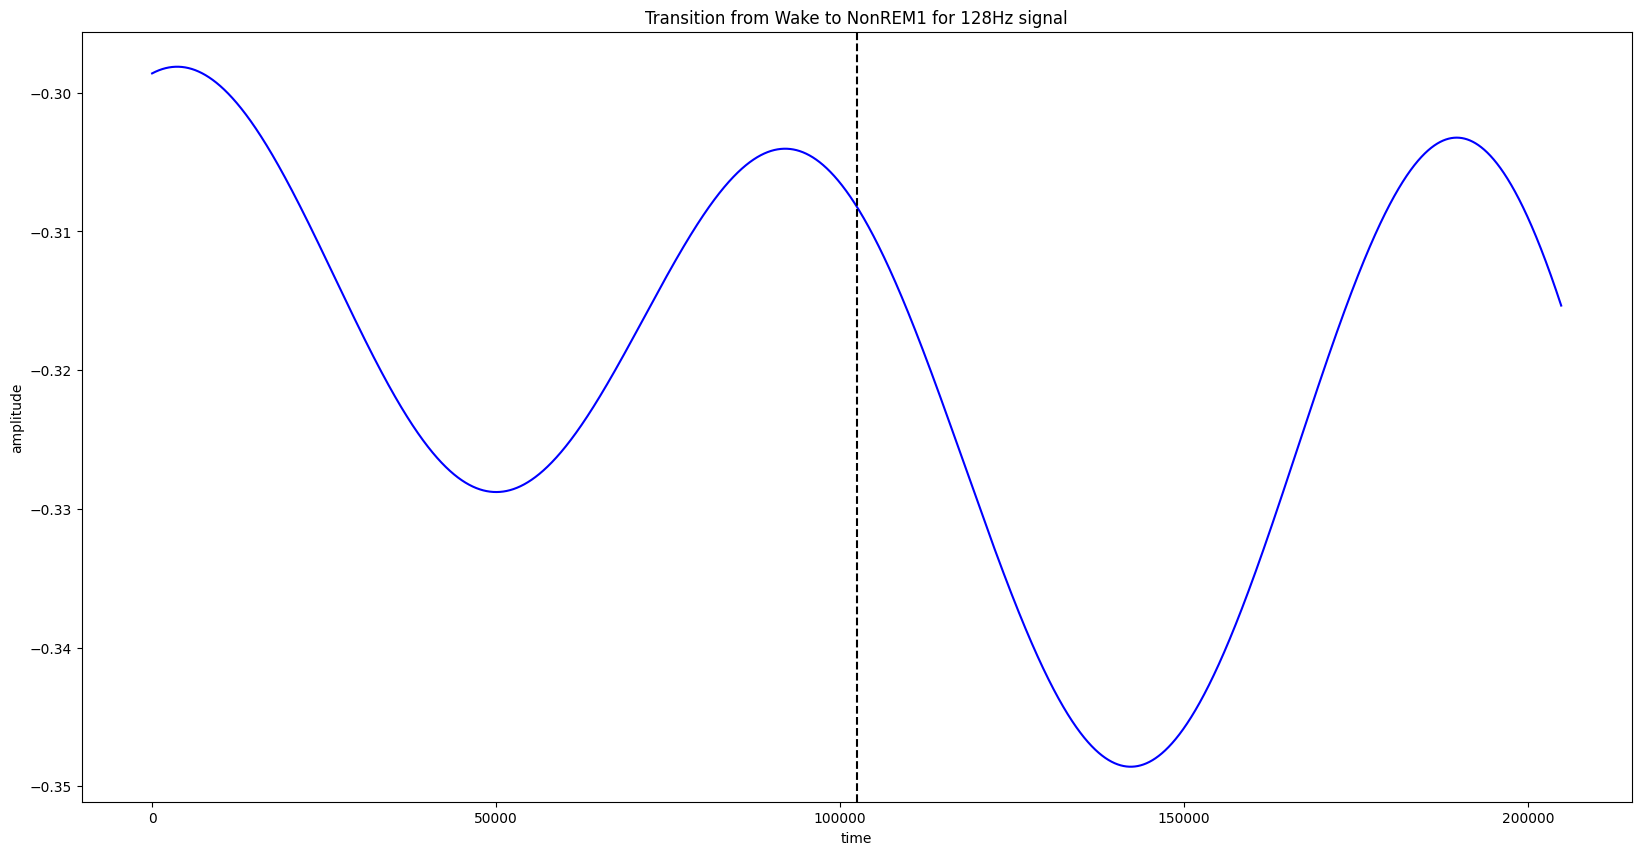

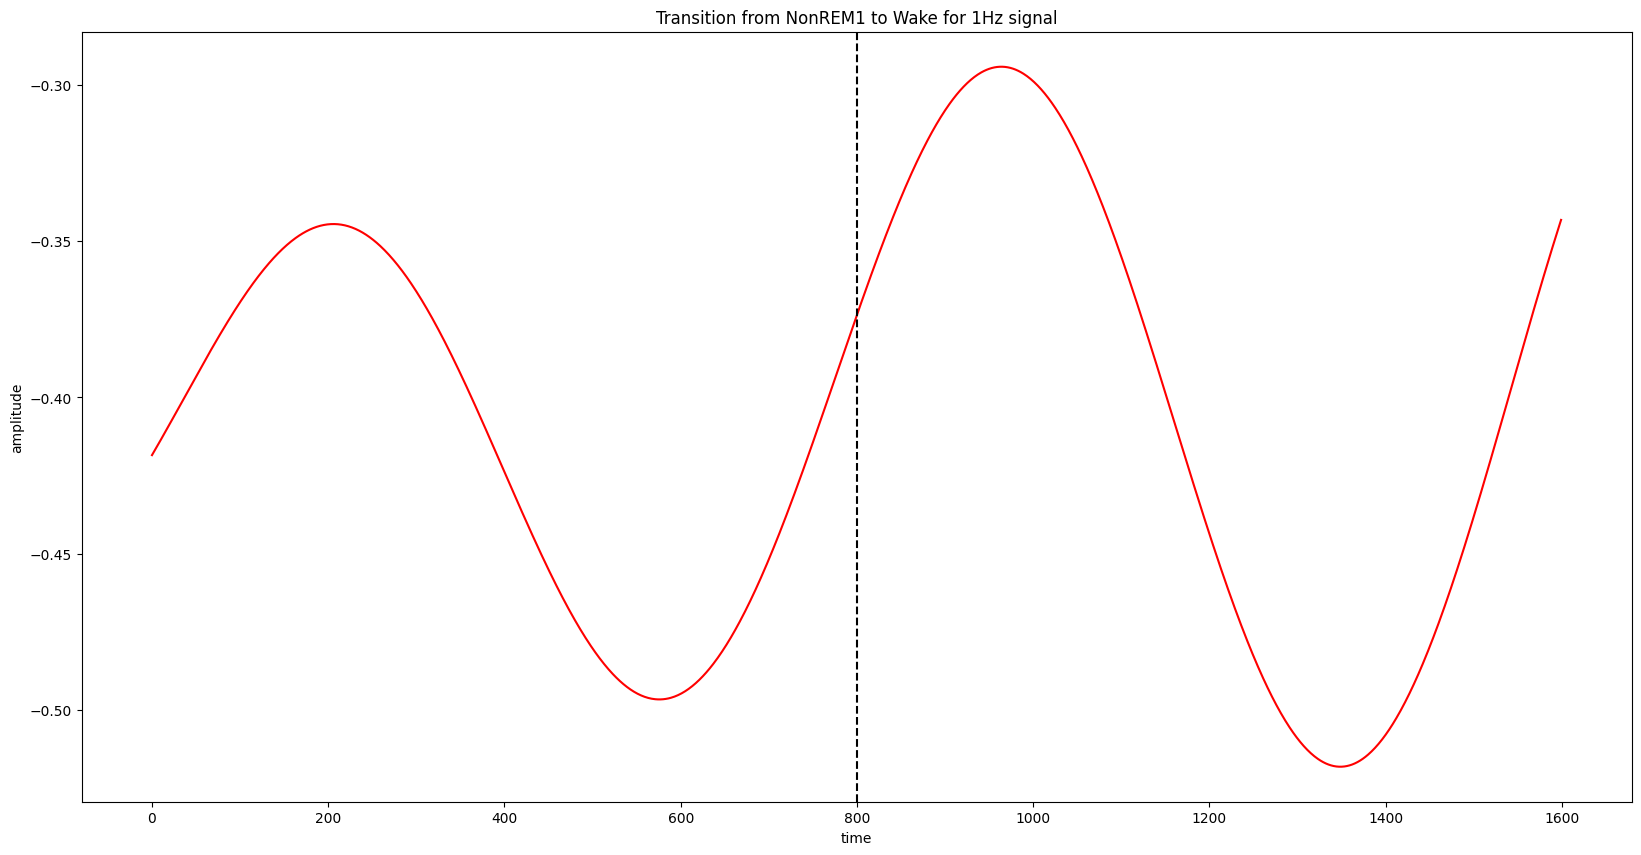

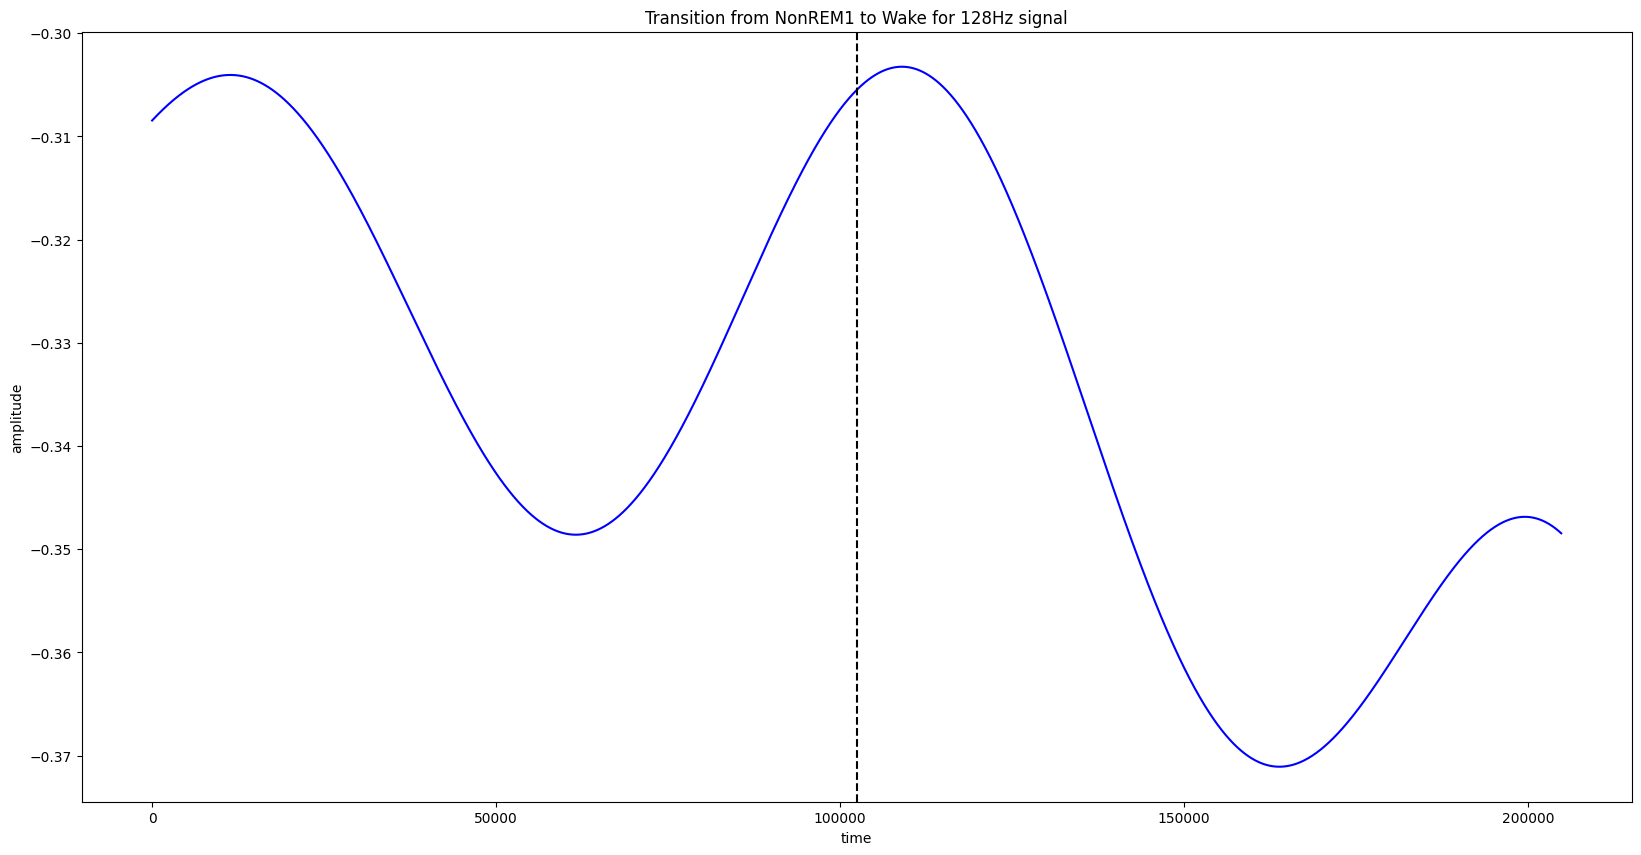

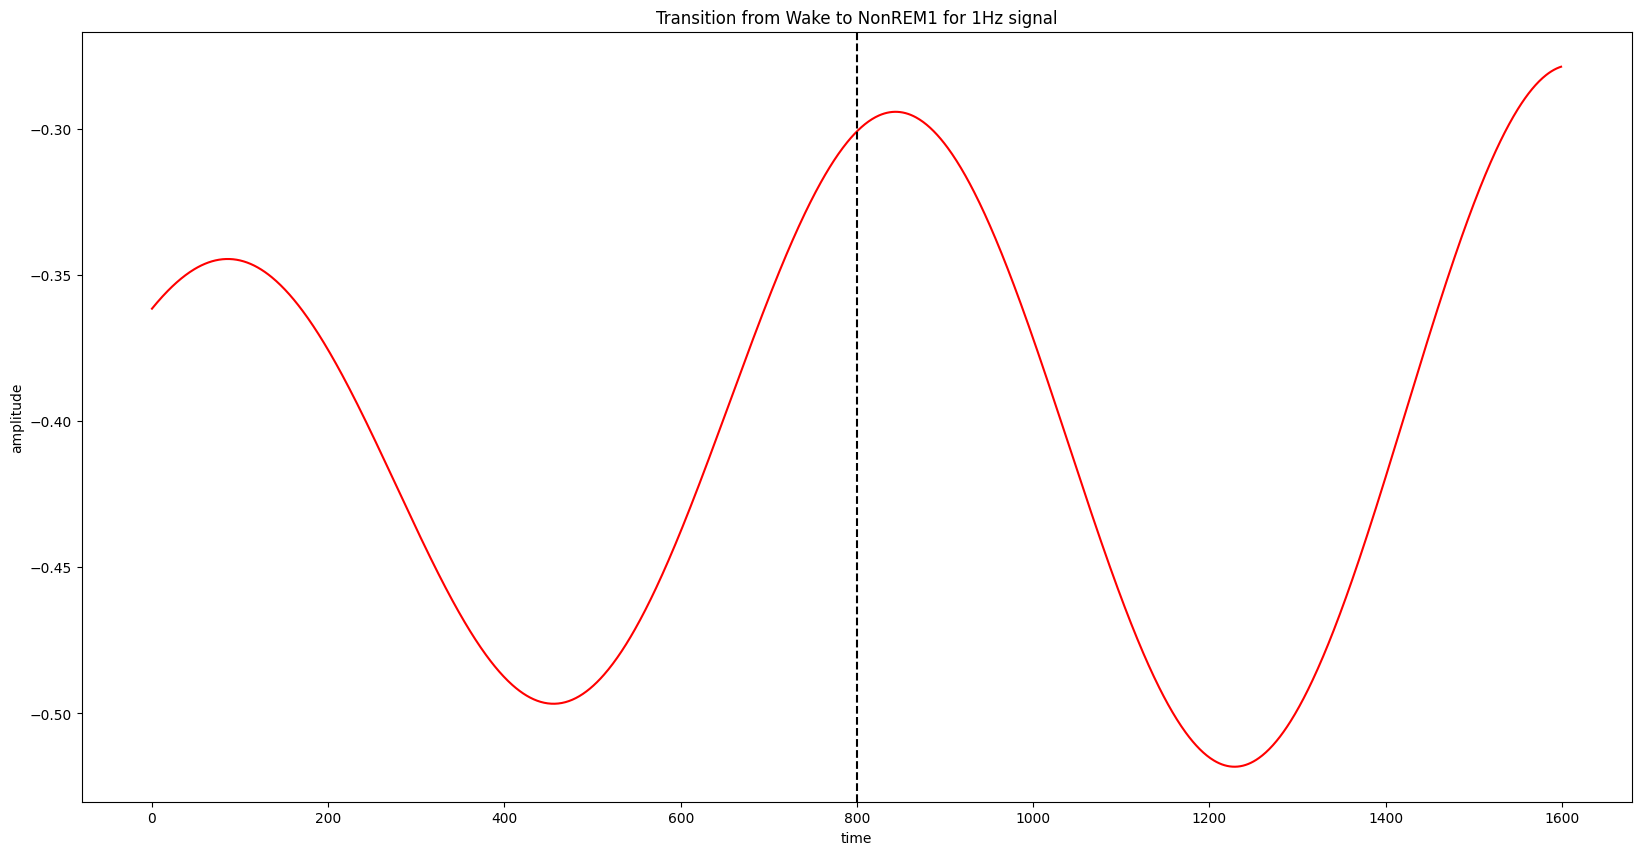

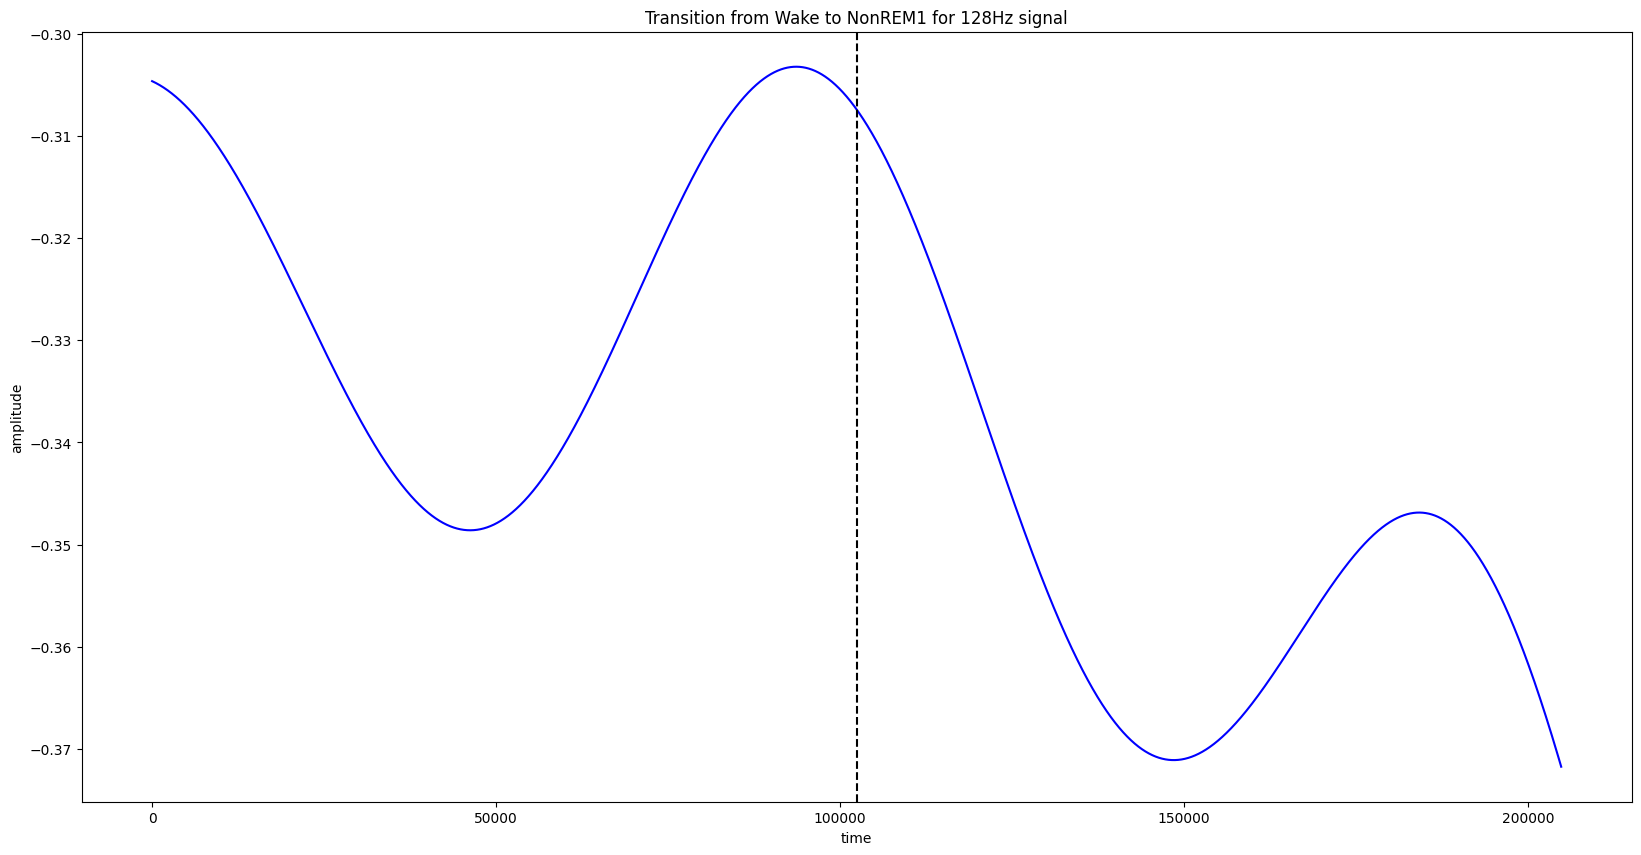

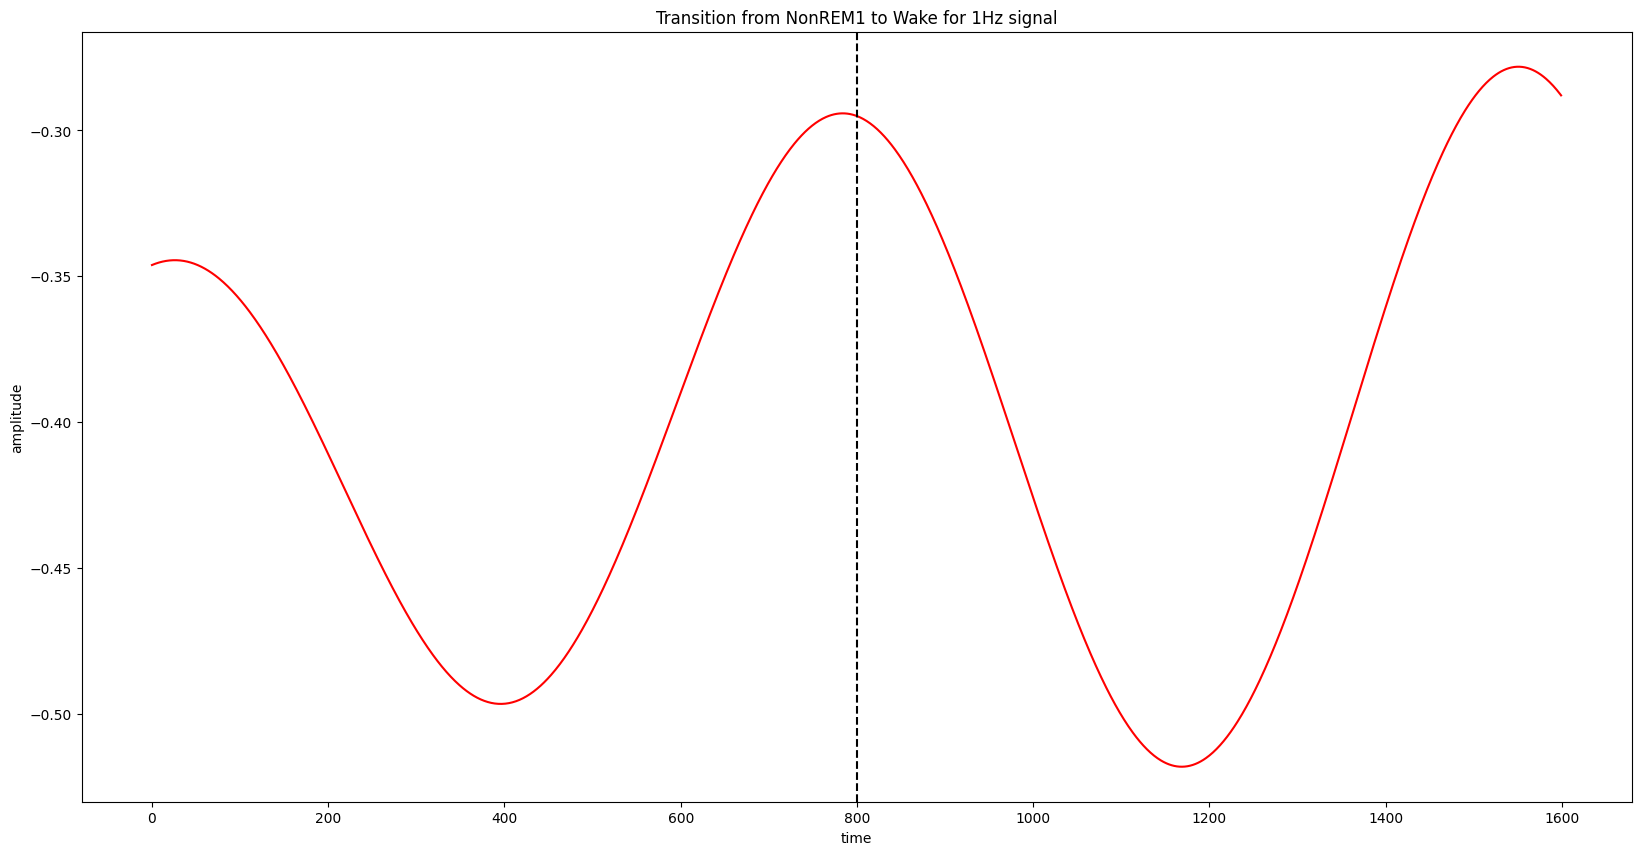

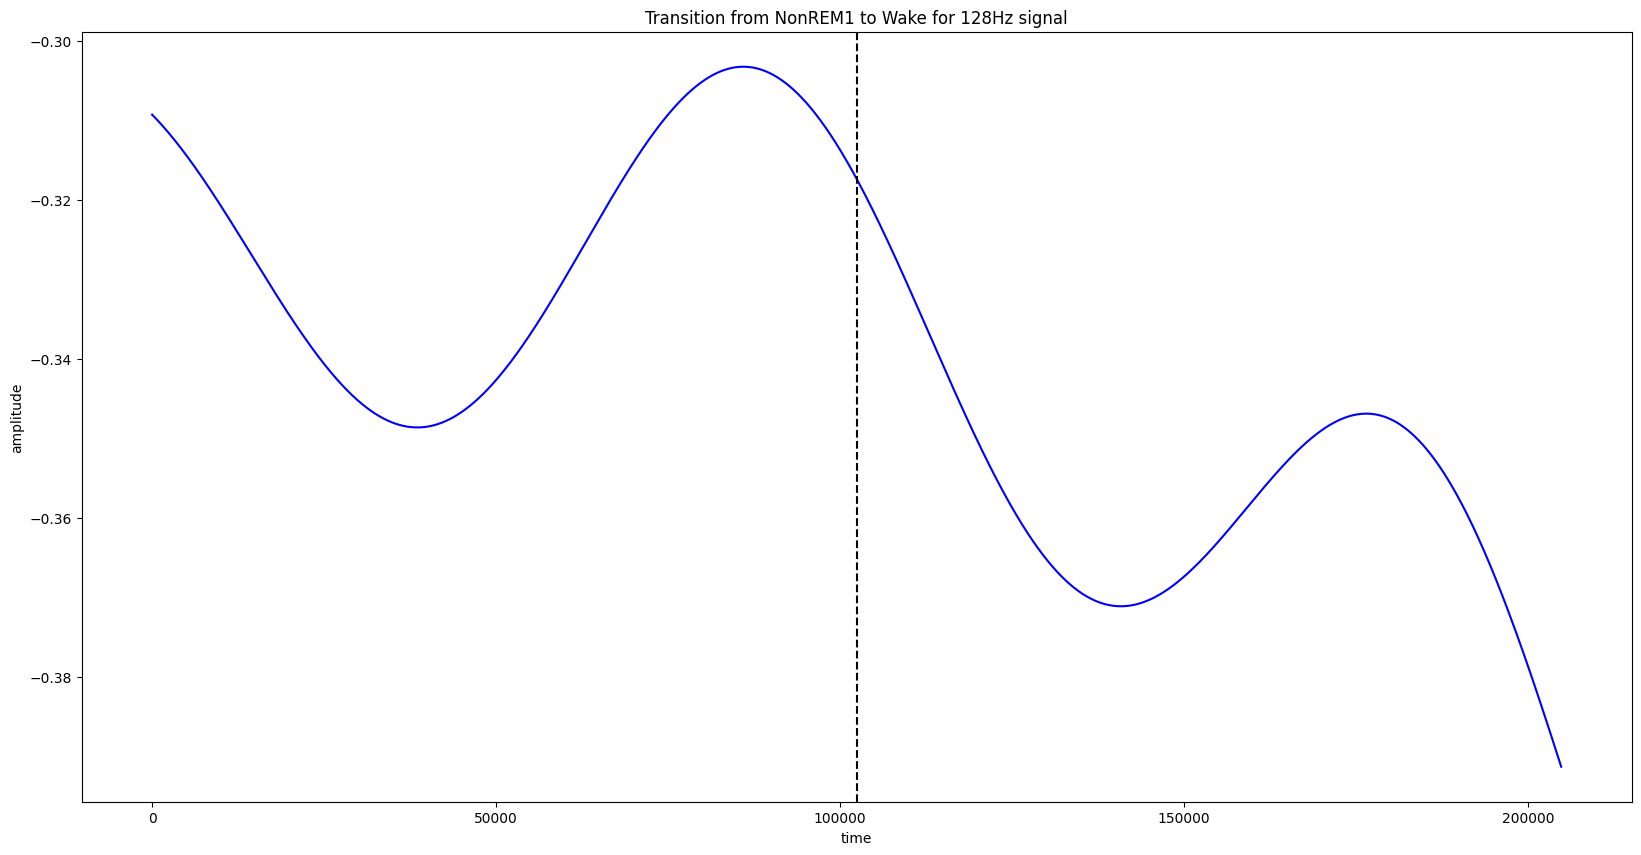

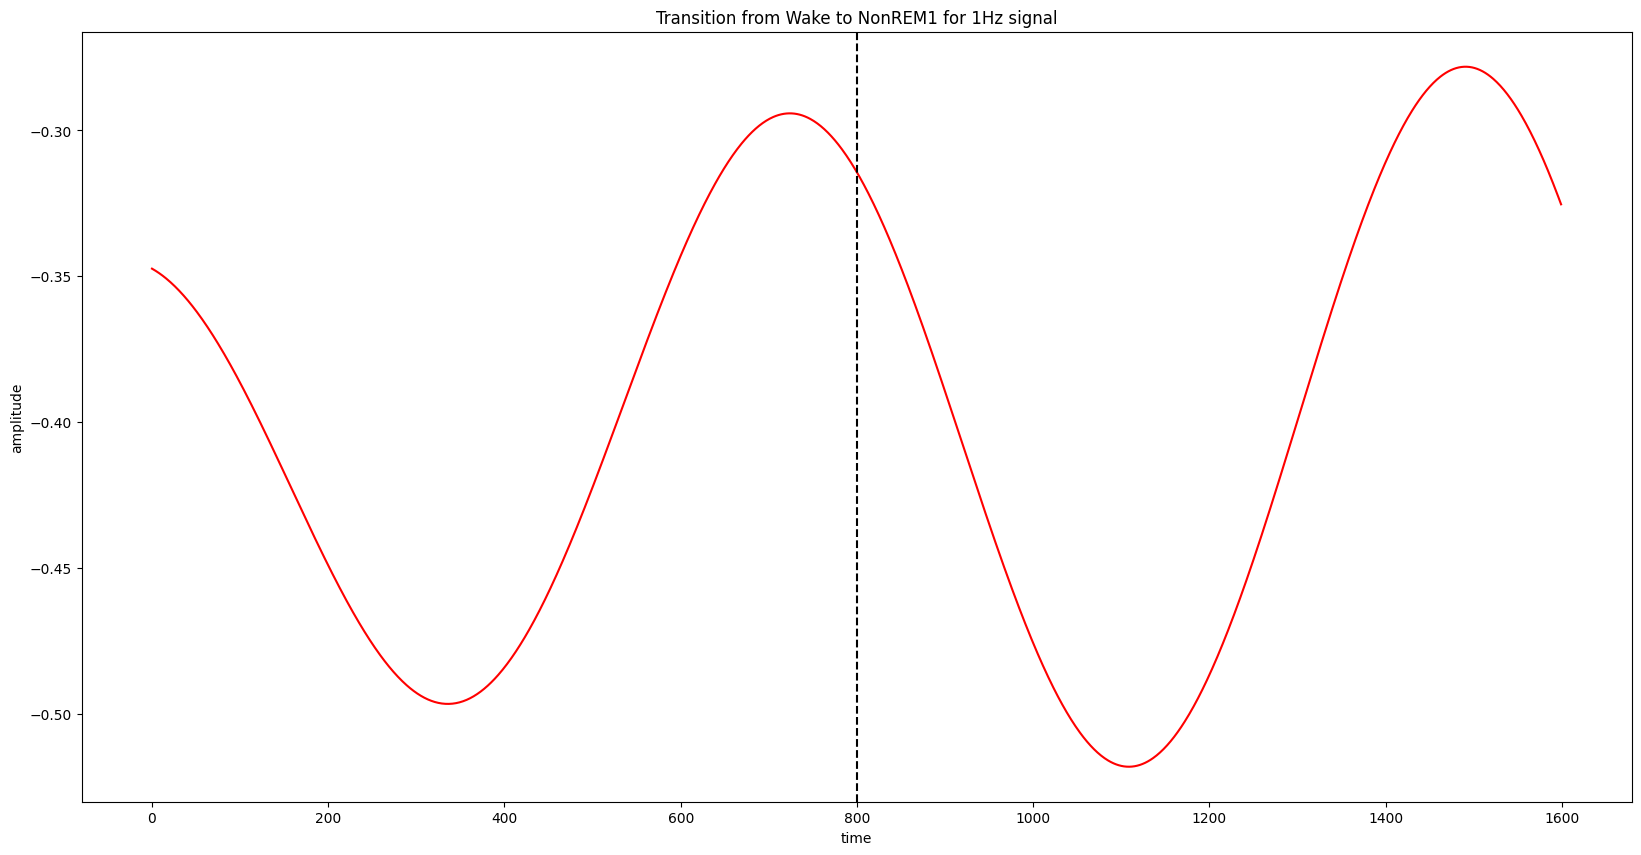

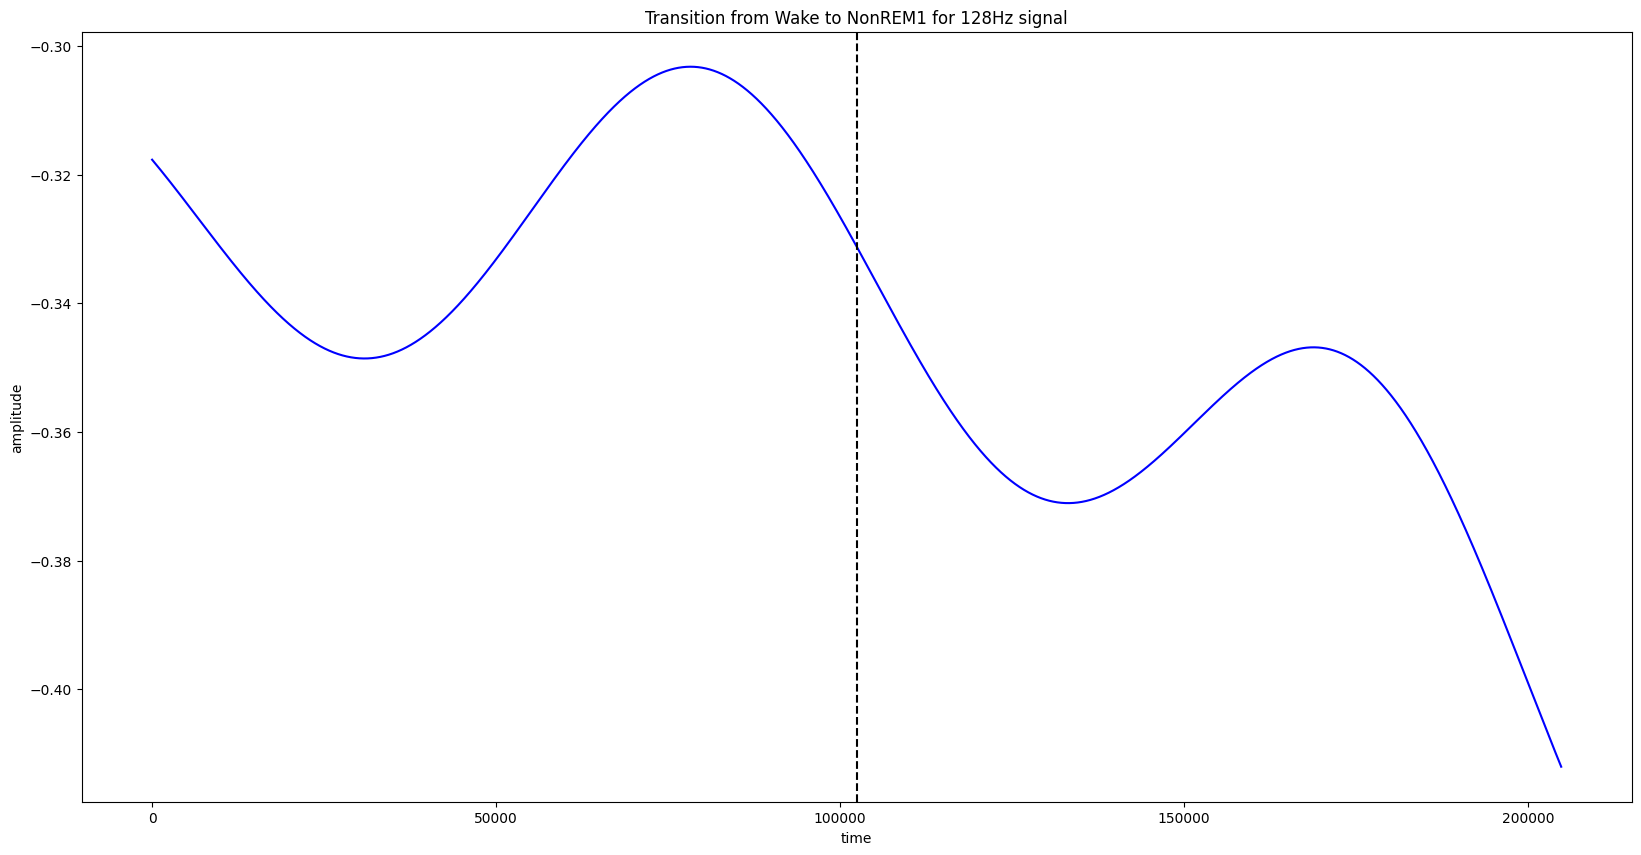

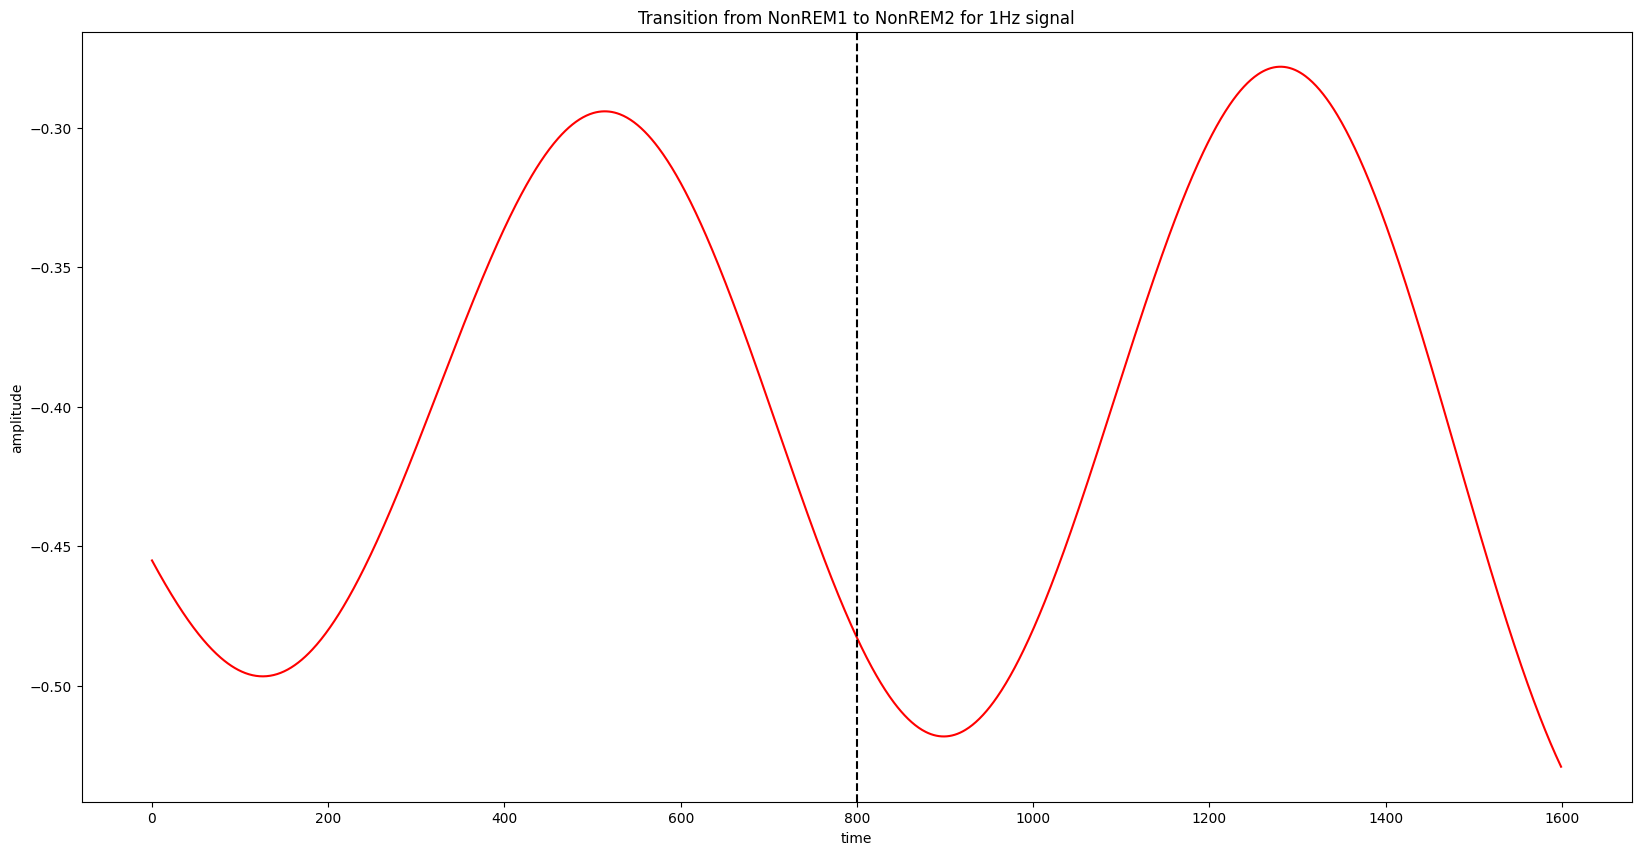

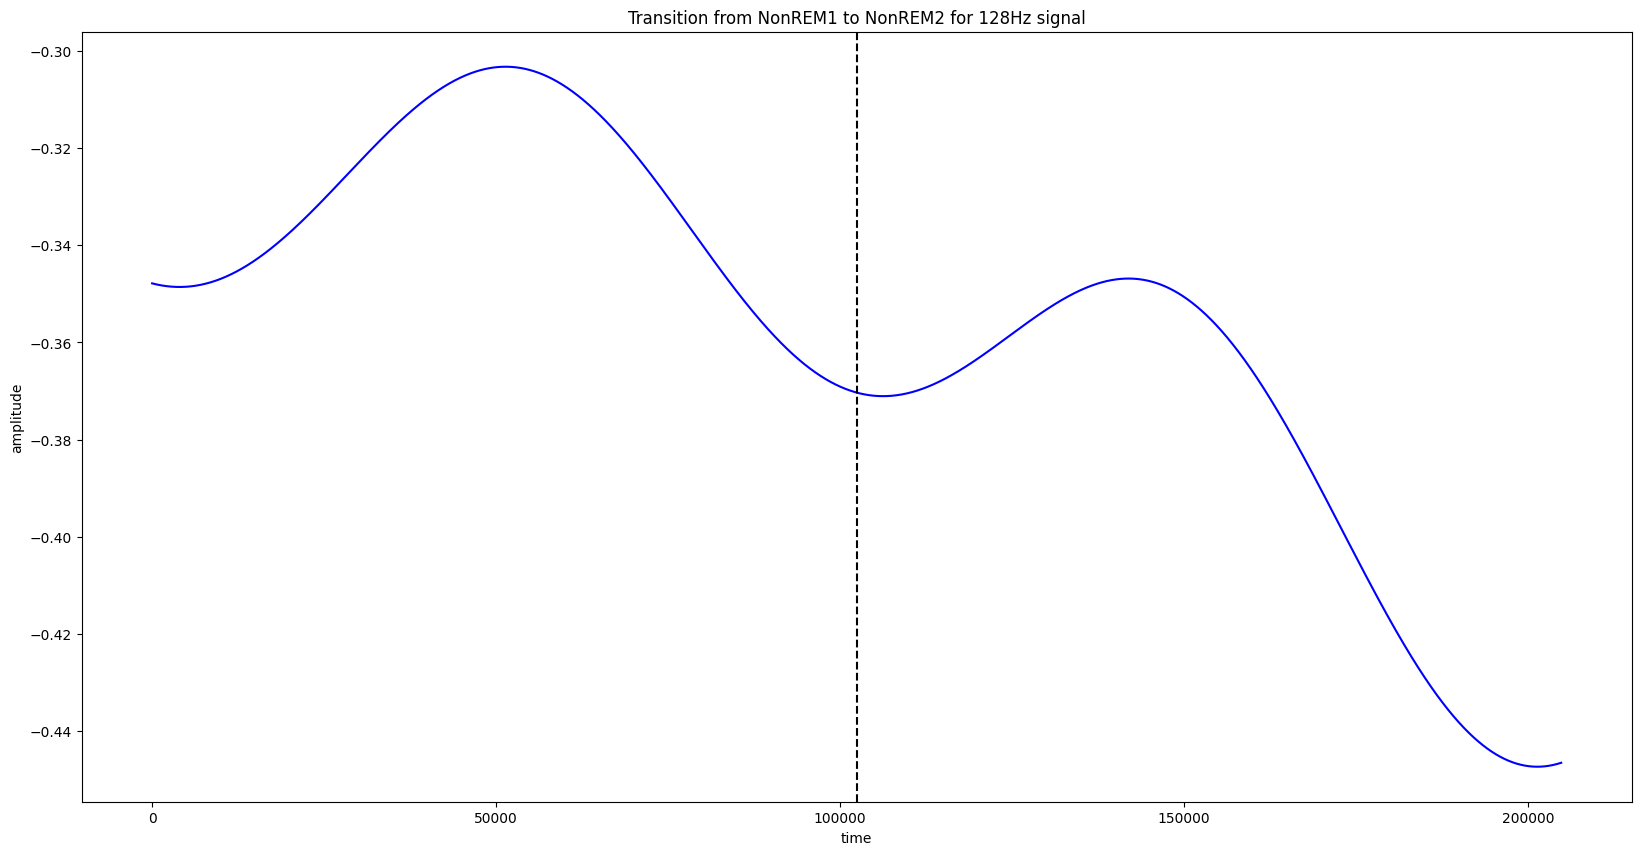

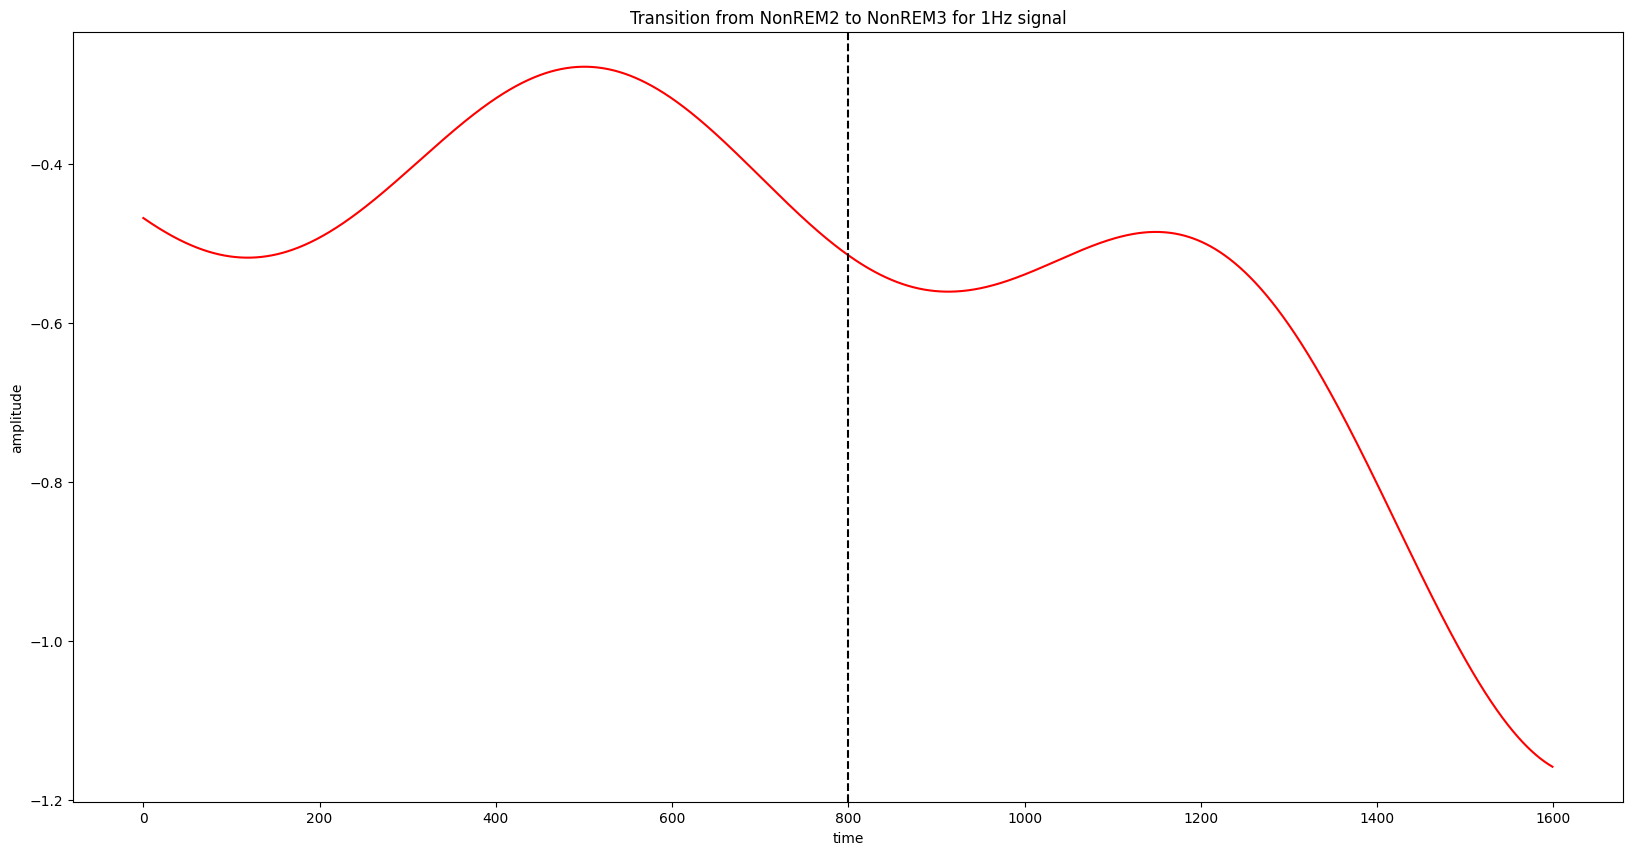

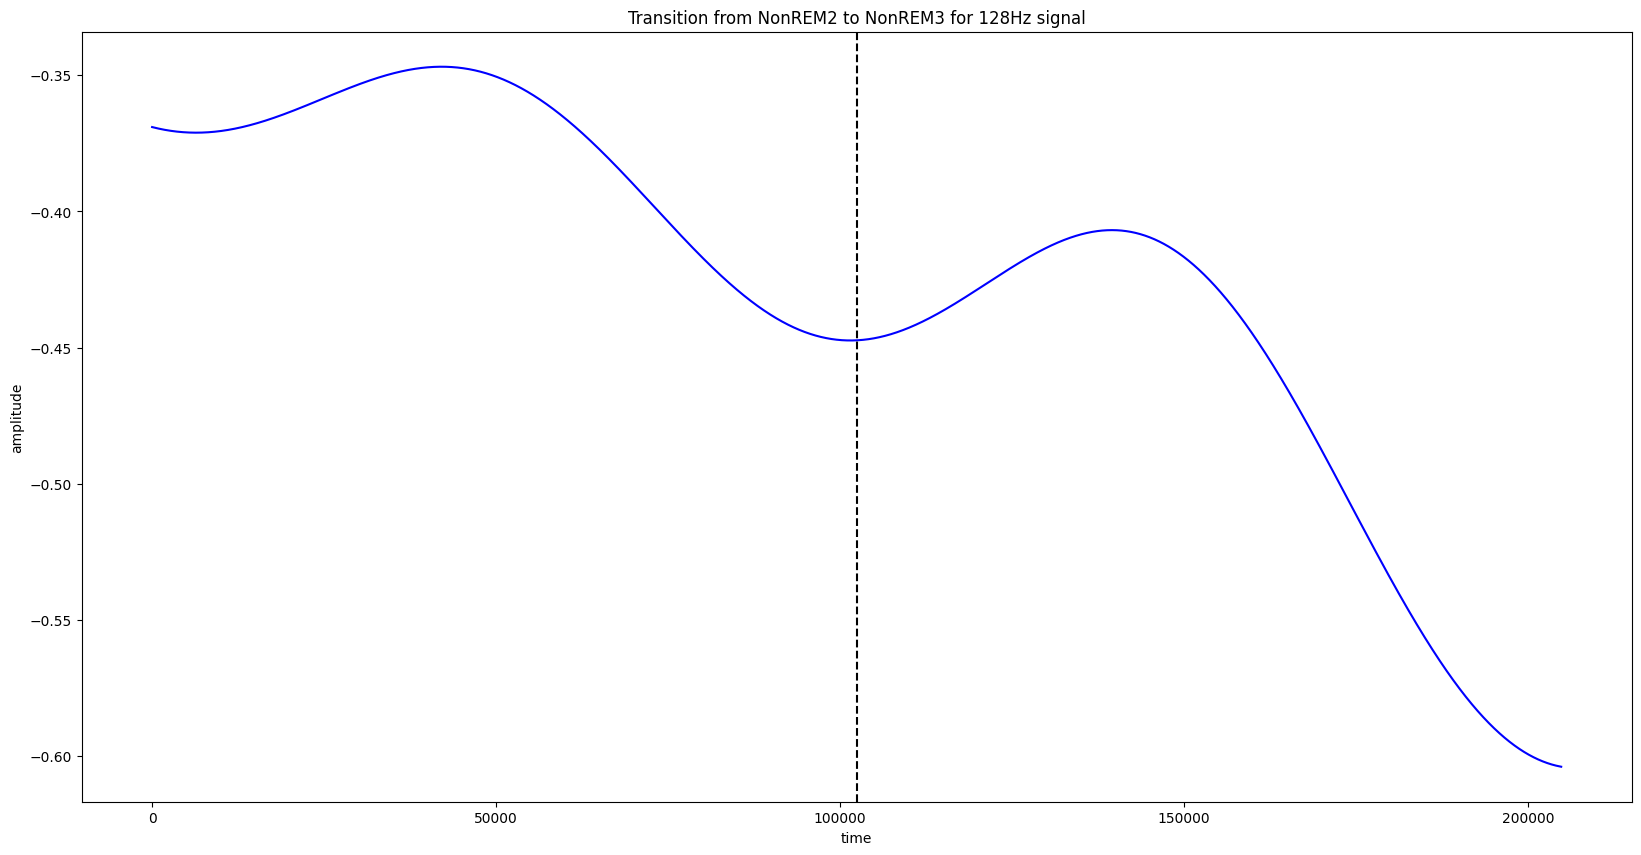

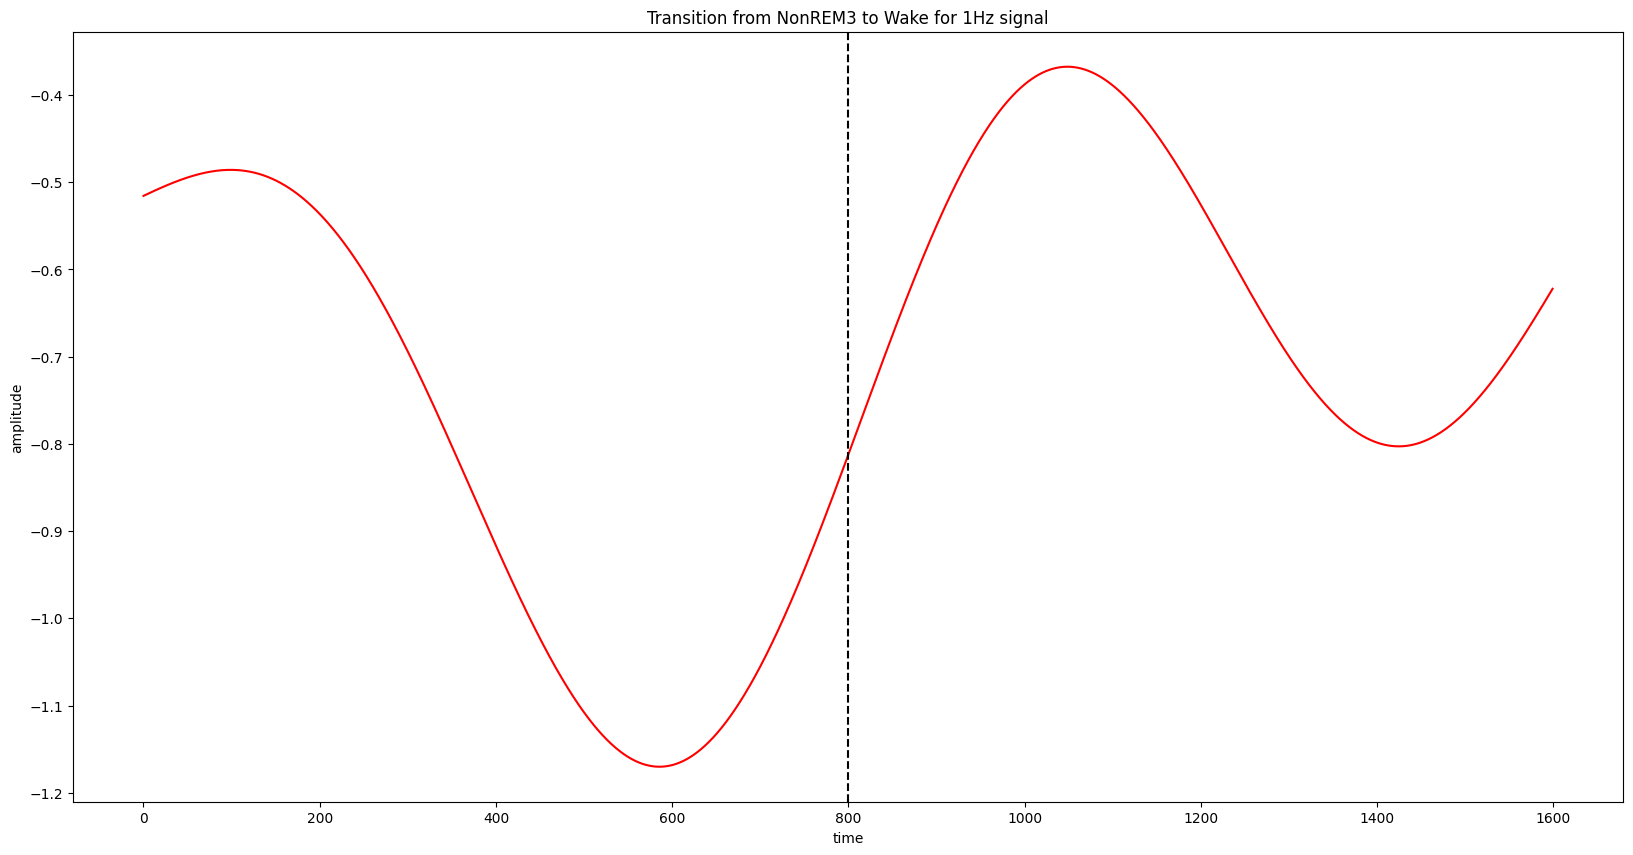

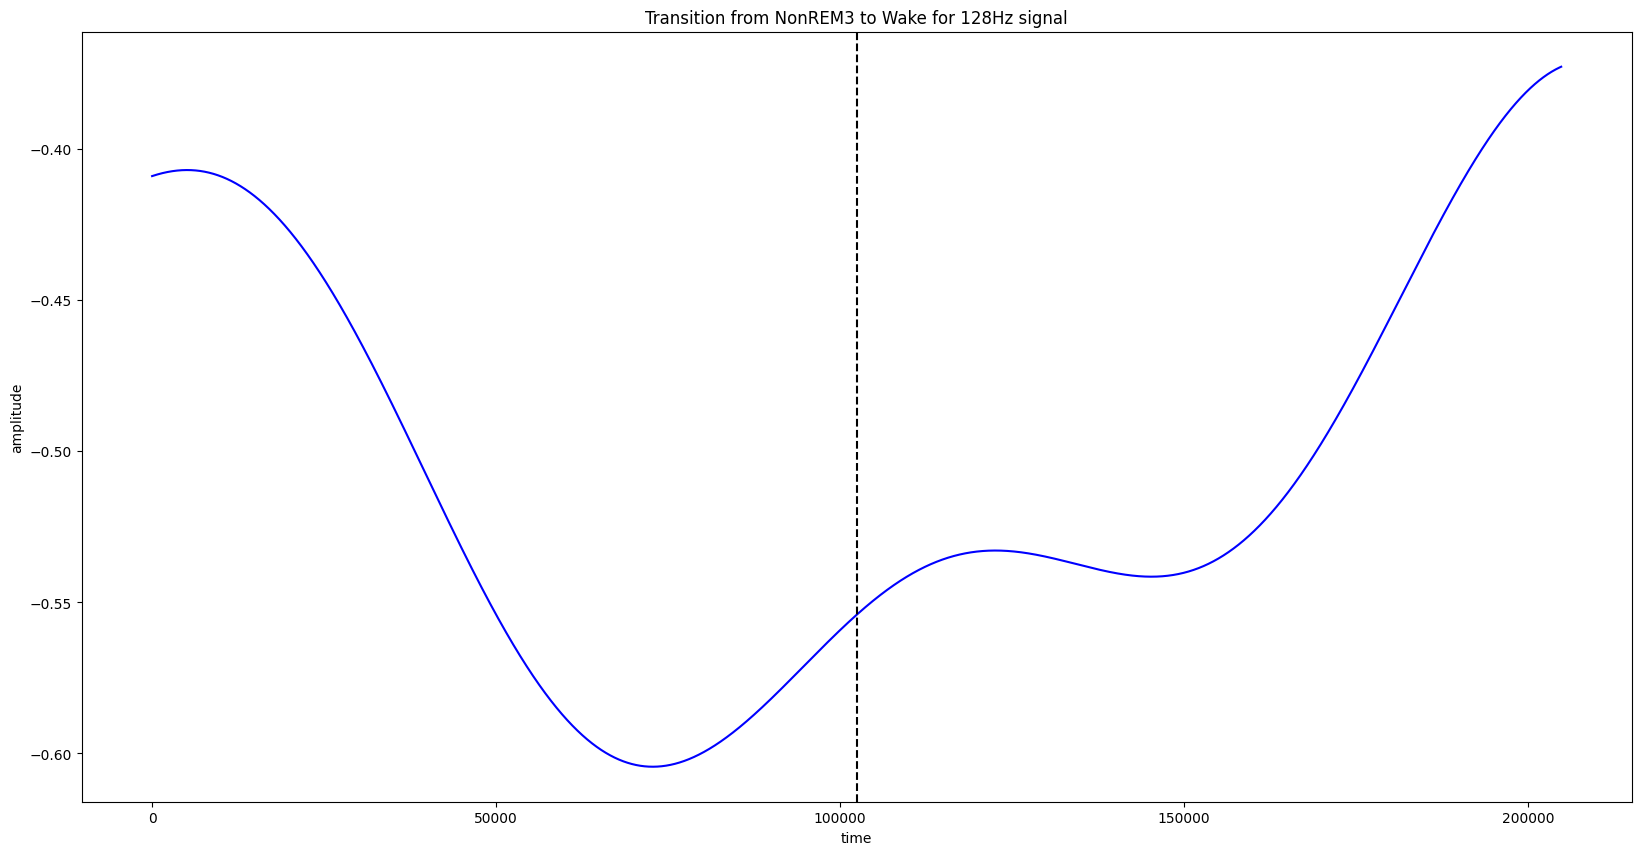

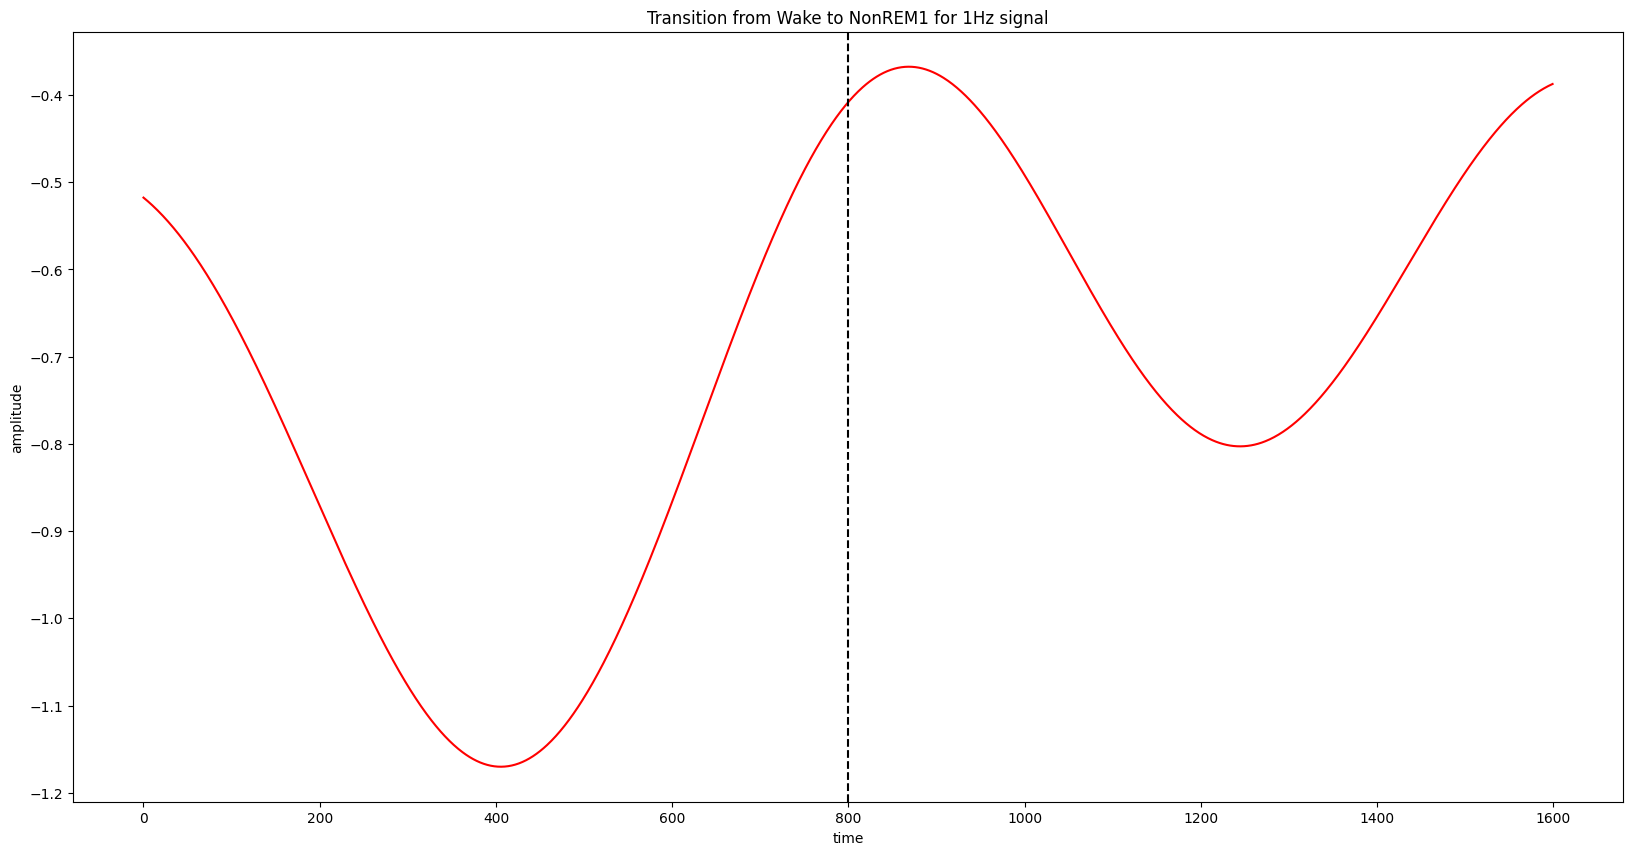

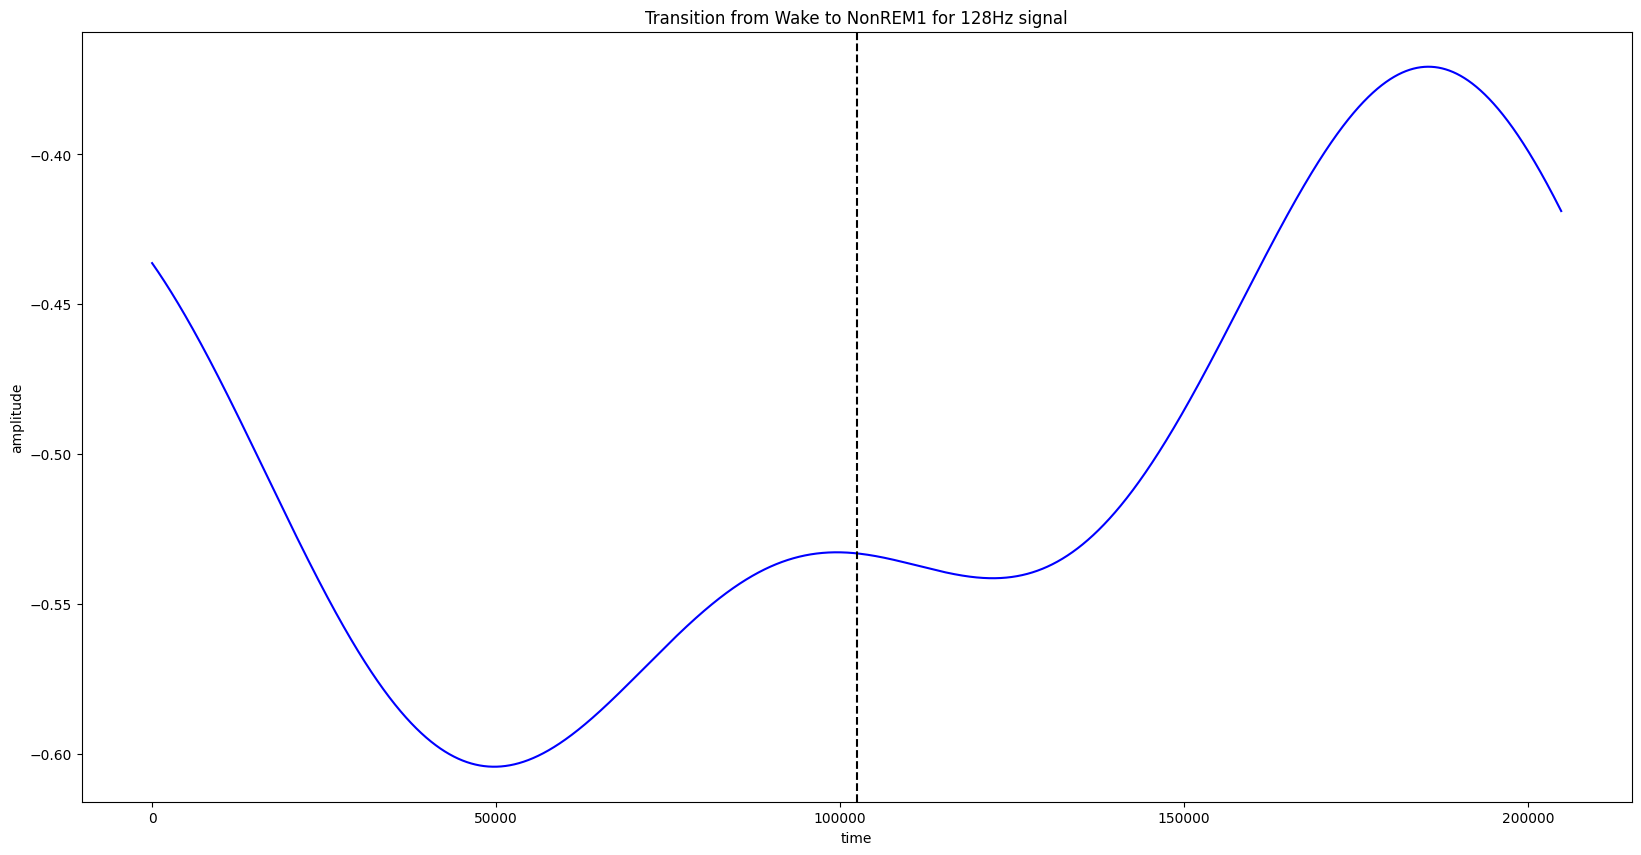

In [29]:
dict_items_mild = iter(times_mild.items())
next(dict_items_mild)
for key, value in itertools.islice(dict_items_mild, 9):
    plot_reconstructed_signal_1hz(reconstructed_fft_1_mild, int(key), value[0], value[1])
    plot_reconstructed_signal_128hz(reconstructed_fft_128_mild, int(key), value[0], value[1])   

In [30]:
from hmmlearn.hmm import GaussianHMM

def train_hmm(signal, states, iterations):
    data = signal.reshape(-1, 1)
    model = GaussianHMM(n_components=states, covariance_type="full", n_iter=iterations, random_state=42)
    model.fit(data)
    hidden_states = model.predict(data)
    return hidden_states    

def plot_hidden_states(hidden_states):
    plt.figure(figsize=(20, 10))
    plt.plot(hidden_states, label='Hidden States', linewidth=1, linestyle='--')   
    plt.title("Hidden states")
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.show()

def plot_signal_hidden_states(signal, hidden_states):
    data = signal.reshape(-1, 1)
    plt.figure(figsize=(20, 10))
    for i in range(data.shape[1]):  
        plt.plot(data[:, i], label=f'Channel {i+1}')
    plt.plot(hidden_states, label='Hidden States', linestyle='--', linewidth=2)  
    plt.title("Signal with Hidden states")
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.show()

def plot_hidden_states_signal_comparison(signal, hidden_states, states):
    data = signal.reshape(-1, 1)
    states = states.to_numpy().reshape(-1, 1)  
    plt.figure(figsize=(20, 10))
    for i in range(data.shape[1]):  
        plt.plot(data[:, i], label=f'Channel {i+1}', linestyle='--', linewidth=2)
    for i in range(states.shape[1]):
        plt.plot(states[:, i], label=f'State {i+1}', color='red', linestyle=':', linewidth=2)
    plt.plot(hidden_states, label='Hidden States', color='blue', linewidth=2)
    plt.title("Signal with Hidden states")
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.legend()
    plt.show()

In [31]:
import pandas as pd

sleep_state_mapping_bi = {
    'Wake': 0,
    'NonREM1': 1,
    'NonREM2': 1,
    'NonREM3': 1,
    'REM': 1,
    'NotScored': 2
}
sleep_state_mapping_penta = {
    'Wake': 0,
    'NonREM1': 1,
    'NonREM2': 2,
    'NonREM3': 3,
    'REM': 4,
    'NotScored': 5
}

def map_penta_states(column, new_column):
    for value in column:
        if value == 'Wake':
            new_column.append(0)
        elif value == 'NonREM1':
            new_column.append(1)    
        elif value == 'NonREM2':
            new_column.append(2)
        elif value == 'NonREM3':
            new_column.append(3)
        elif value == 'REM':
            new_column.append(4)
        else:
            new_column.append(None)

def map_binary_states(column, new_column):
    for value in column:
        if value == 'Wake':
            new_column.append(0)
        elif value == 'NonREM1':
            new_column.append(1)    
        elif value == 'NonREM2':
            new_column.append(1)
        elif value == 'NonREM3':
            new_column.append(1)
        elif value == 'REM':
            new_column.append(1)
        else:
            new_column.append(None)
        print(value, new_column[-1])

temp_values = []
file_path_mild_csv = 'C:\\Users\\anany\\Desktop\\OSA\\mild_csvs\\EEG O1-A2.csv'
file_path_severe_csv = 'C:\\Users\\anany\\Desktop\\OSA\\severe_csvs\\EEG O1-A2.csv'

df_mild = pd.read_csv(file_path_mild_csv) 
# df_mild['user staging bi'] = df_mild['user sleep stage'].map(sleep_state_mapping_bi)
# df_mild['user staging penta'] = df_mild['user sleep stage'].map(sleep_state_mapping_penta)
map_binary_states(df_mild['user sleep stage'], temp_values)
df_mild['user staging bi'] = temp_values
temp_values = []
map_penta_states(df_mild['user sleep stage'], temp_values)
df_mild['user staging penta'] = temp_values

df_severe = pd.read_csv(file_path_severe_csv)
temp_values = []
map_binary_states(df_severe['user sleep stage'], temp_values)
df_severe['user staging bi'] = temp_values
temp_values = []
map_penta_states(df_severe['user sleep stage'], temp_values)
df_severe['user staging penta'] = temp_values
print(df_mild['user staging bi'])
# df_severe['user staging bi'] = df_severe['user sleep stage'].map(sleep_state_mapping_bi)
# df_severe['user staging penta'] = df_severe['user sleep stage'].map(sleep_state_mapping_penta)

Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0
Wake 0

In [32]:
print(len(df_severe['user staging bi']))

36000


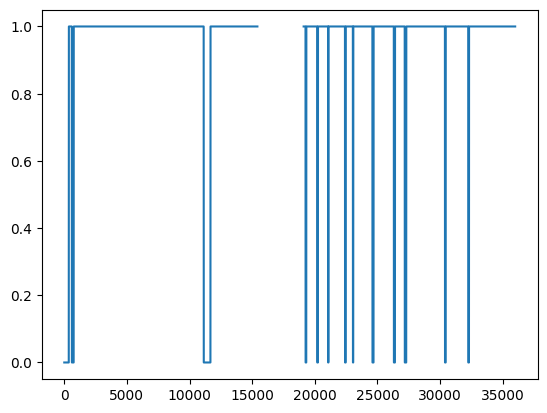

In [33]:
plt.plot(df_severe['user staging bi'])

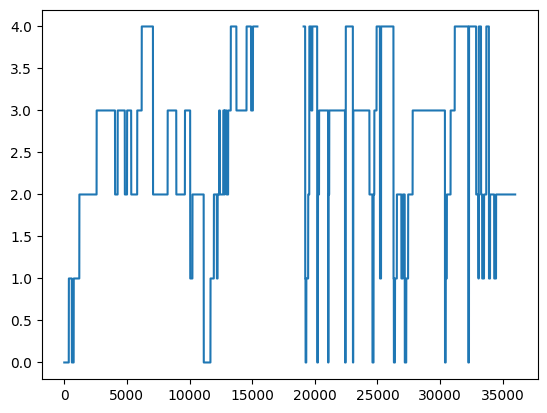

In [34]:
plt.plot(df_severe['user staging penta'])

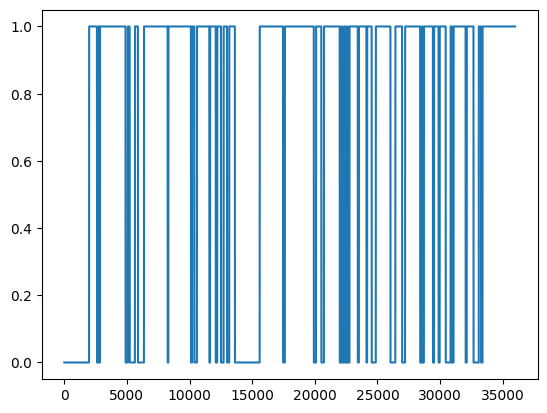

In [35]:
plt.plot(df_mild['user staging bi'])

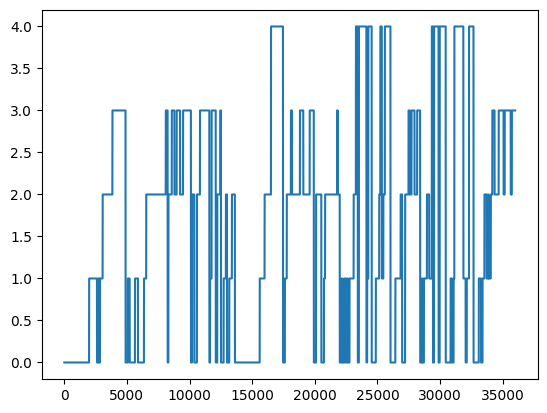

In [36]:
plt.plot(df_mild['user staging penta'])

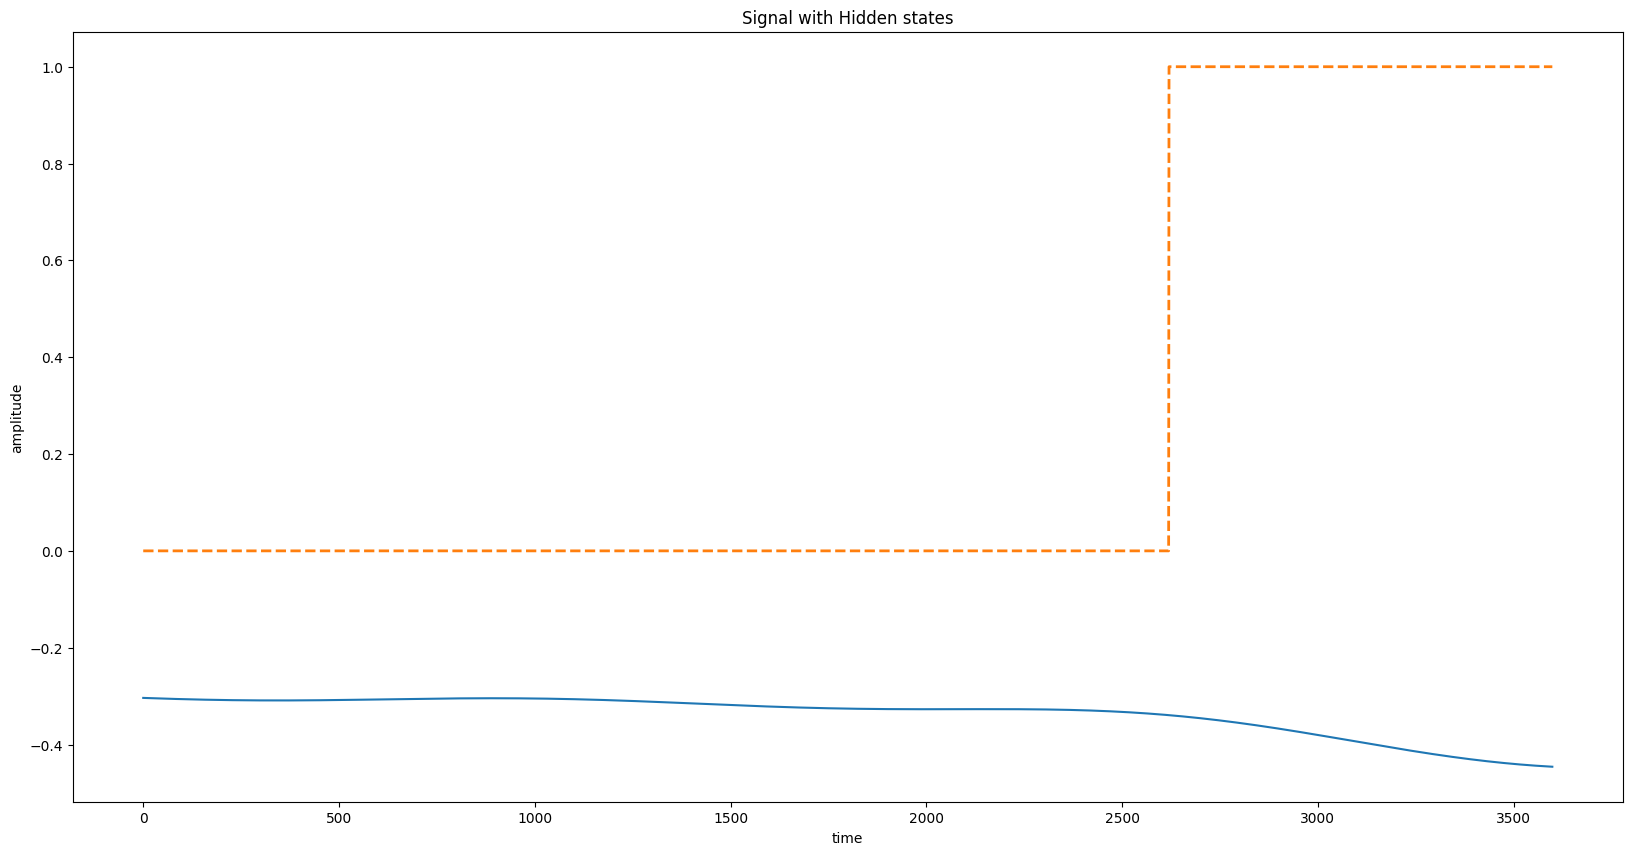

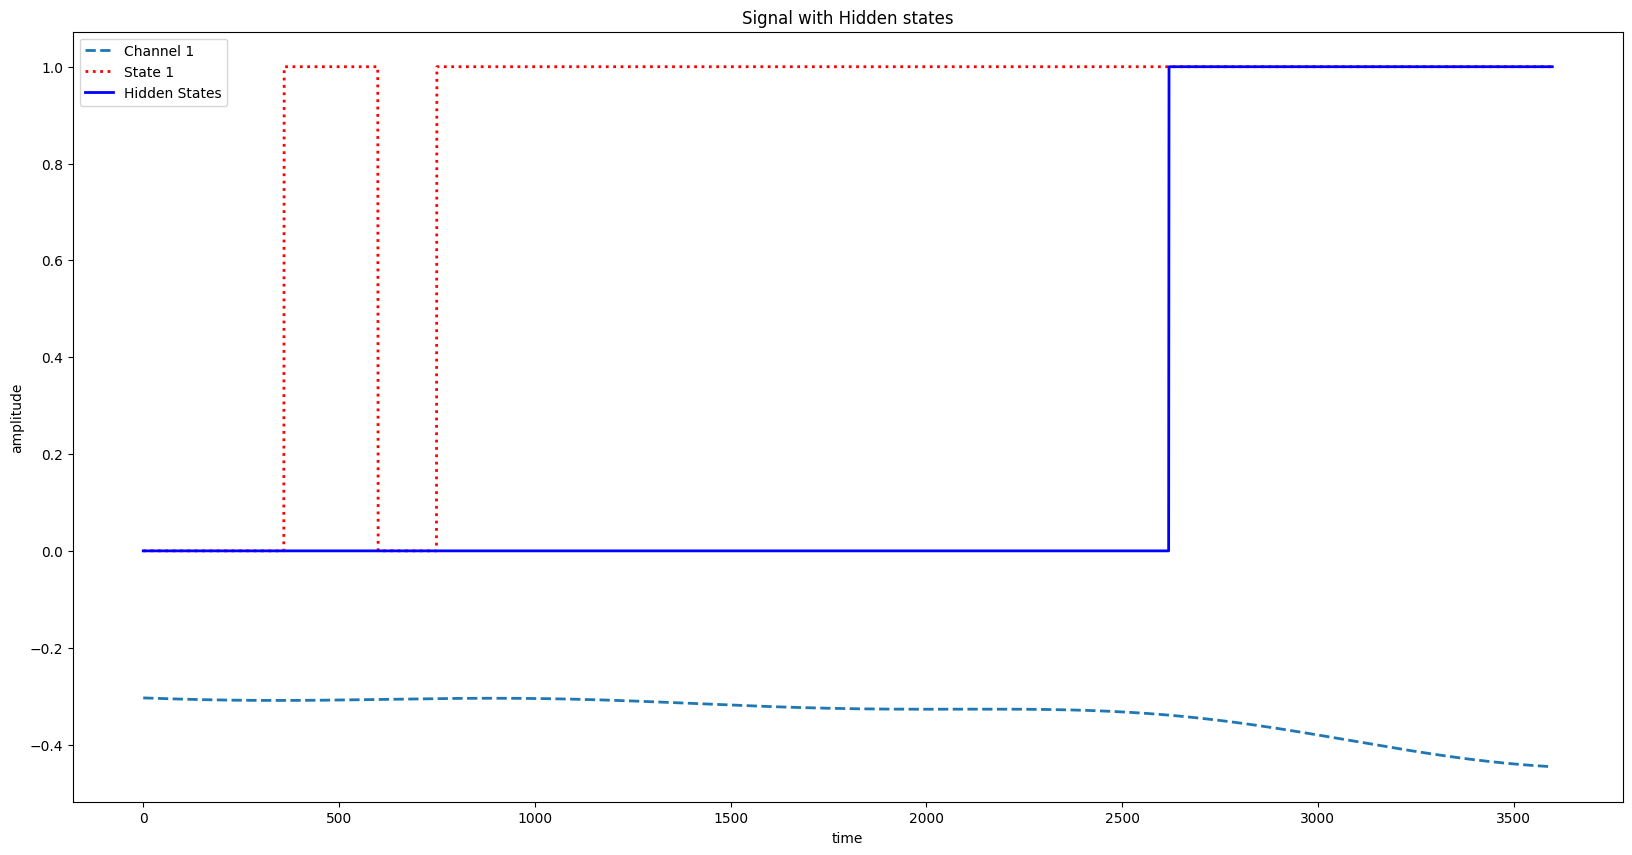

In [37]:
hidden_states_severe_1 = train_hmm(reconstructed_fft_1[0:3600], 2, 1000)
plot_signal_hidden_states(reconstructed_fft_1[0:3600], hidden_states_severe_1)
plot_hidden_states_signal_comparison(reconstructed_fft_1[0:3600], hidden_states_severe_1, df_severe['user staging bi'][0:3600])

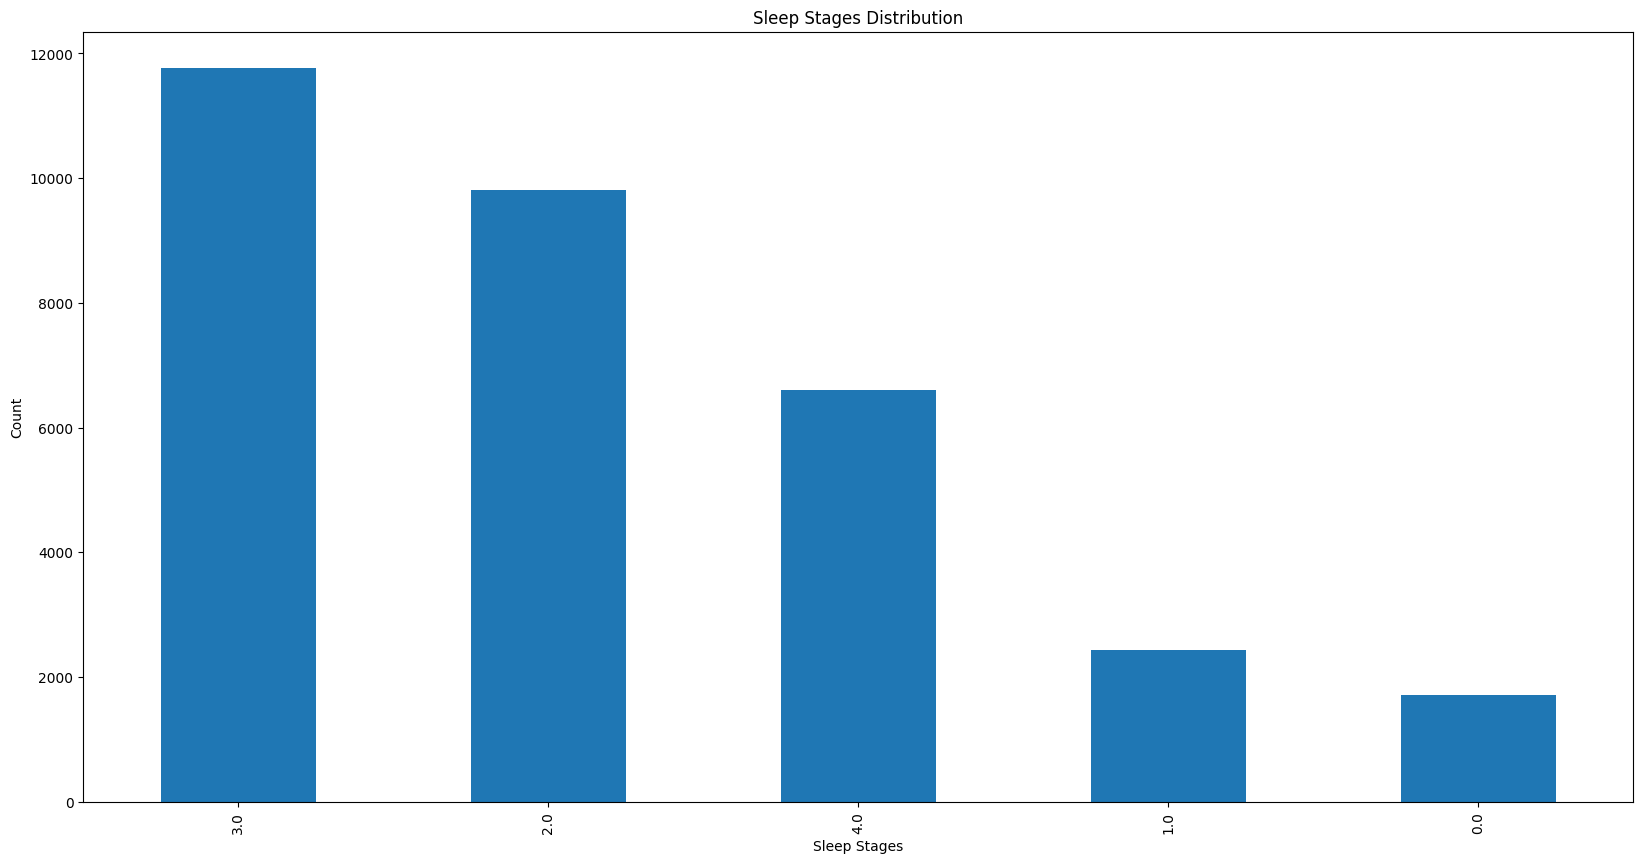

In [38]:
value_counts = df_severe['user staging penta'].value_counts()
plt.figure(figsize=(20, 10))
value_counts.plot(kind='bar')
plt.title("Sleep Stages Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("Count")
plt.show()

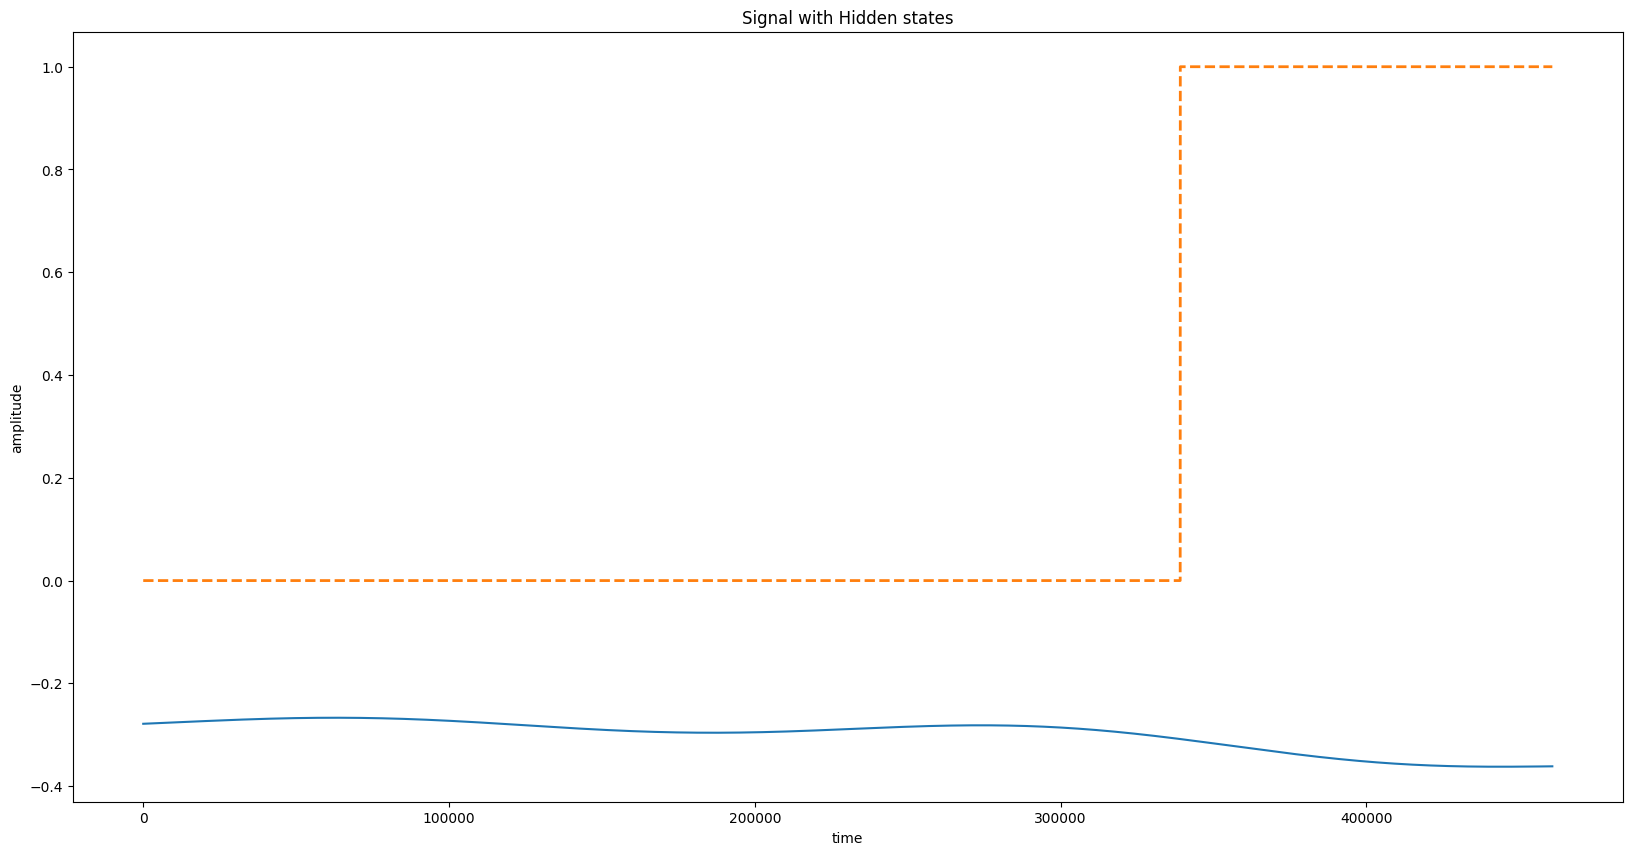

In [39]:
hidden_states_severe_128 = train_hmm(reconstructed_fft_128[0:3600*128], 2, 1000)
plot_signal_hidden_states(reconstructed_fft_128[0:3600*128], hidden_states_severe_128)
# plot_hidden_states_signal_comparison(reconstructed_fft_128[0:3600*128], hidden_states_severe_128, df_severe['user staging bi'][0:3600])

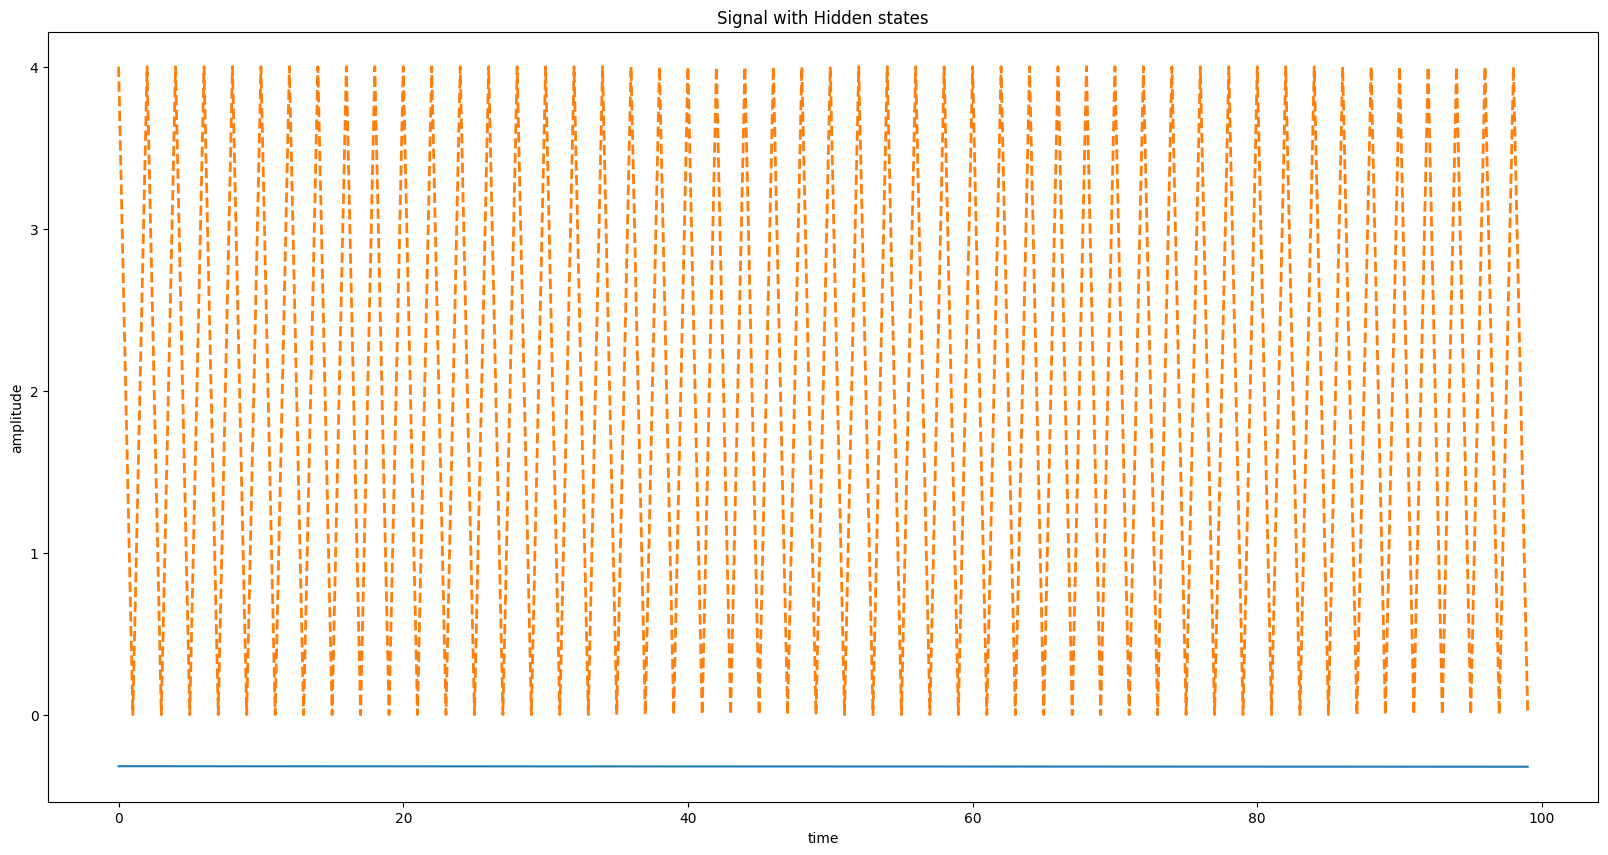

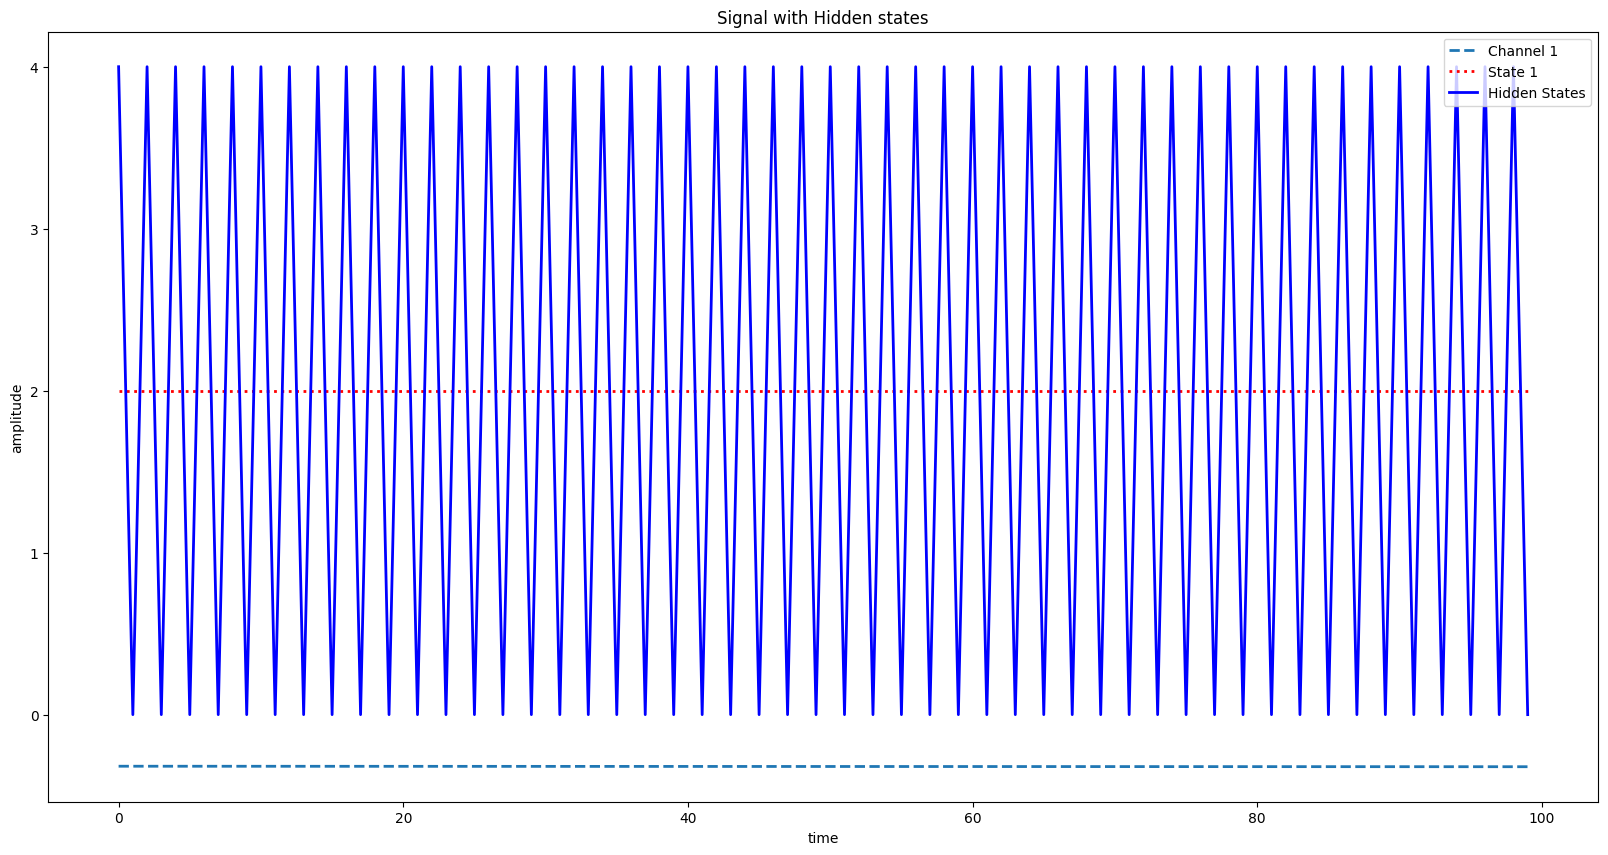

In [40]:
hidden_states_severe_1_five = train_hmm(reconstructed_fft_1[0:3600], 5, 1000)
# print(hidden_states_severe_1_five[1500:1600])
plot_signal_hidden_states(reconstructed_fft_1[1500:1600], hidden_states_severe_1_five[1500:1600])
plot_hidden_states_signal_comparison(reconstructed_fft_1[1500:1600], hidden_states_severe_1_five[1500:1600], df_severe['user staging penta'][1500:1600])

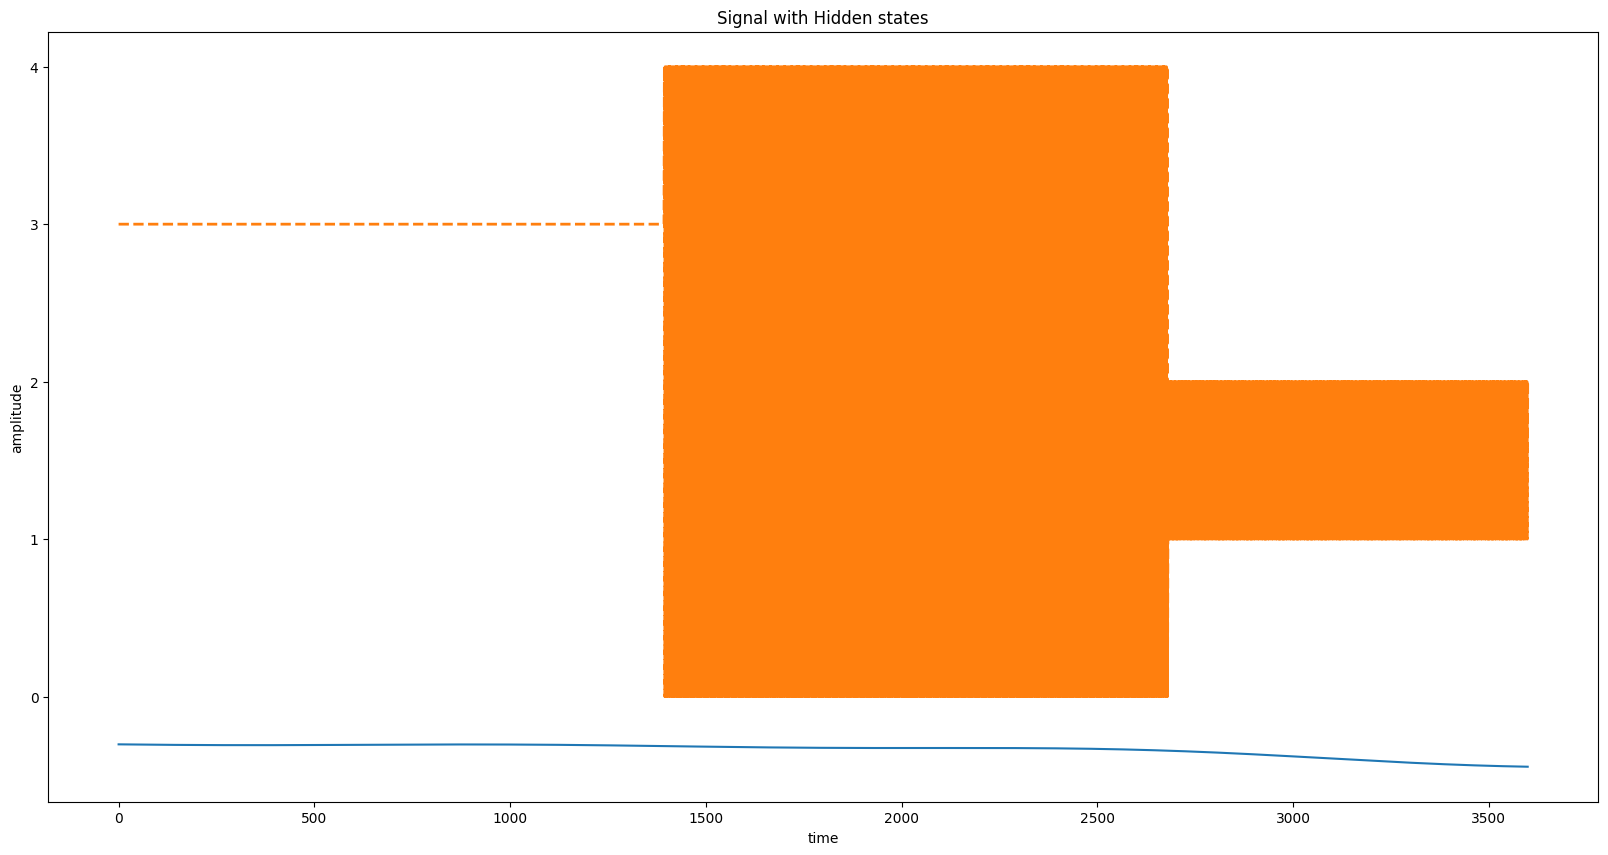

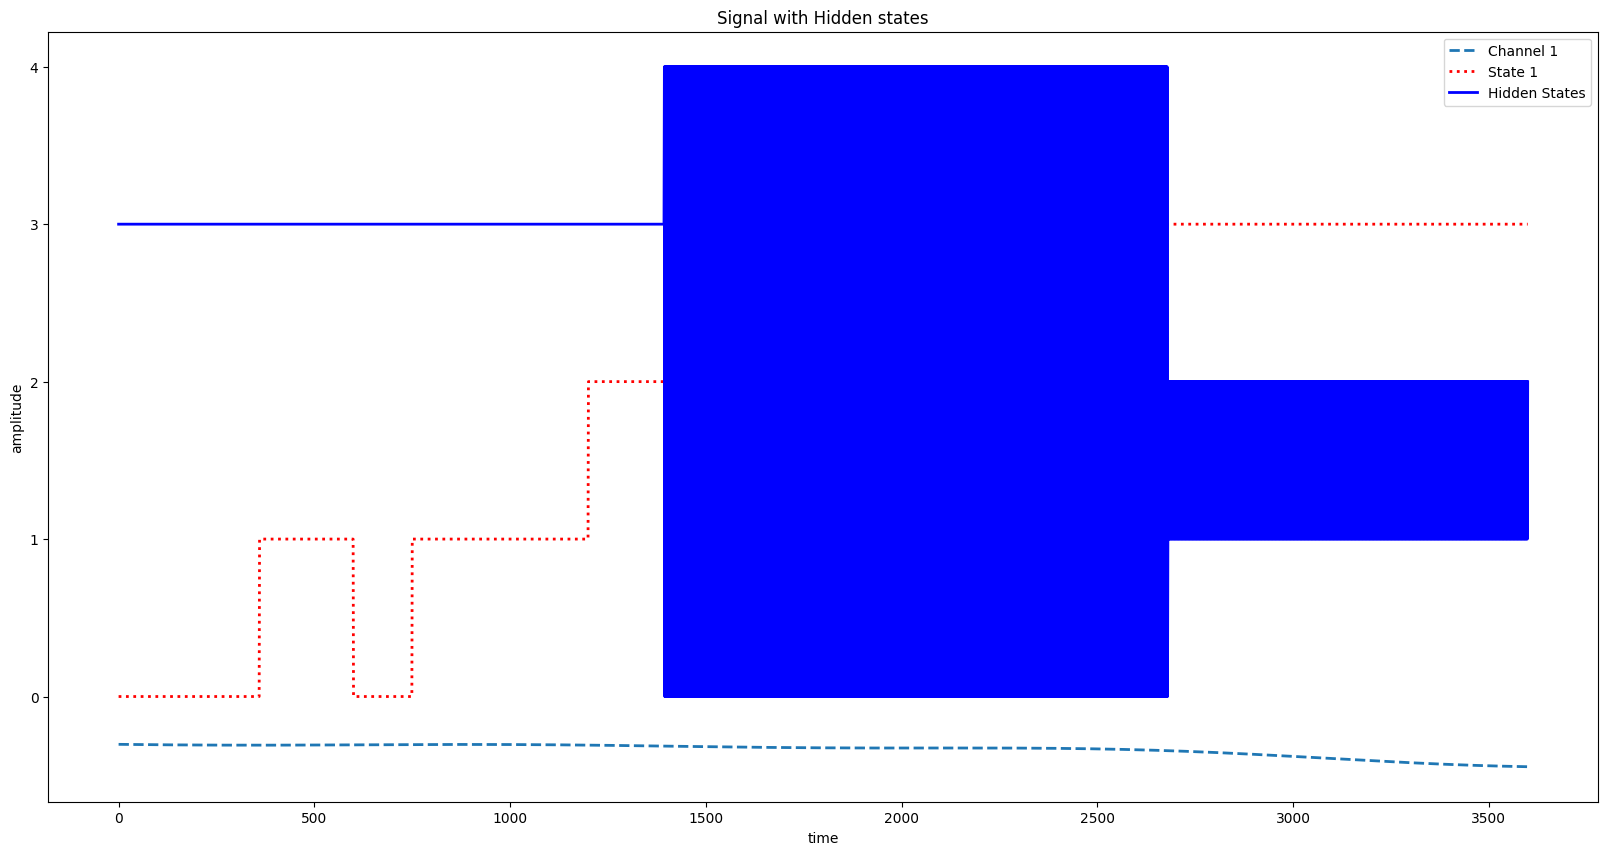

In [41]:
plot_signal_hidden_states(reconstructed_fft_1[0:3600], hidden_states_severe_1_five[0:3600])
plot_hidden_states_signal_comparison(reconstructed_fft_1[0:3600], hidden_states_severe_1_five[0:3600], df_severe['user staging penta'][0:3600])

# WEEK 15

In [42]:
def make_reconstructed_fft(signal, sampling_rate):
    window = windows.hann(len(signal))
    windowed_signal = signal * window
    fft_result = np.fft.fft(signal)
    freq = np.fft.fftfreq(len(signal), 1/sampling_rate)
    magnitude_spectrum = np.abs(fft_result)
    fft_filtered = np.copy(fft_result)
    fft_filtered[5:] = 0
    reconstructed_fft = np.fft.ifft(fft_filtered).real
    return reconstructed_fft

def get_fft_coefficients(signal, sampling_rate):
    window = windows.hann(len(signal))
    windowed_signal = signal * window
    fft_result = np.fft.fft(windowed_signal)
    freq = np.fft.fftfreq(len(windowed_signal), 1/sampling_rate)
    magnitude_spectrum = np.abs(fft_result)
    return fft_result, freq, magnitude_spectrum

## Violin plot analysis of sleep and wake states

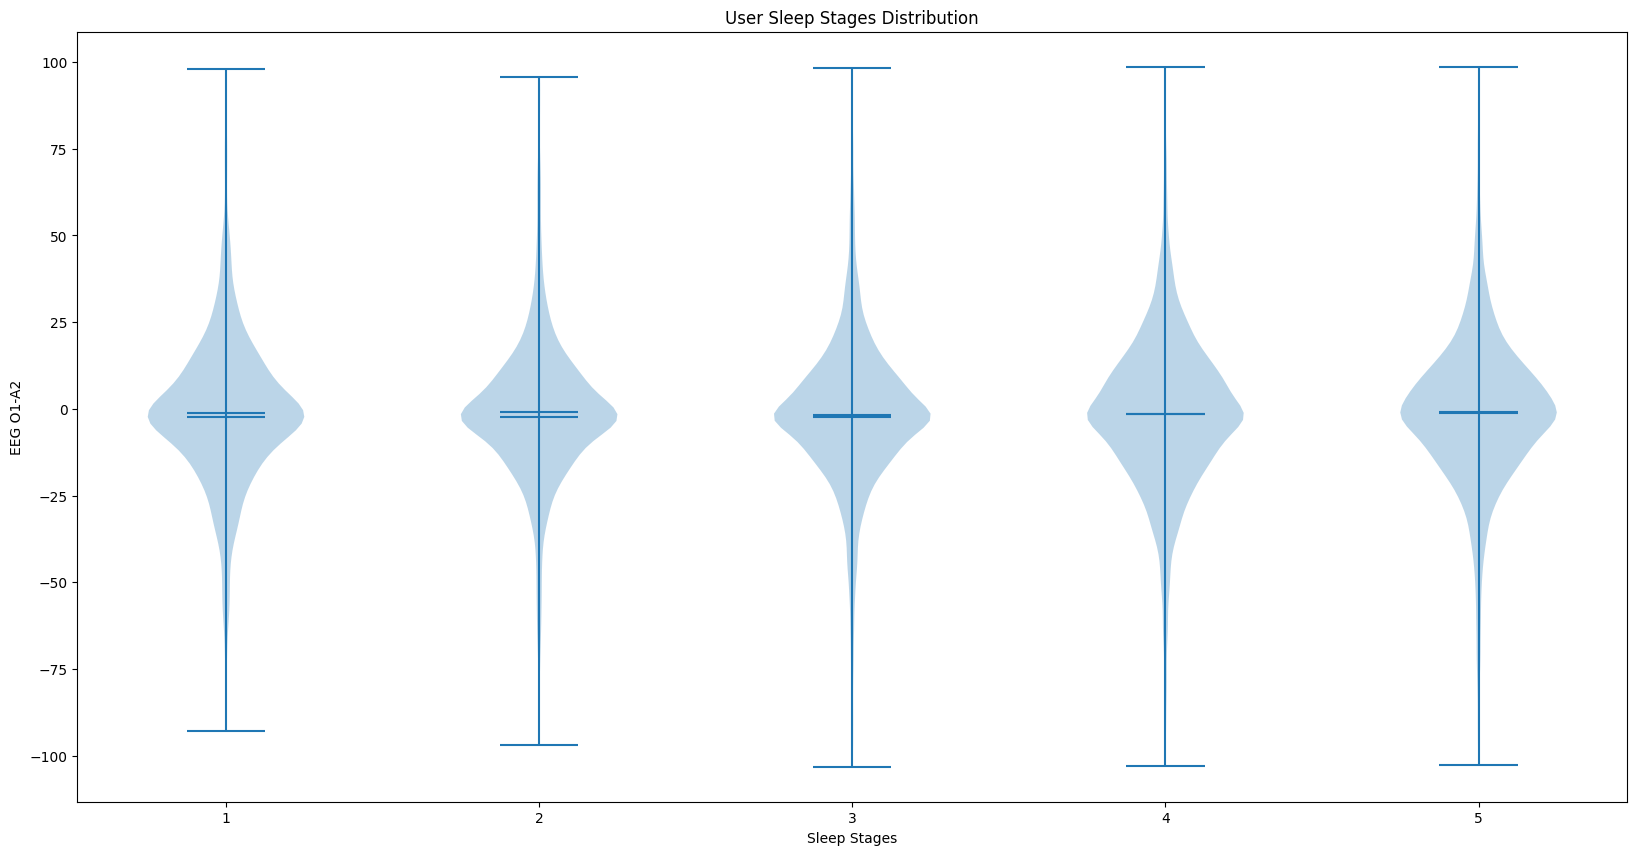

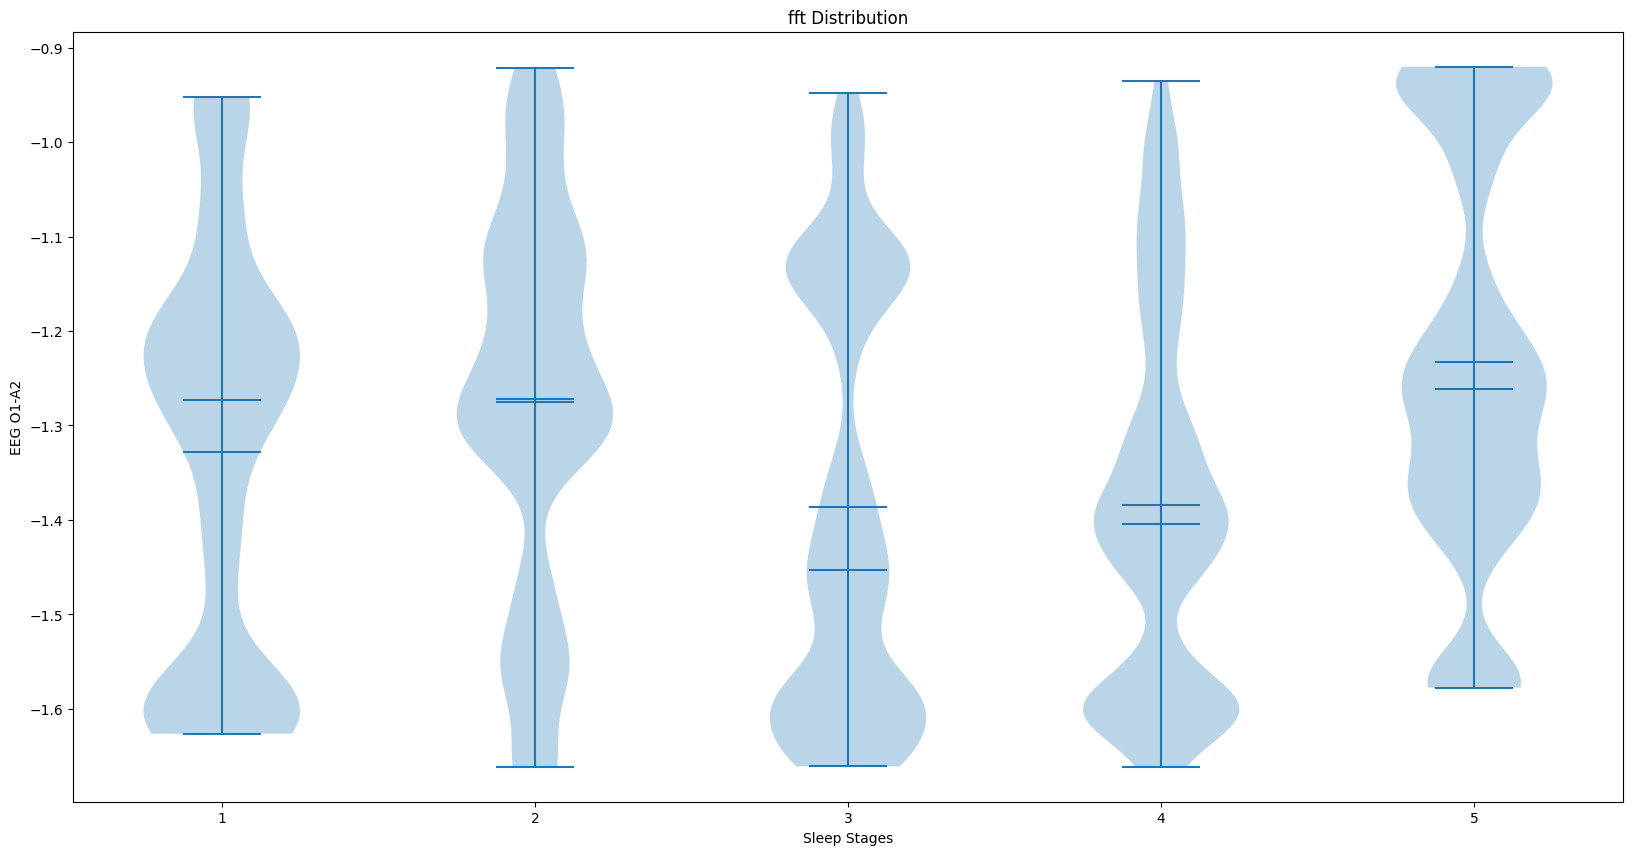

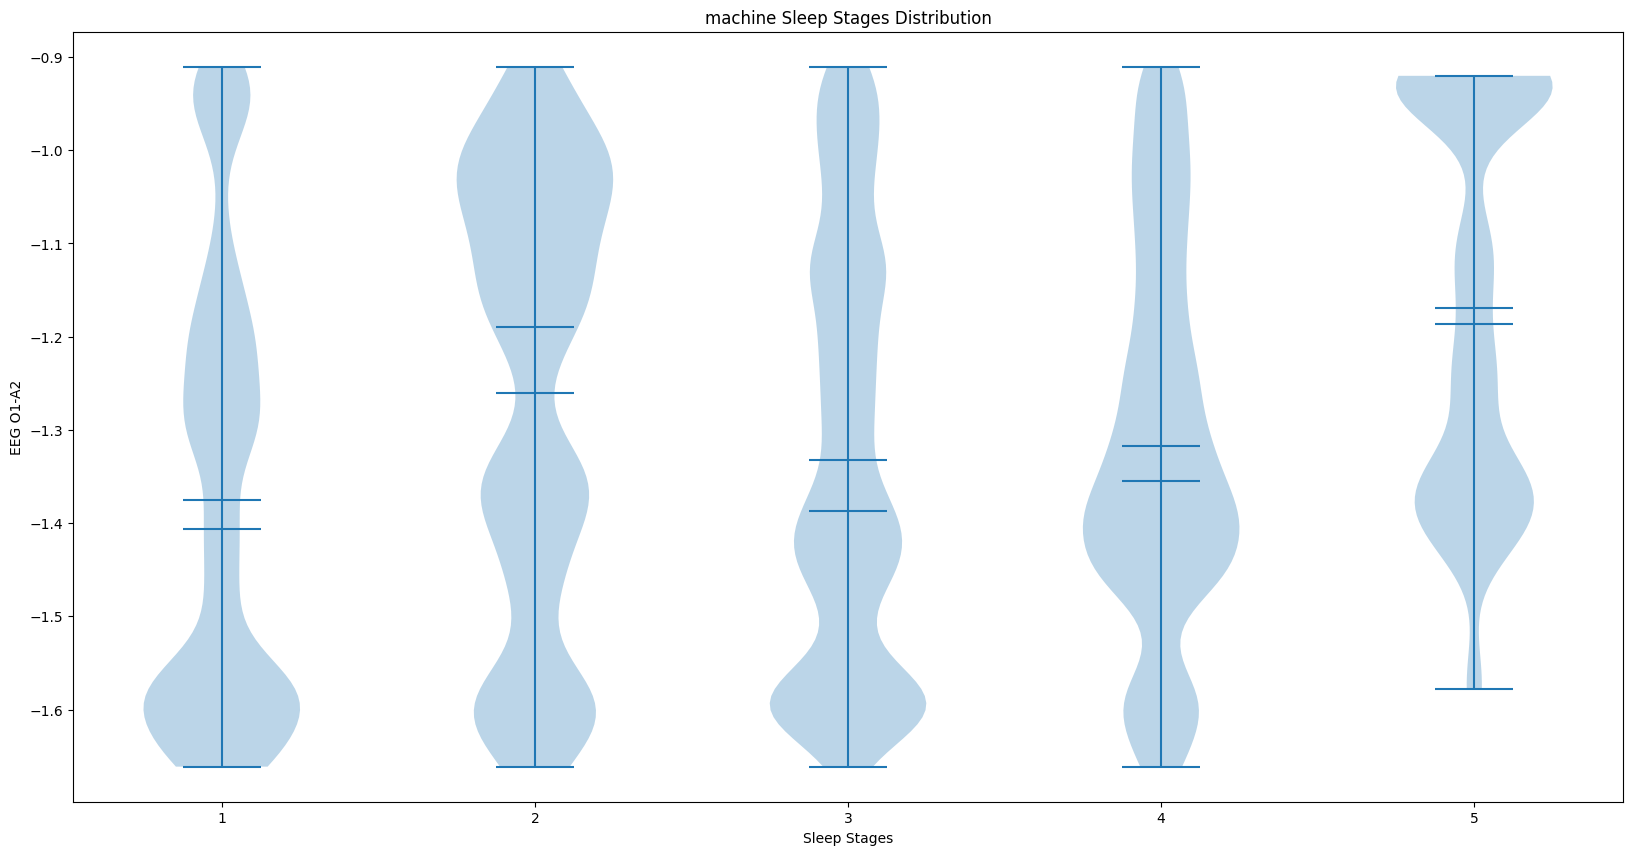

In [43]:
severe_EEGO1A2 = pd.read_csv('C:\\Users\\anany\\Desktop\\OSA\\severe_csvs\\EEG O1-A2.csv')
reconstructed_eeg_sev_1hz = make_reconstructed_fft(severe_EEGO1A2['signal'], 1)
reconstructed_eeg_sev_1hz = np.append(reconstructed_eeg_sev_1hz, np.zeros(36000 - len(reconstructed_eeg_sev_1hz)))
severe_EEGO1A2['fft_1'] = reconstructed_eeg_sev_1hz

user_wake = severe_EEGO1A2[severe_EEGO1A2['user sleep stage'] == 'Wake']
user_nonrem1 = severe_EEGO1A2[severe_EEGO1A2['user sleep stage'] == 'NonREM1']
user_nonrem2 = severe_EEGO1A2[severe_EEGO1A2['user sleep stage'] == 'NonREM2']
user_nonrem3 = severe_EEGO1A2[severe_EEGO1A2['user sleep stage'] == 'NonREM3']
user_rem = severe_EEGO1A2[severe_EEGO1A2['user sleep stage'] == 'REM']

machine_wake = severe_EEGO1A2[severe_EEGO1A2['machine sleep stage'] == 'Wake']
machine_nonrem1 = severe_EEGO1A2[severe_EEGO1A2['machine sleep stage'] == 'NonREM1']
machine_nonrem2 = severe_EEGO1A2[severe_EEGO1A2['machine sleep stage'] == 'NonREM2']
machine_nonrem3 = severe_EEGO1A2[severe_EEGO1A2['machine sleep stage'] == 'NonREM3']
machine_rem = severe_EEGO1A2[severe_EEGO1A2['machine sleep stage'] == 'REM']

plt.figure(figsize=(20, 10))
plt.violinplot([user_wake['signal'], user_nonrem1['signal'], user_nonrem2['signal'], user_nonrem3['signal'], user_rem['signal']], showmeans=True, showextrema=True, showmedians=True)
plt.title("User Sleep Stages Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("EEG O1-A2")
plt.show()

plt.figure(figsize=(20, 10))
plt.violinplot([user_wake['fft_1'], user_nonrem1['fft_1'], user_nonrem2['fft_1'], user_nonrem3['fft_1'], user_rem['fft_1']], showmeans=True, showextrema=True, showmedians=True)
plt.title("fft Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("EEG O1-A2")
plt.show()

plt.figure(figsize=(20, 10))
plt.violinplot([machine_wake['fft_1'], machine_nonrem1['fft_1'], machine_nonrem2['fft_1'], machine_nonrem3['fft_1'], machine_rem['fft_1']], showmeans=True, showextrema=True, showmedians=True)
plt.title("machine Sleep Stages Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("EEG O1-A2")
plt.show()

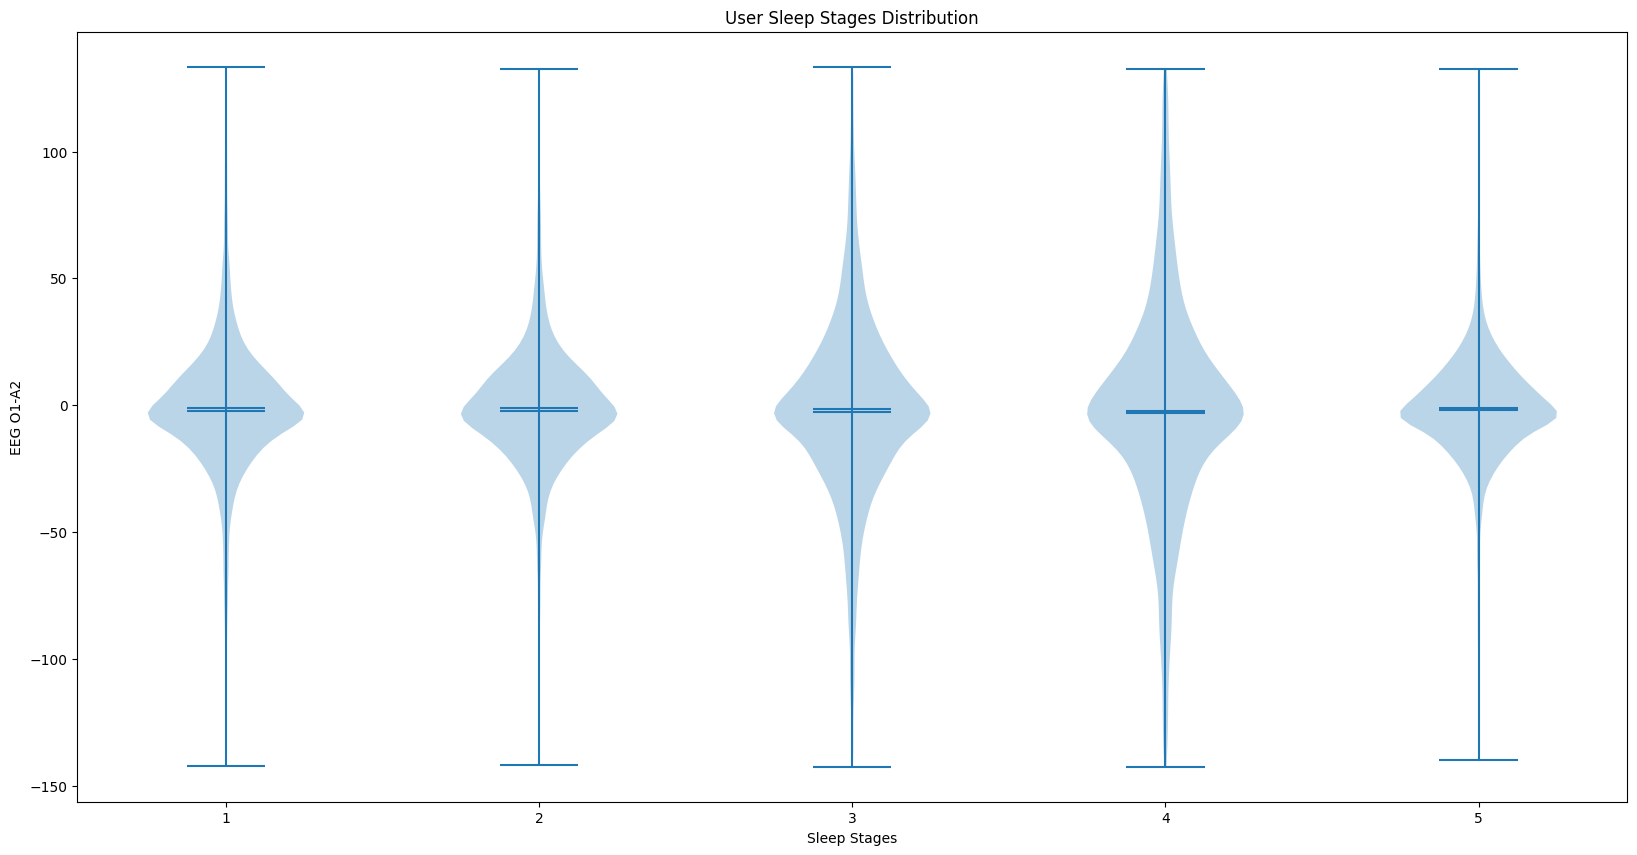

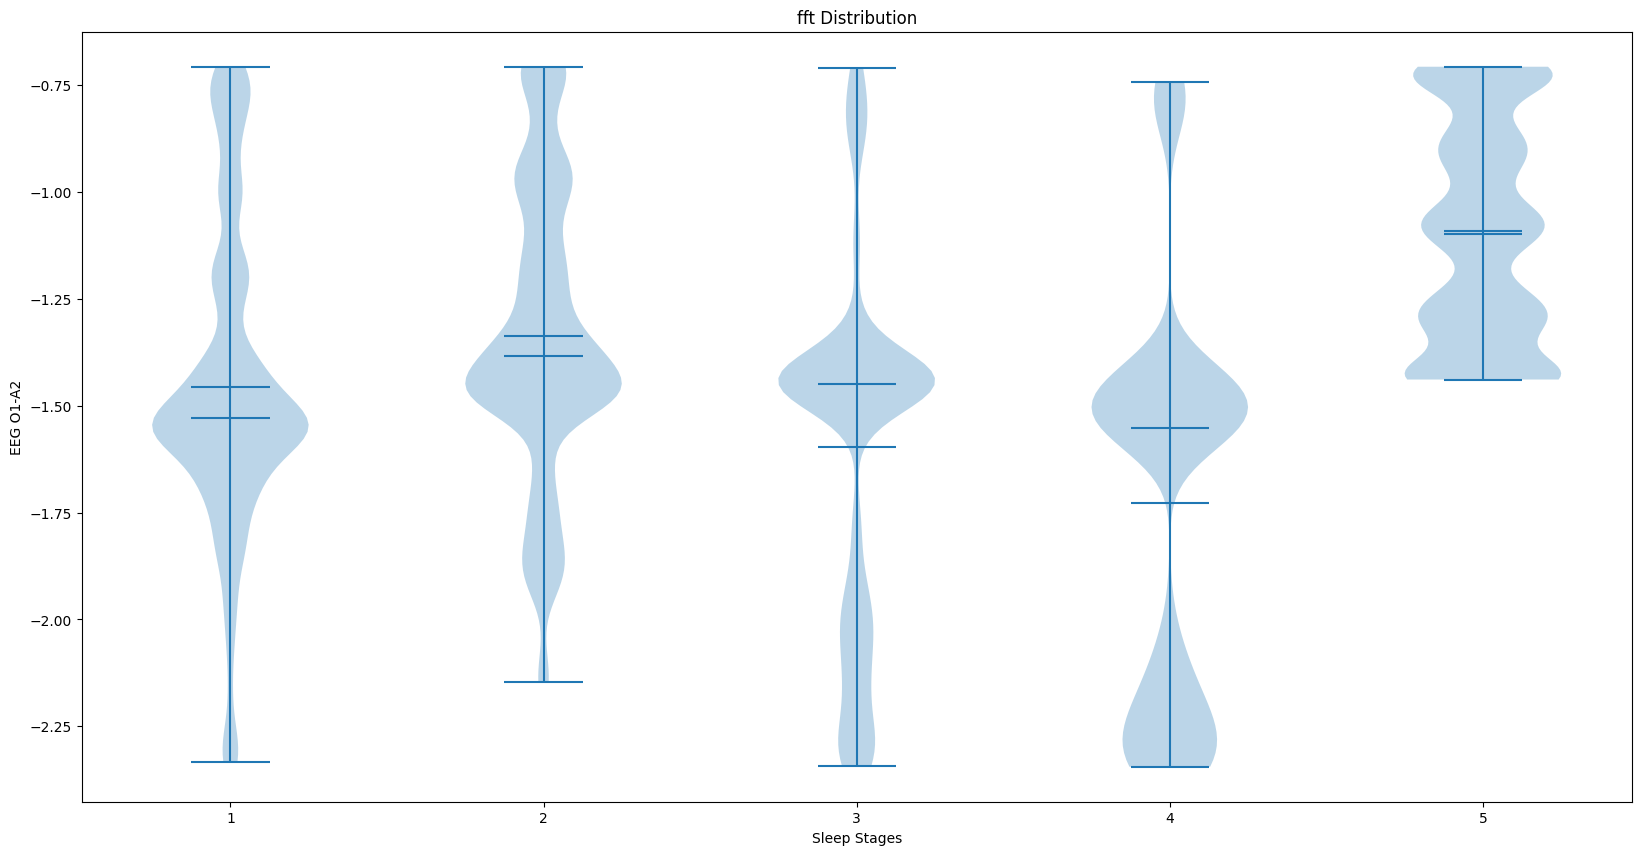

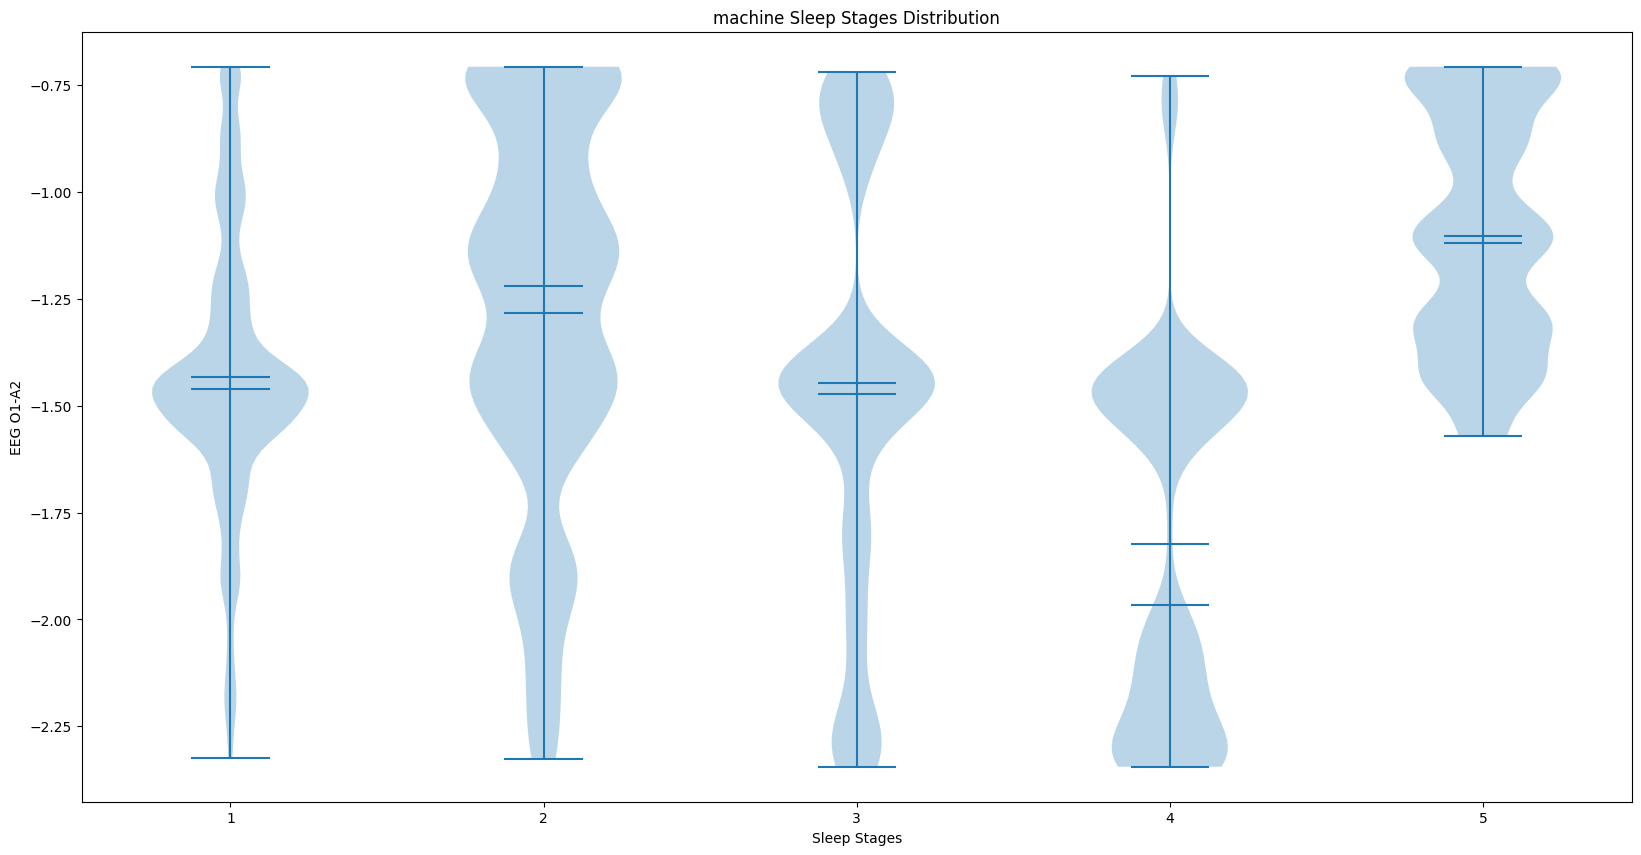

In [44]:
import pandas as pd

mild_EEGO1A2 = pd.read_csv('C:\\Users\\anany\\Desktop\\OSA\\mild_csvs\\EEG O1-A2.csv')
reconstructed_eeg_mild_1hz = make_reconstructed_fft(mild_EEGO1A2['signal'], 1)
reconstructed_eeg_mild_1hz = np.append(reconstructed_eeg_mild_1hz, np.zeros(36000 - len(reconstructed_eeg_mild_1hz)))
mild_EEGO1A2['fft_1'] = reconstructed_eeg_mild_1hz

user_wake = mild_EEGO1A2[mild_EEGO1A2['user sleep stage'] == 'Wake']
user_nonrem1 = mild_EEGO1A2[mild_EEGO1A2['user sleep stage'] == 'NonREM1']
user_nonrem2 = mild_EEGO1A2[mild_EEGO1A2['user sleep stage'] == 'NonREM2']
user_nonrem3 = mild_EEGO1A2[mild_EEGO1A2['user sleep stage'] == 'NonREM3']
user_rem = mild_EEGO1A2[mild_EEGO1A2['user sleep stage'] == 'REM']

machine_wake = mild_EEGO1A2[mild_EEGO1A2['machine sleep stage'] == 'Wake']
machine_nonrem1 = mild_EEGO1A2[mild_EEGO1A2['machine sleep stage'] == 'NonREM1']
machine_nonrem2 = mild_EEGO1A2[mild_EEGO1A2['machine sleep stage'] == 'NonREM2']
machine_nonrem3 = mild_EEGO1A2[mild_EEGO1A2['machine sleep stage'] == 'NonREM3']
machine_rem = mild_EEGO1A2[mild_EEGO1A2['machine sleep stage'] == 'REM']

plt.figure(figsize=(20, 10))
plt.violinplot([user_wake['signal'], user_nonrem1['signal'], user_nonrem2['signal'], user_nonrem3['signal'], user_rem['signal']], showmeans=True, showextrema=True, showmedians=True)
plt.title("User Sleep Stages Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("EEG O1-A2")
plt.show()

plt.figure(figsize=(20, 10))
plt.violinplot([user_wake['fft_1'], user_nonrem1['fft_1'], user_nonrem2['fft_1'], user_nonrem3['fft_1'], user_rem['fft_1']], showmeans=True, showextrema=True, showmedians=True)
plt.title("fft Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("EEG O1-A2")
plt.show()

plt.figure(figsize=(20, 10))
plt.violinplot([machine_wake['fft_1'], machine_nonrem1['fft_1'], machine_nonrem2['fft_1'], machine_nonrem3['fft_1'], machine_rem['fft_1']], showmeans=True, showextrema=True, showmedians=True)
plt.title("machine Sleep Stages Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("EEG O1-A2")
plt.show()

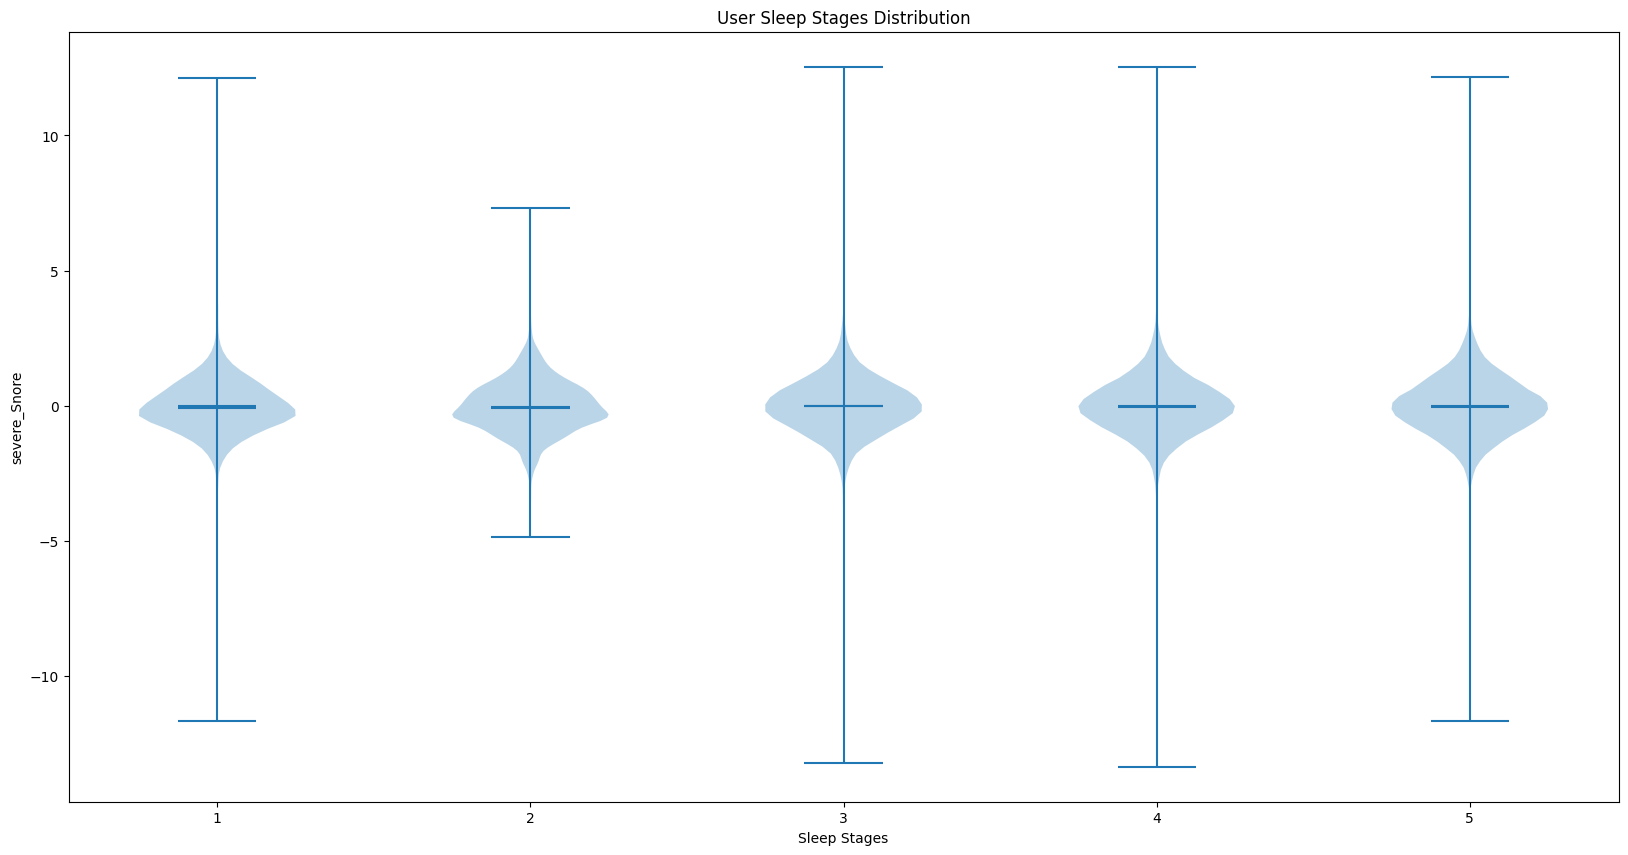

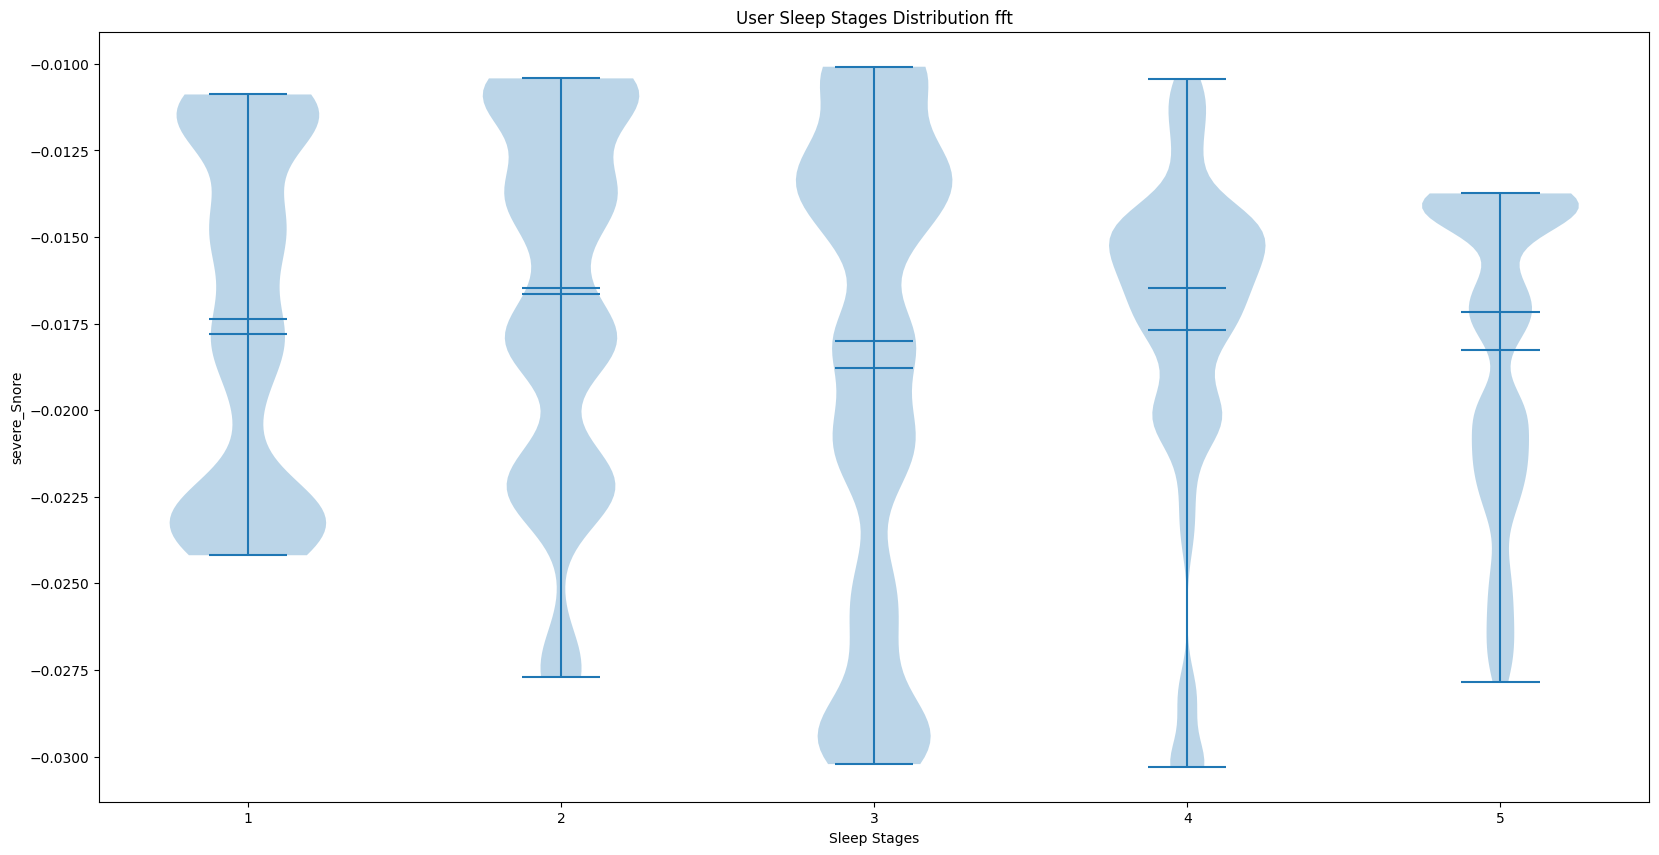

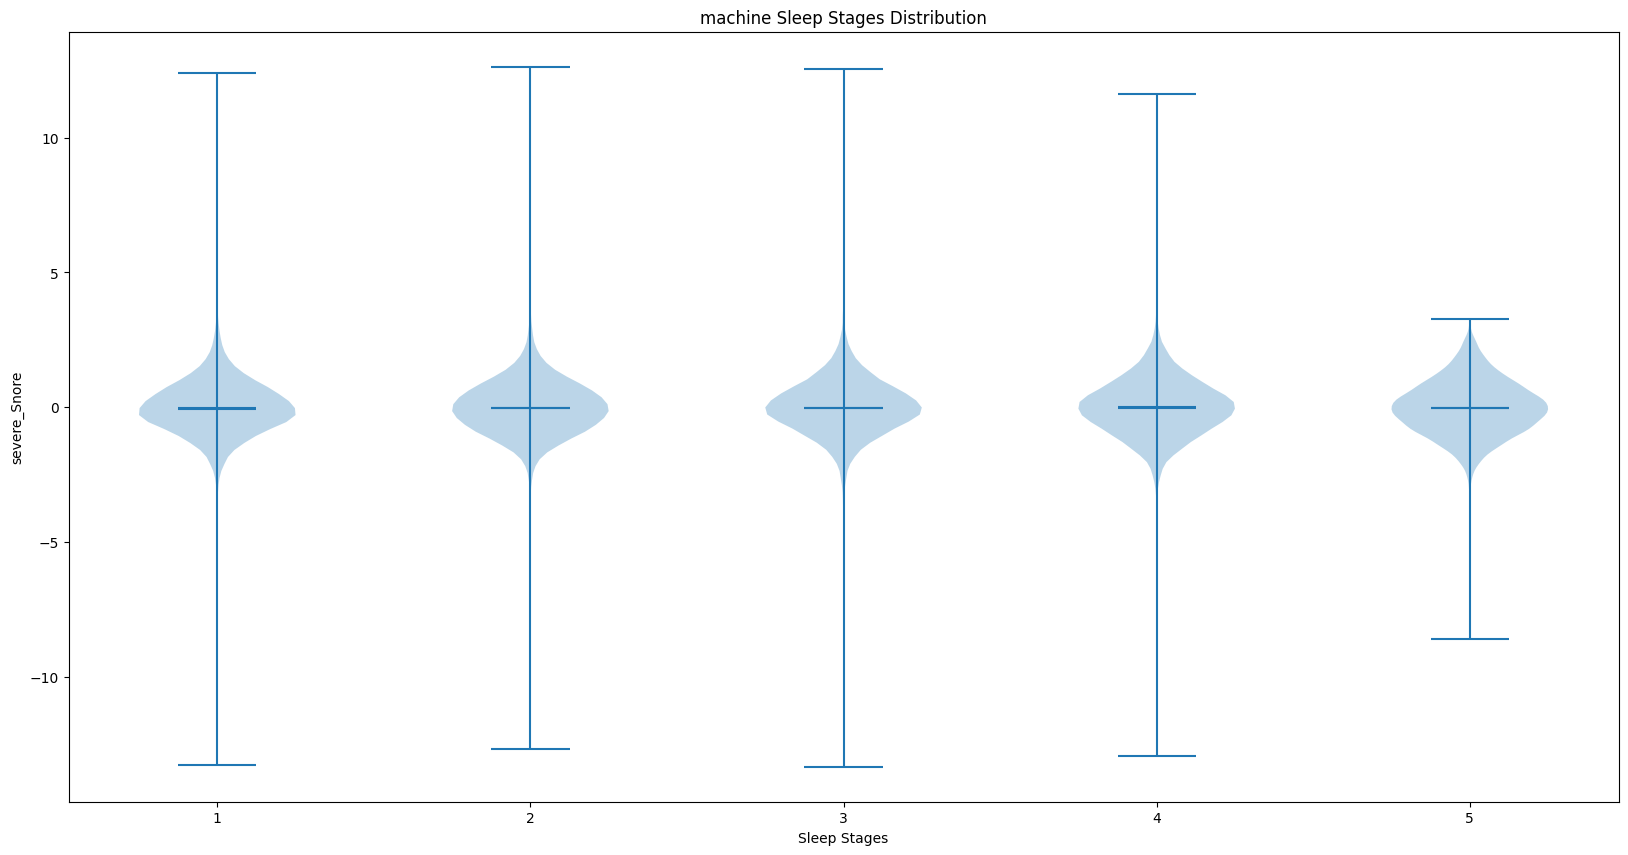

In [45]:
severe_snore = pd.read_csv('C:\\Users\\anany\\Desktop\\OSA\\severe_csvs\\Snore.csv')
reconstructed_severe_snore_sev_1hz = make_reconstructed_fft(severe_snore['signal'], 1)
reconstructed_severe_snore_sev_1hz = np.append(reconstructed_severe_snore_sev_1hz, np.zeros(36000 - len(reconstructed_severe_snore_sev_1hz)))
severe_snore['fft_1'] = reconstructed_severe_snore_sev_1hz

user_wake = severe_snore[severe_snore['user sleep stage'] == 'Wake']
user_nonrem1 = severe_snore[severe_snore['user sleep stage'] == 'NonREM1']
user_nonrem2 = severe_snore[severe_snore['user sleep stage'] == 'NonREM2']
user_nonrem3 = severe_snore[severe_snore['user sleep stage'] == 'NonREM3']
user_rem = severe_snore[severe_snore['user sleep stage'] == 'REM']

machine_wake = severe_snore[severe_snore['machine sleep stage'] == 'Wake']
machine_nonrem1 = severe_snore[severe_snore['machine sleep stage'] == 'NonREM1']
machine_nonrem2 = severe_snore[severe_snore['machine sleep stage'] == 'NonREM2']
machine_nonrem3 = severe_snore[severe_snore['machine sleep stage'] == 'NonREM3']
machine_rem = severe_snore[severe_snore['machine sleep stage'] == 'REM']

plt.figure(figsize=(20, 10))
plt.violinplot([user_wake['signal'], user_nonrem1['signal'], user_nonrem2['signal'], user_nonrem3['signal'], user_rem['signal']], showmeans=True, showextrema=True, showmedians=True)
plt.title("User Sleep Stages Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("severe_Snore")
plt.show()

plt.figure(figsize=(20, 10))
plt.violinplot([user_wake['fft_1'], user_nonrem1['fft_1'], user_nonrem2['fft_1'], user_nonrem3['fft_1'], user_rem['fft_1']], showmeans=True, showextrema=True, showmedians=True)
plt.title("User Sleep Stages Distribution fft")
plt.xlabel("Sleep Stages")
plt.ylabel("severe_Snore")
plt.show()

plt.figure(figsize=(20, 10))
plt.violinplot([machine_wake['signal'], machine_nonrem1['signal'], machine_nonrem2['signal'], machine_nonrem3['signal'], machine_rem['signal']], showmeans=True, showextrema=True, showmedians=True)
plt.title("machine Sleep Stages Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("severe_Snore")
plt.show()

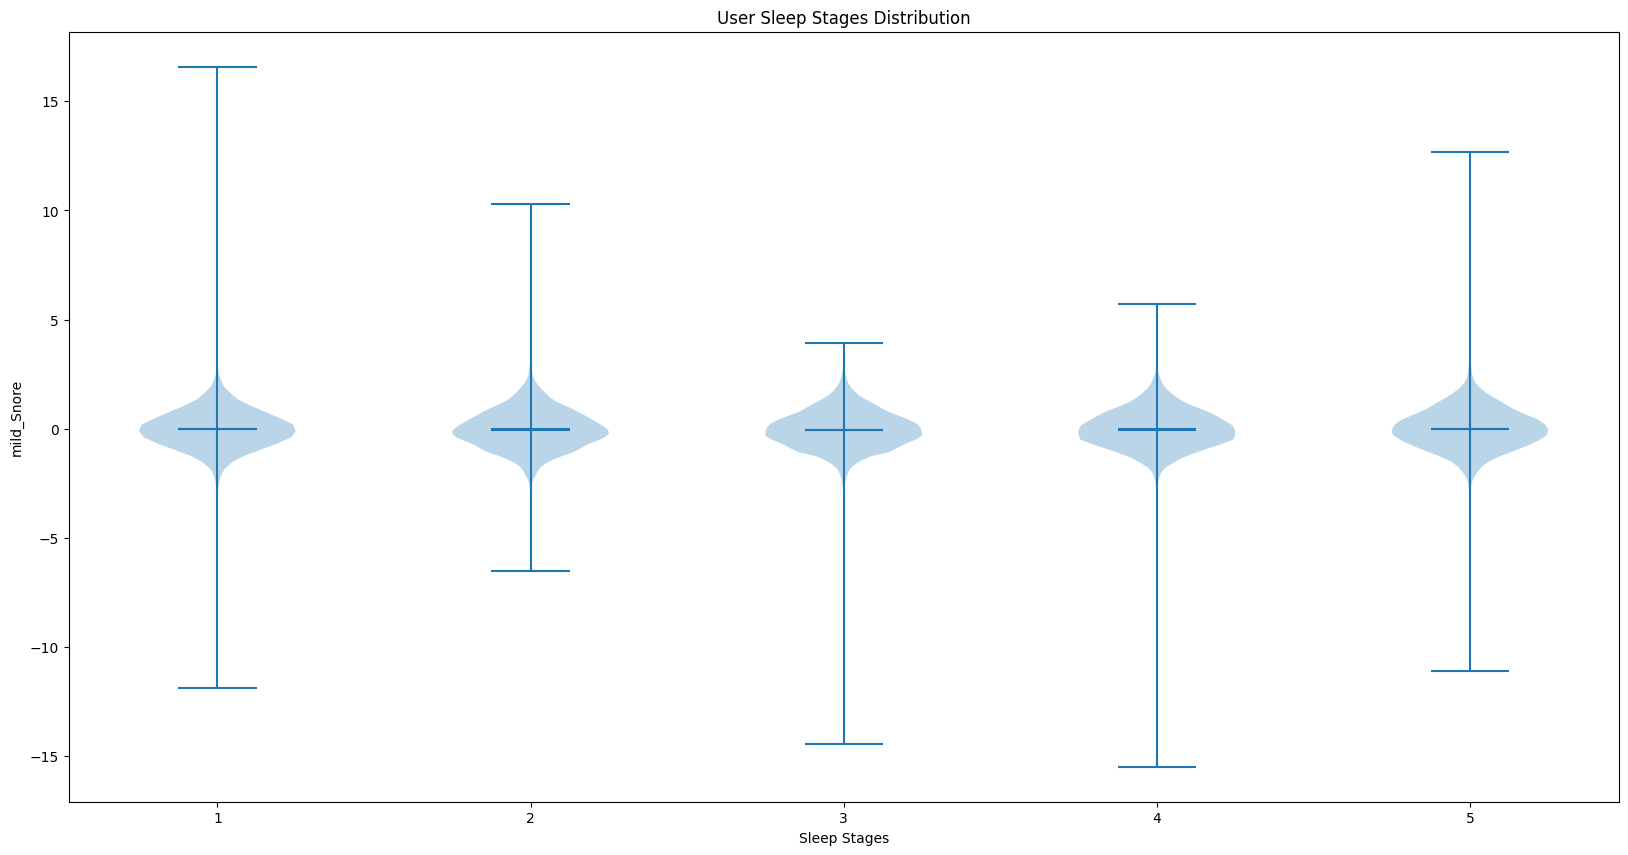

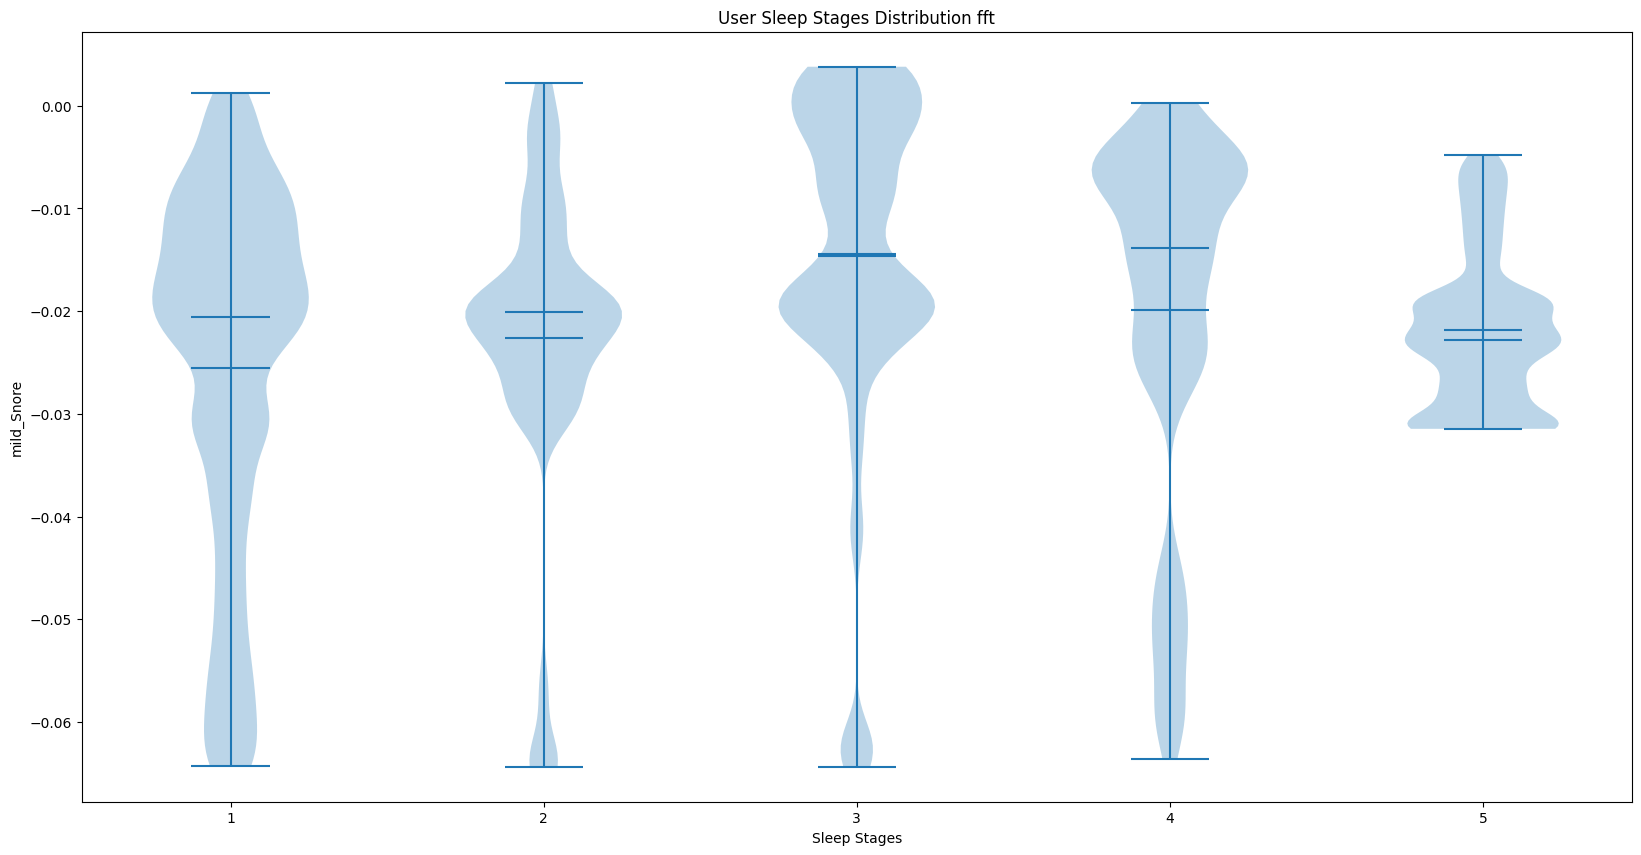

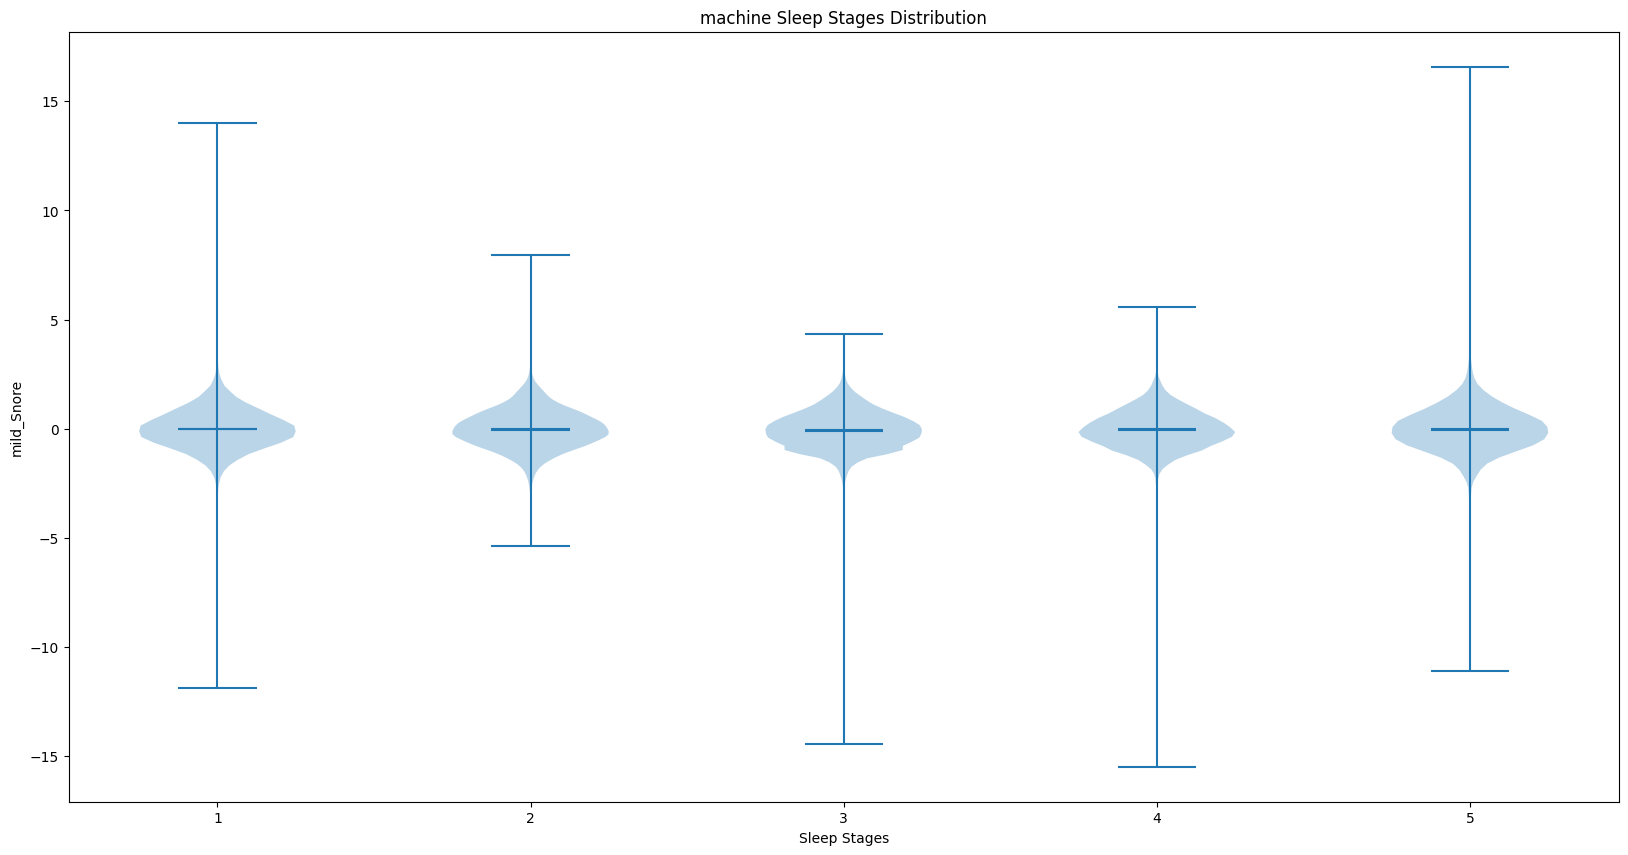

In [46]:
mild_snore = pd.read_csv('C:\\Users\\anany\\Desktop\\OSA\\mild_csvs\\Snore.csv')
reconstructed_mild_snore_sev_1hz = make_reconstructed_fft(mild_snore['signal'], 1)
reconstructed_mild_snore_sev_1hz = np.append(reconstructed_mild_snore_sev_1hz, np.zeros(36000 - len(reconstructed_mild_snore_sev_1hz)))
mild_snore['fft_1'] = reconstructed_mild_snore_sev_1hz

user_wake = mild_snore[mild_snore['user sleep stage'] == 'Wake']
user_nonrem1 = mild_snore[mild_snore['user sleep stage'] == 'NonREM1']
user_nonrem2 = mild_snore[mild_snore['user sleep stage'] == 'NonREM2']
user_nonrem3 = mild_snore[mild_snore['user sleep stage'] == 'NonREM3']
user_rem = mild_snore[mild_snore['user sleep stage'] == 'REM']

machine_wake = mild_snore[mild_snore['machine sleep stage'] == 'Wake']
machine_nonrem1 = mild_snore[mild_snore['machine sleep stage'] == 'NonREM1']
machine_nonrem2 = mild_snore[mild_snore['machine sleep stage'] == 'NonREM2']
machine_nonrem3 = mild_snore[mild_snore['machine sleep stage'] == 'NonREM3']
machine_rem = mild_snore[mild_snore['machine sleep stage'] == 'REM']

plt.figure(figsize=(20, 10))
plt.violinplot([user_wake['signal'], user_nonrem1['signal'], user_nonrem2['signal'], user_nonrem3['signal'], user_rem['signal']], showmeans=True, showextrema=True, showmedians=True)
plt.title("User Sleep Stages Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("mild_Snore")
plt.show()

plt.figure(figsize=(20, 10))
plt.violinplot([user_wake['fft_1'], user_nonrem1['fft_1'], user_nonrem2['fft_1'], user_nonrem3['fft_1'], user_rem['fft_1']], showmeans=True, showextrema=True, showmedians=True)
plt.title("User Sleep Stages Distribution fft")
plt.xlabel("Sleep Stages")
plt.ylabel("mild_Snore")
plt.show()

plt.figure(figsize=(20, 10))
plt.violinplot([machine_wake['signal'], machine_nonrem1['signal'], machine_nonrem2['signal'], machine_nonrem3['signal'], machine_rem['signal']], showmeans=True, showextrema=True, showmedians=True)
plt.title("machine Sleep Stages Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("mild_Snore")
plt.show()

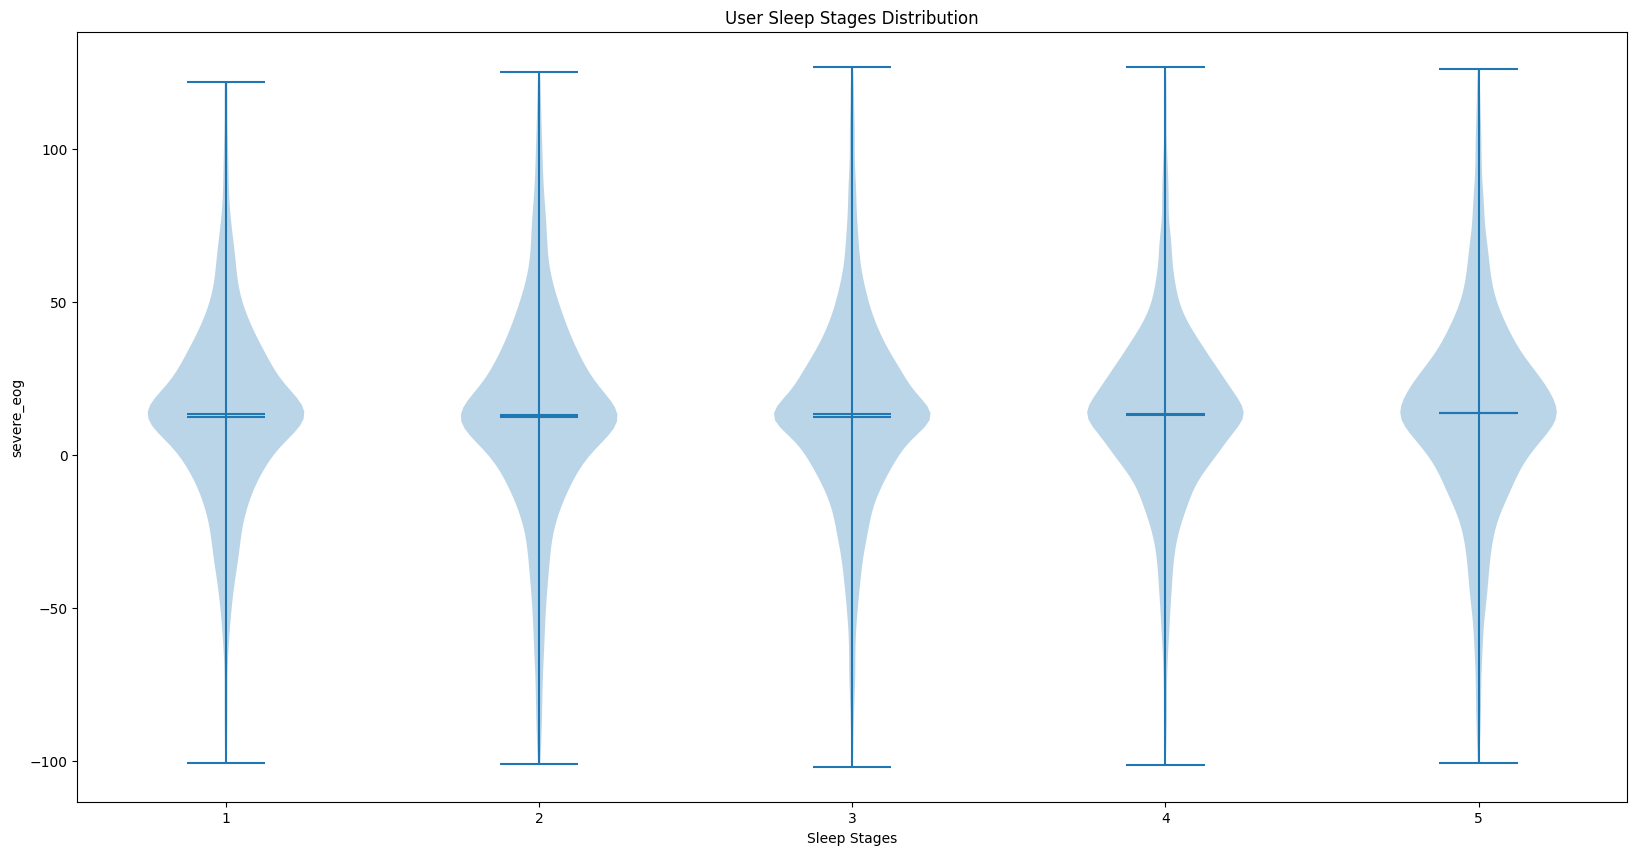

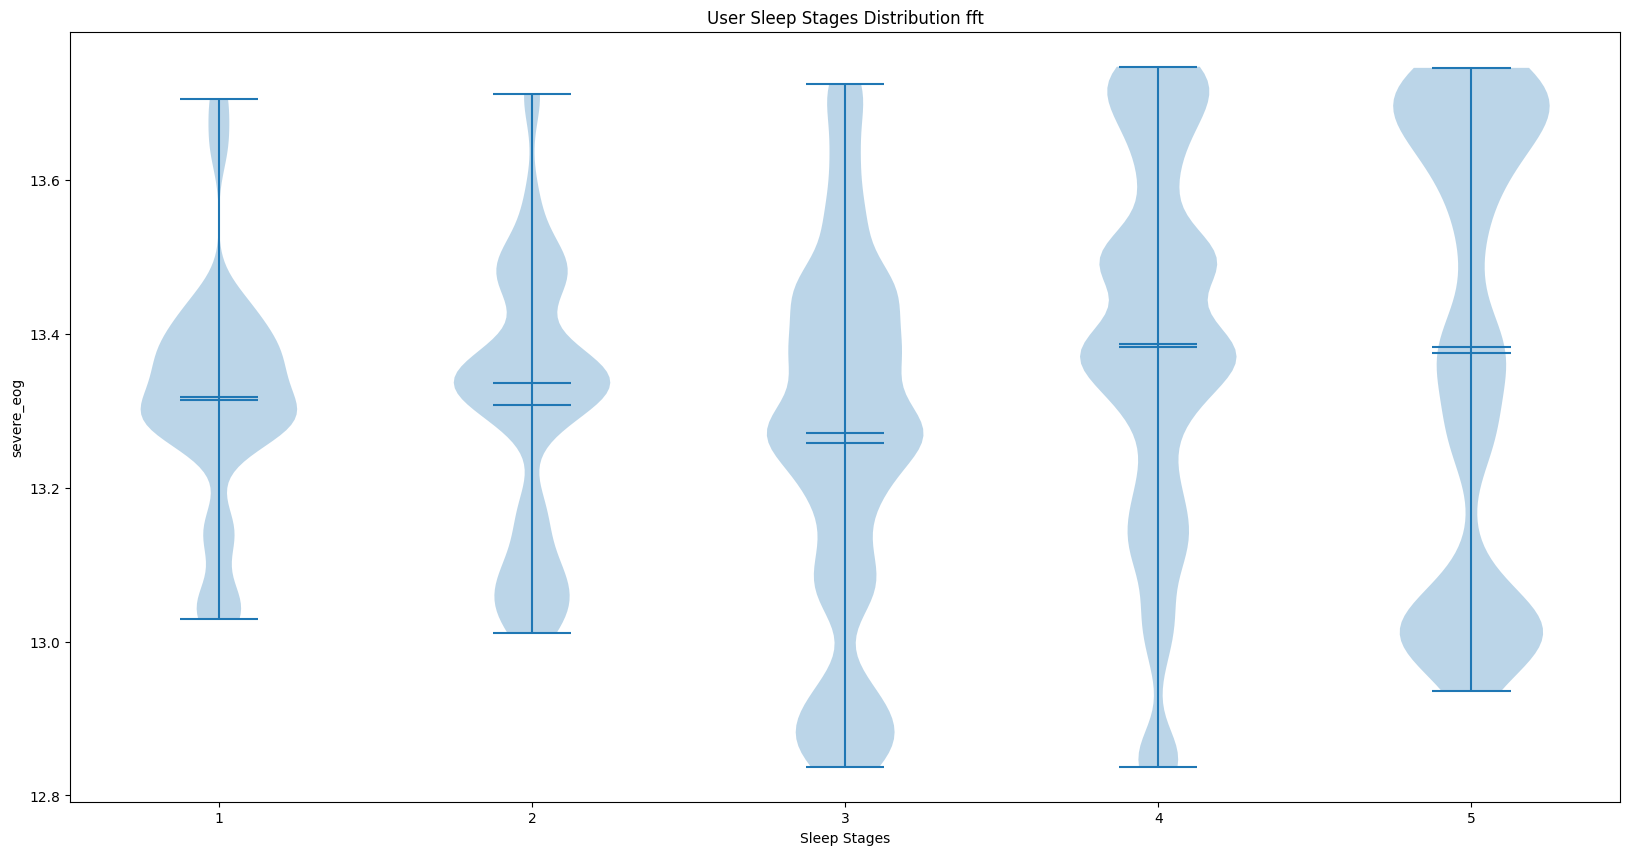

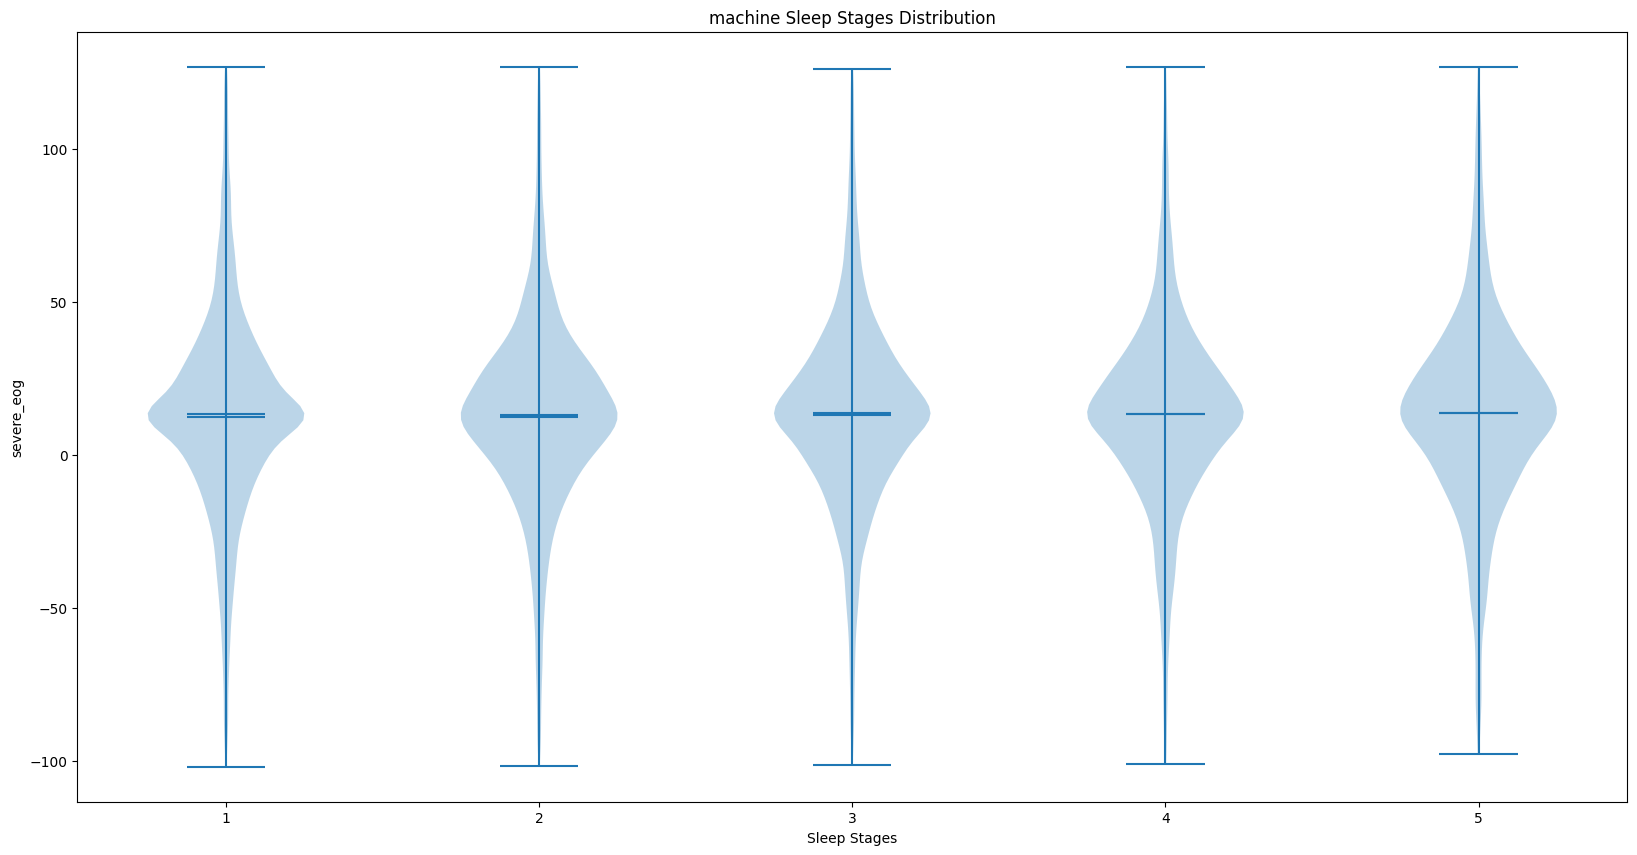

In [47]:
severe_eog = pd.read_csv('C:\\Users\\anany\\Desktop\\OSA\\severe_csvs\\EOG LOC-A2.csv')
reconstructed_severe_eog_sev_1hz = make_reconstructed_fft(severe_eog['signal'], 1)
reconstructed_severe_eog_sev_1hz = np.append(reconstructed_severe_eog_sev_1hz, np.zeros(36000 - len(reconstructed_severe_eog_sev_1hz)))
severe_eog['fft_1'] = reconstructed_severe_eog_sev_1hz

user_wake = severe_eog[severe_eog['user sleep stage'] == 'Wake']
user_nonrem1 = severe_eog[severe_eog['user sleep stage'] == 'NonREM1']
user_nonrem2 = severe_eog[severe_eog['user sleep stage'] == 'NonREM2']
user_nonrem3 = severe_eog[severe_eog['user sleep stage'] == 'NonREM3']
user_rem = severe_eog[severe_eog['user sleep stage'] == 'REM']

machine_wake = severe_eog[severe_eog['machine sleep stage'] == 'Wake']
machine_nonrem1 = severe_eog[severe_eog['machine sleep stage'] == 'NonREM1']
machine_nonrem2 = severe_eog[severe_eog['machine sleep stage'] == 'NonREM2']
machine_nonrem3 = severe_eog[severe_eog['machine sleep stage'] == 'NonREM3']
machine_rem = severe_eog[severe_eog['machine sleep stage'] == 'REM']

plt.figure(figsize=(20, 10))
plt.violinplot([user_wake['signal'], user_nonrem1['signal'], user_nonrem2['signal'], user_nonrem3['signal'], user_rem['signal']], showmeans=True, showextrema=True, showmedians=True)
plt.title("User Sleep Stages Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("severe_eog")
plt.show()

plt.figure(figsize=(20, 10))
plt.violinplot([user_wake['fft_1'], user_nonrem1['fft_1'], user_nonrem2['fft_1'], user_nonrem3['fft_1'], user_rem['fft_1']], showmeans=True, showextrema=True, showmedians=True)
plt.title("User Sleep Stages Distribution fft")
plt.xlabel("Sleep Stages")
plt.ylabel("severe_eog")
plt.show()

plt.figure(figsize=(20, 10))
plt.violinplot([machine_wake['signal'], machine_nonrem1['signal'], machine_nonrem2['signal'], machine_nonrem3['signal'], machine_rem['signal']], showmeans=True, showextrema=True, showmedians=True)
plt.title("machine Sleep Stages Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("severe_eog")
plt.show()


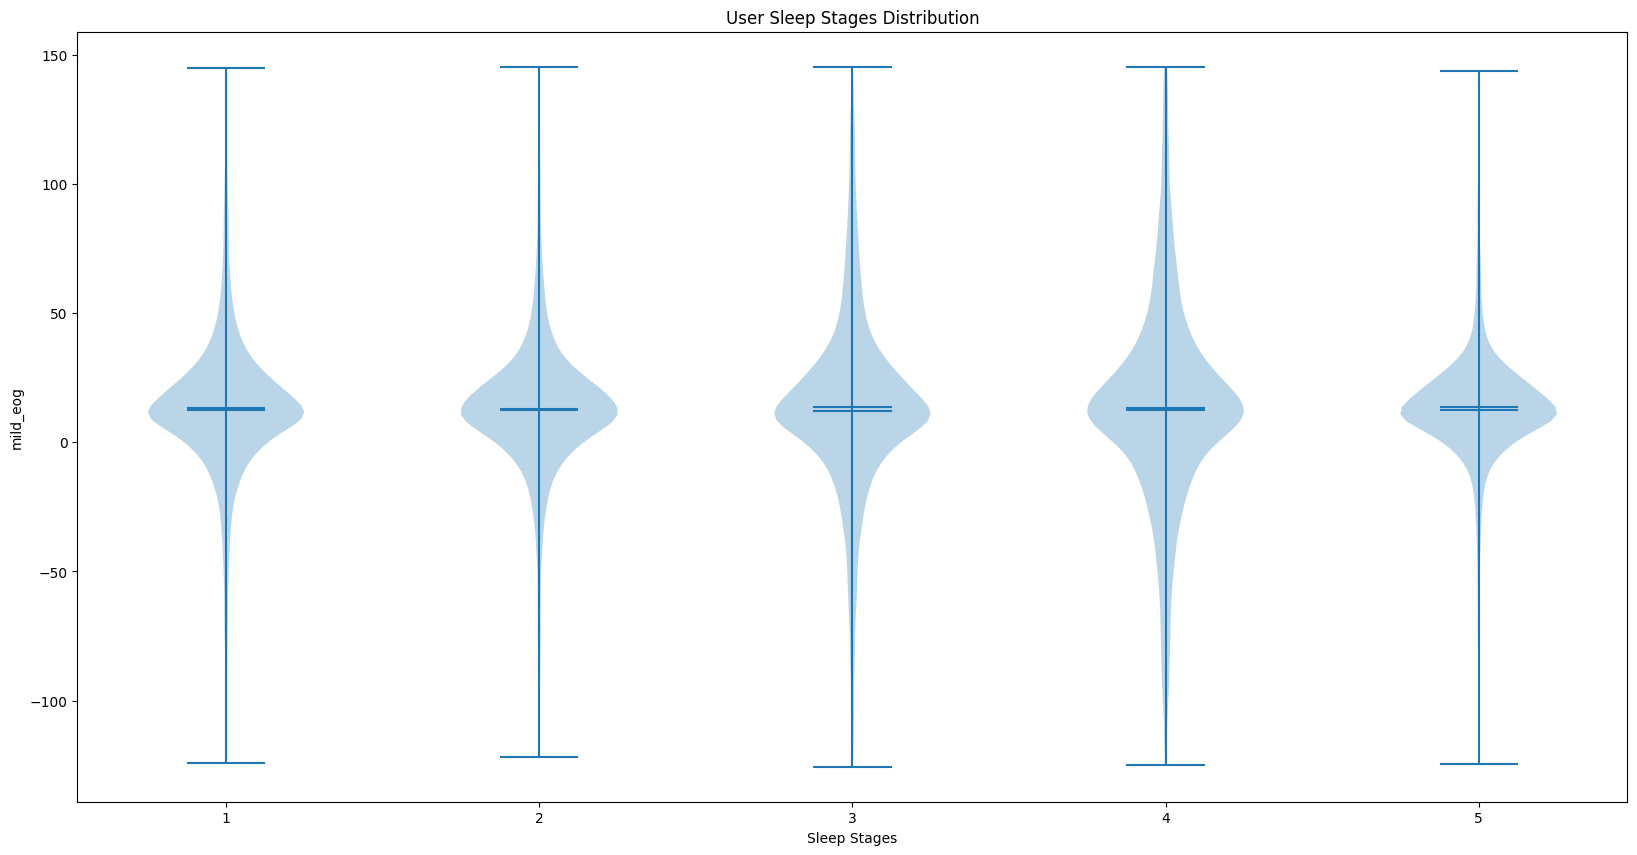

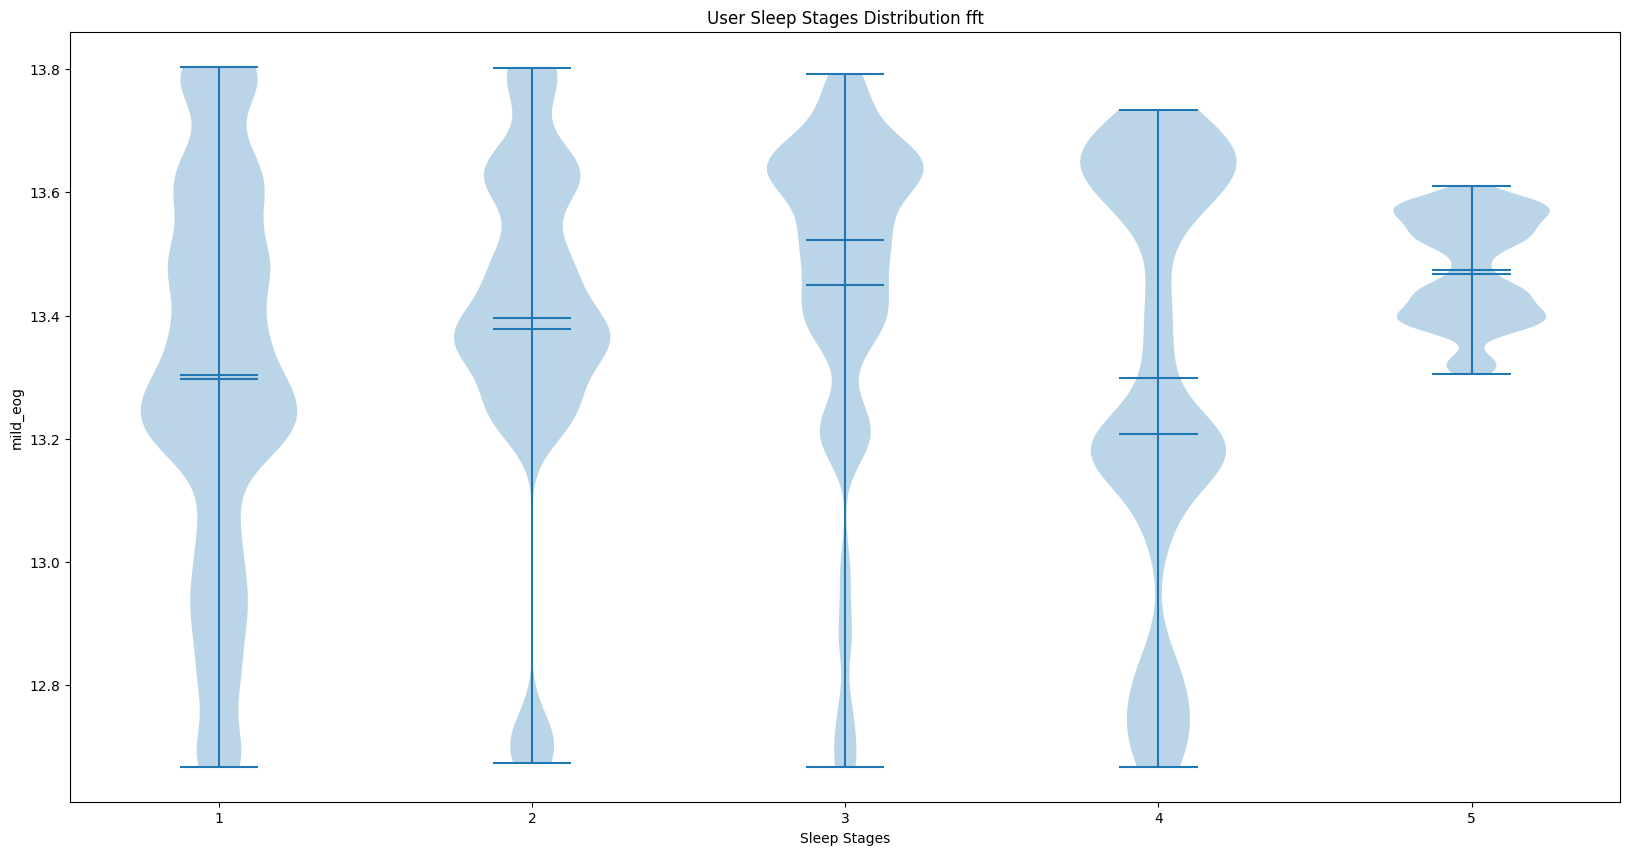

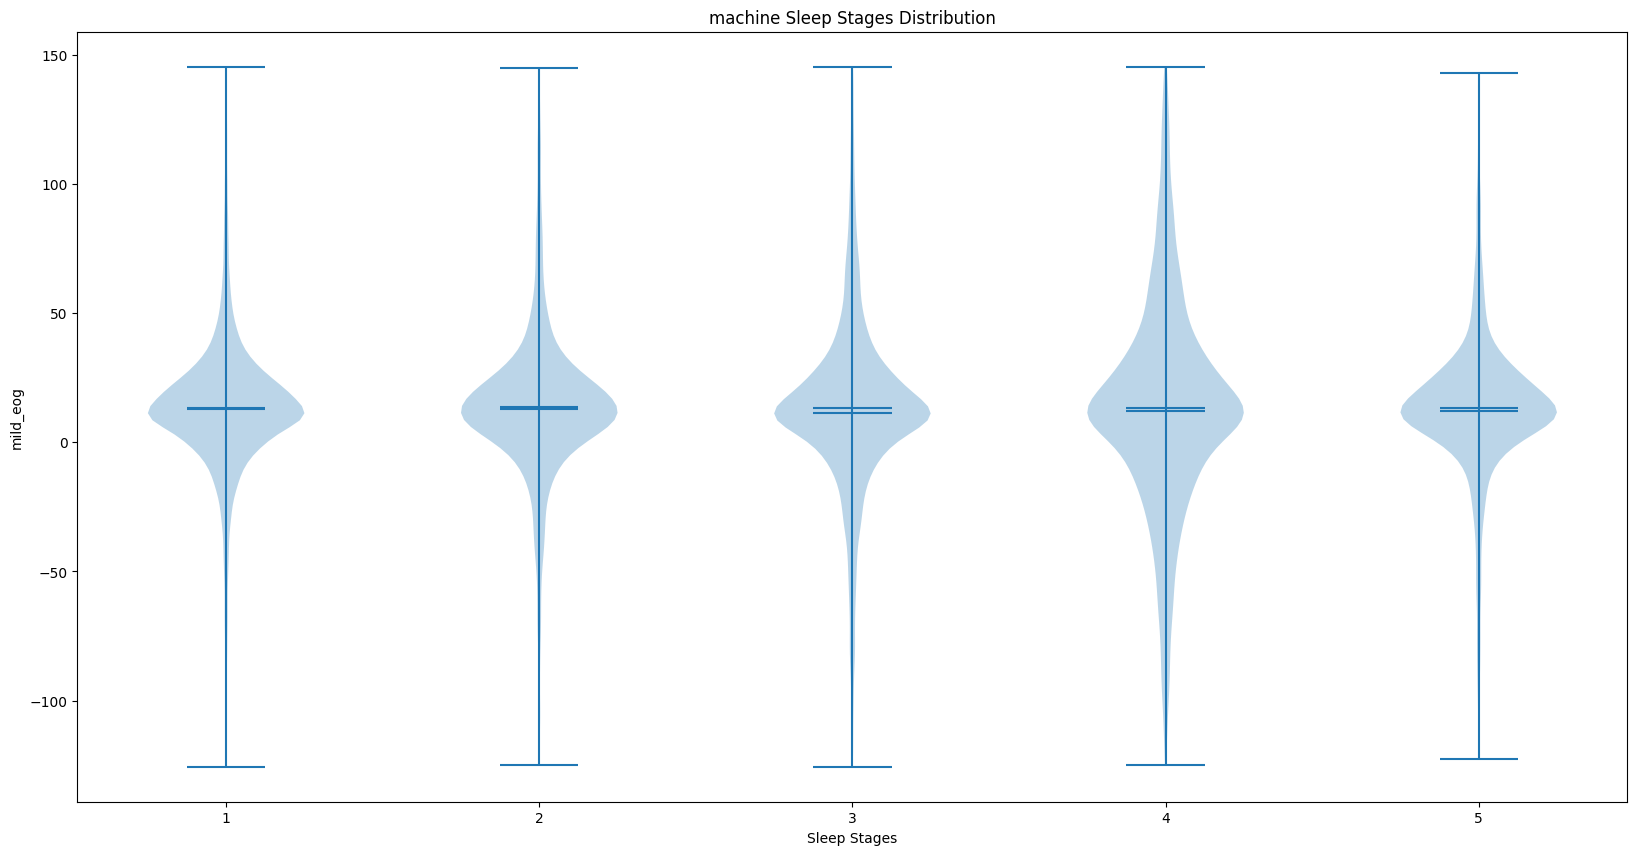

In [48]:
mild_eog = pd.read_csv('C:\\Users\\anany\\Desktop\\OSA\\mild_csvs\\EOG LOC-A2.csv')
reconstructed_mild_eog_sev_1hz = make_reconstructed_fft(mild_eog['signal'], 1)
reconstructed_mild_eog_sev_1hz = np.append(reconstructed_mild_eog_sev_1hz, np.zeros(36000 - len(reconstructed_mild_eog_sev_1hz)))
mild_eog['fft_1'] = reconstructed_mild_eog_sev_1hz

user_wake = mild_eog[mild_eog['user sleep stage'] == 'Wake']
user_nonrem1 = mild_eog[mild_eog['user sleep stage'] == 'NonREM1']
user_nonrem2 = mild_eog[mild_eog['user sleep stage'] == 'NonREM2']
user_nonrem3 = mild_eog[mild_eog['user sleep stage'] == 'NonREM3']
user_rem = mild_eog[mild_eog['user sleep stage'] == 'REM']

machine_wake = mild_eog[mild_eog['machine sleep stage'] == 'Wake']
machine_nonrem1 = mild_eog[mild_eog['machine sleep stage'] == 'NonREM1']
machine_nonrem2 = mild_eog[mild_eog['machine sleep stage'] == 'NonREM2']
machine_nonrem3 = mild_eog[mild_eog['machine sleep stage'] == 'NonREM3']
machine_rem = mild_eog[mild_eog['machine sleep stage'] == 'REM']

plt.figure(figsize=(20, 10))
plt.violinplot([user_wake['signal'], user_nonrem1['signal'], user_nonrem2['signal'], user_nonrem3['signal'], user_rem['signal']], showmeans=True, showextrema=True, showmedians=True)
plt.title("User Sleep Stages Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("mild_eog")
plt.show()

plt.figure(figsize=(20, 10))
plt.violinplot([user_wake['fft_1'], user_nonrem1['fft_1'], user_nonrem2['fft_1'], user_nonrem3['fft_1'], user_rem['fft_1']], showmeans=True, showextrema=True, showmedians=True)
plt.title("User Sleep Stages Distribution fft")
plt.xlabel("Sleep Stages")
plt.ylabel("mild_eog")
plt.show()

plt.figure(figsize=(20, 10))
plt.violinplot([machine_wake['signal'], machine_nonrem1['signal'], machine_nonrem2['signal'], machine_nonrem3['signal'], machine_rem['signal']], showmeans=True, showextrema=True, showmedians=True)
plt.title("machine Sleep Stages Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("mild_eog")
plt.show()


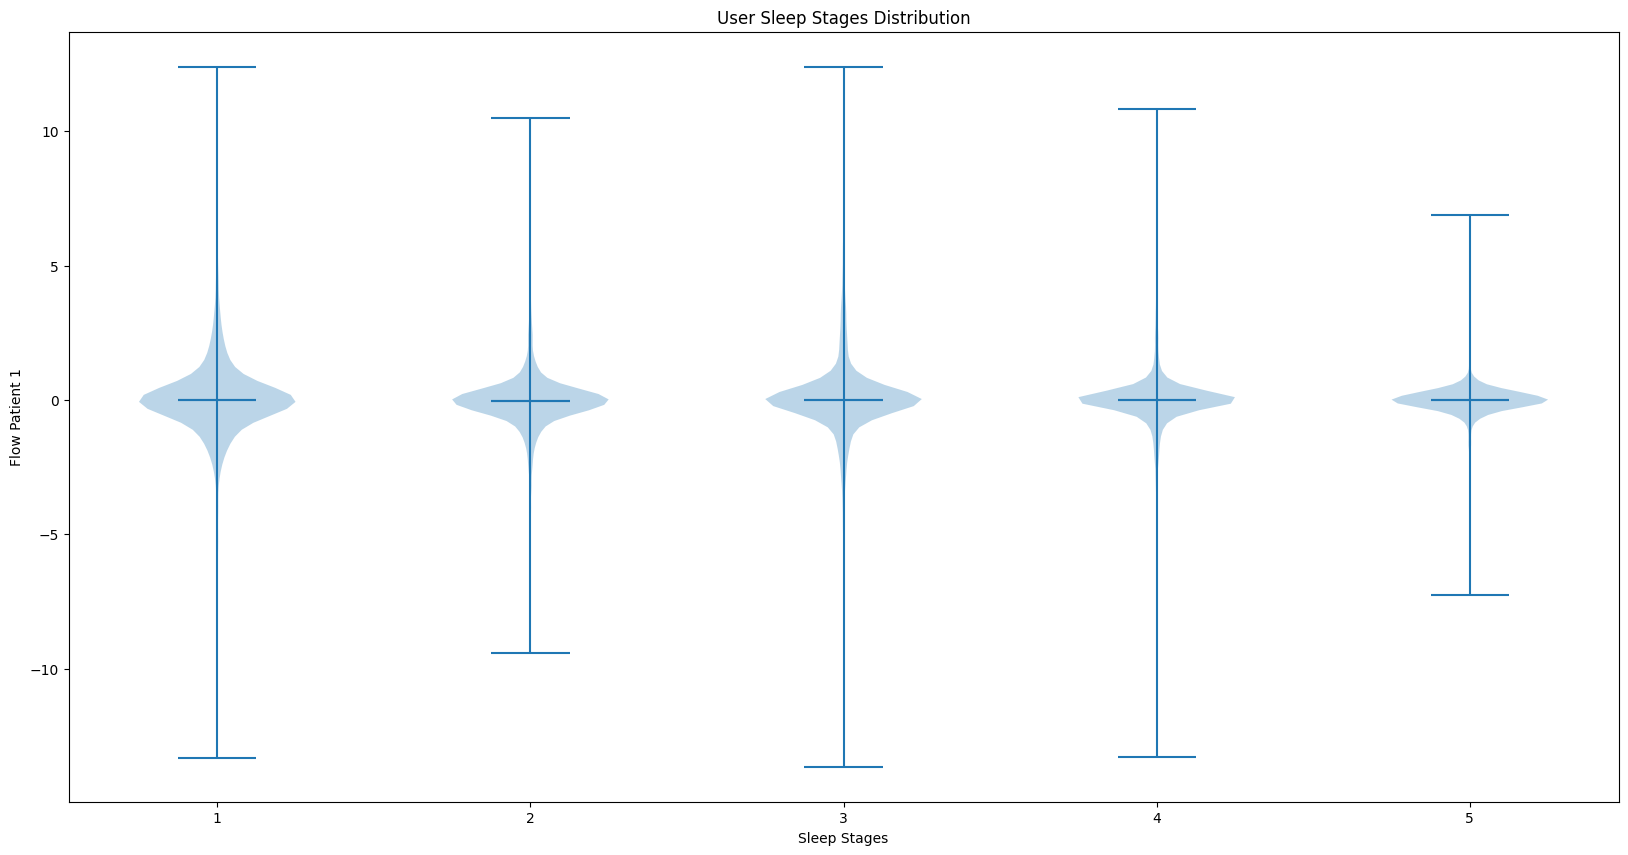

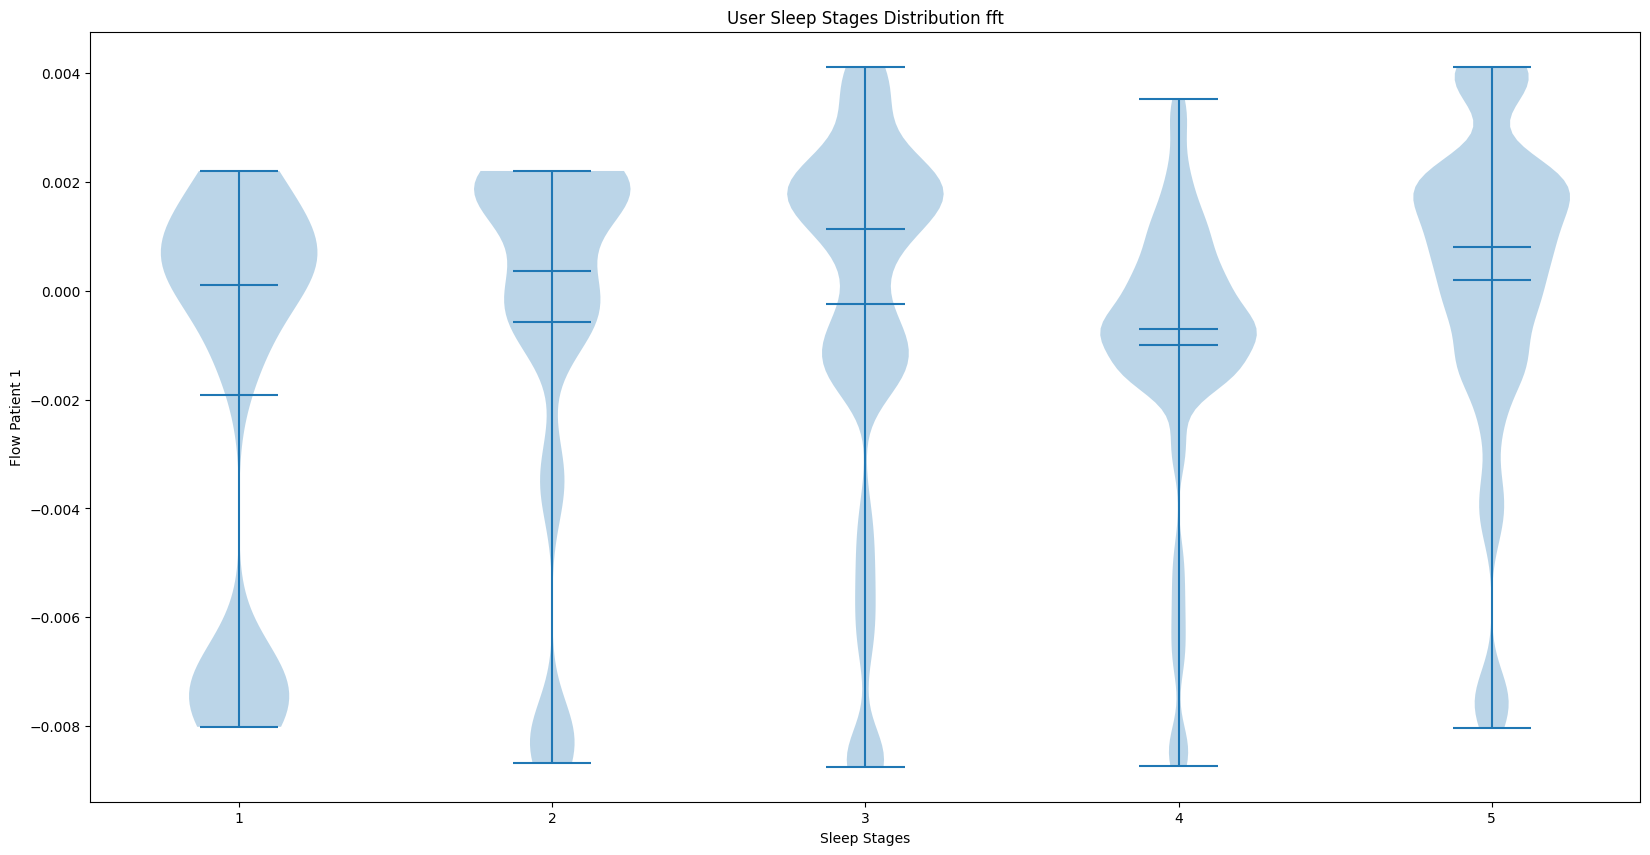

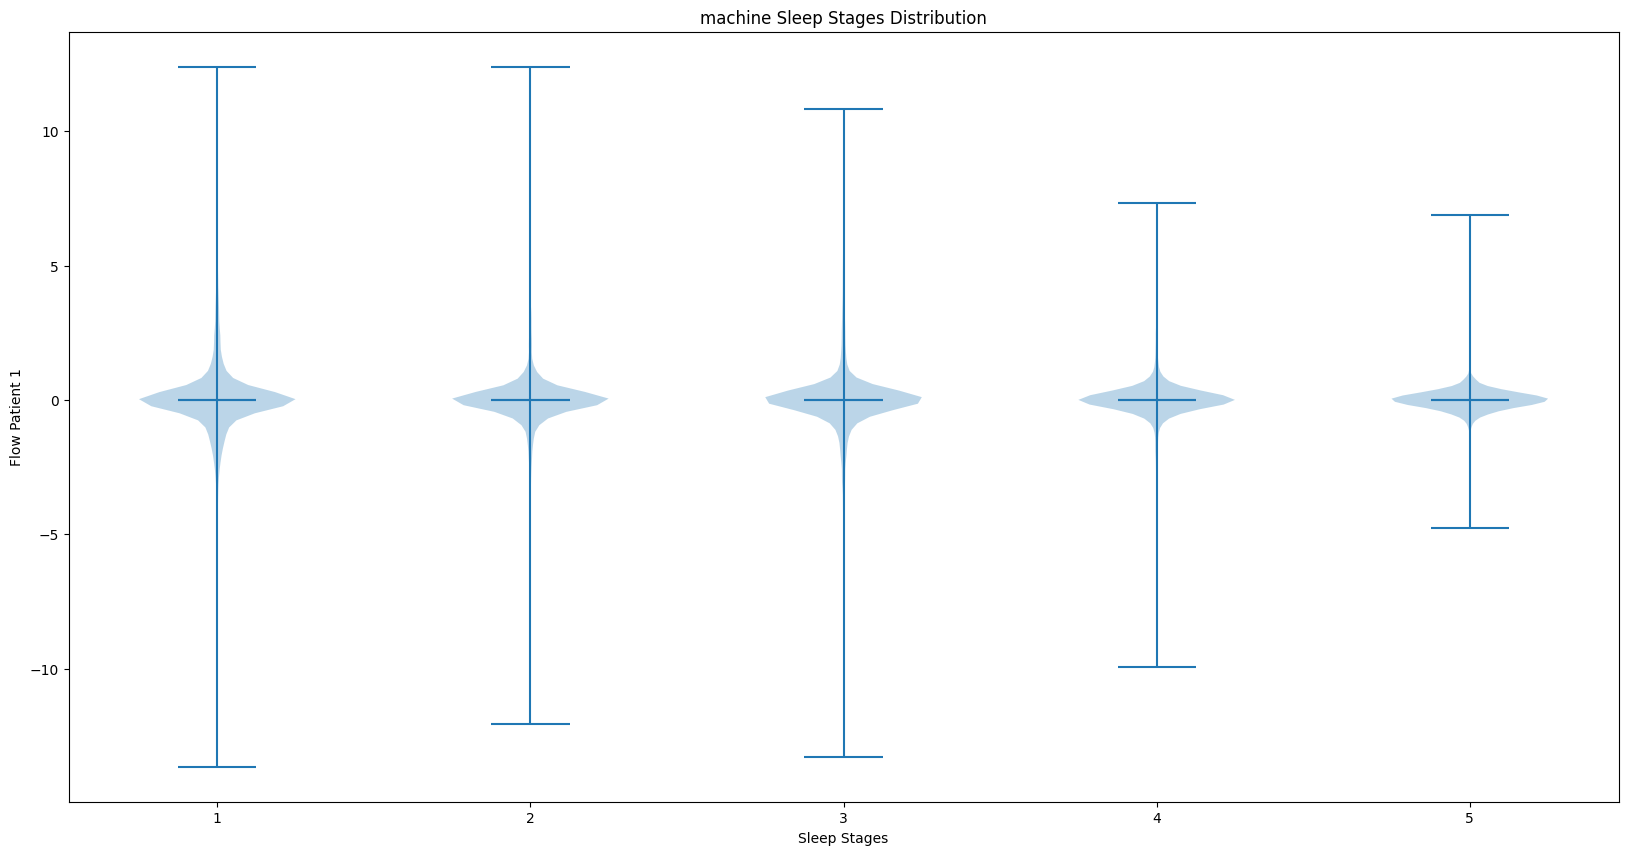

In [49]:
severe_fp1 = pd.read_csv('C:\\Users\\anany\\Desktop\\OSA\\severe_csvs\\Flow patient 1.csv')
reconstructed_severe_fp1_sev_1hz = make_reconstructed_fft(severe_fp1['signal'], 1)
reconstructed_severe_fp1_sev_1hz = np.append(reconstructed_severe_fp1_sev_1hz, np.zeros(36000 - len(reconstructed_severe_fp1_sev_1hz)))
severe_fp1['fft_1'] = reconstructed_severe_fp1_sev_1hz

user_wake = severe_fp1[severe_fp1['user sleep stage'] == 'Wake']
user_nonrem1 = severe_fp1[severe_fp1['user sleep stage'] == 'NonREM1']
user_nonrem2 = severe_fp1[severe_fp1['user sleep stage'] == 'NonREM2']
user_nonrem3 = severe_fp1[severe_fp1['user sleep stage'] == 'NonREM3']
user_rem = severe_fp1[severe_fp1['user sleep stage'] == 'REM']

machine_wake = severe_fp1[severe_fp1['machine sleep stage'] == 'Wake']
machine_nonrem1 = severe_fp1[severe_fp1['machine sleep stage'] == 'NonREM1']
machine_nonrem2 = severe_fp1[severe_fp1['machine sleep stage'] == 'NonREM2']
machine_nonrem3 = severe_fp1[severe_fp1['machine sleep stage'] == 'NonREM3']
machine_rem = severe_fp1[severe_fp1['machine sleep stage'] == 'REM']

plt.figure(figsize=(20, 10))
plt.violinplot([user_wake['signal'], user_nonrem1['signal'], user_nonrem2['signal'], user_nonrem3['signal'], user_rem['signal']], showmeans=True, showextrema=True, showmedians=True)
plt.title("User Sleep Stages Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("Flow Patient 1")
plt.show()

plt.figure(figsize=(20, 10))
plt.violinplot([user_wake['fft_1'], user_nonrem1['fft_1'], user_nonrem2['fft_1'], user_nonrem3['fft_1'], user_rem['fft_1']], showmeans=True, showextrema=True, showmedians=True)
plt.title("User Sleep Stages Distribution fft")
plt.xlabel("Sleep Stages")
plt.ylabel("Flow Patient 1")
plt.show()

plt.figure(figsize=(20, 10))
plt.violinplot([machine_wake['signal'], machine_nonrem1['signal'], machine_nonrem2['signal'], machine_nonrem3['signal'], machine_rem['signal']], showmeans=True, showextrema=True, showmedians=True)
plt.title("machine Sleep Stages Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("Flow Patient 1")
plt.show()

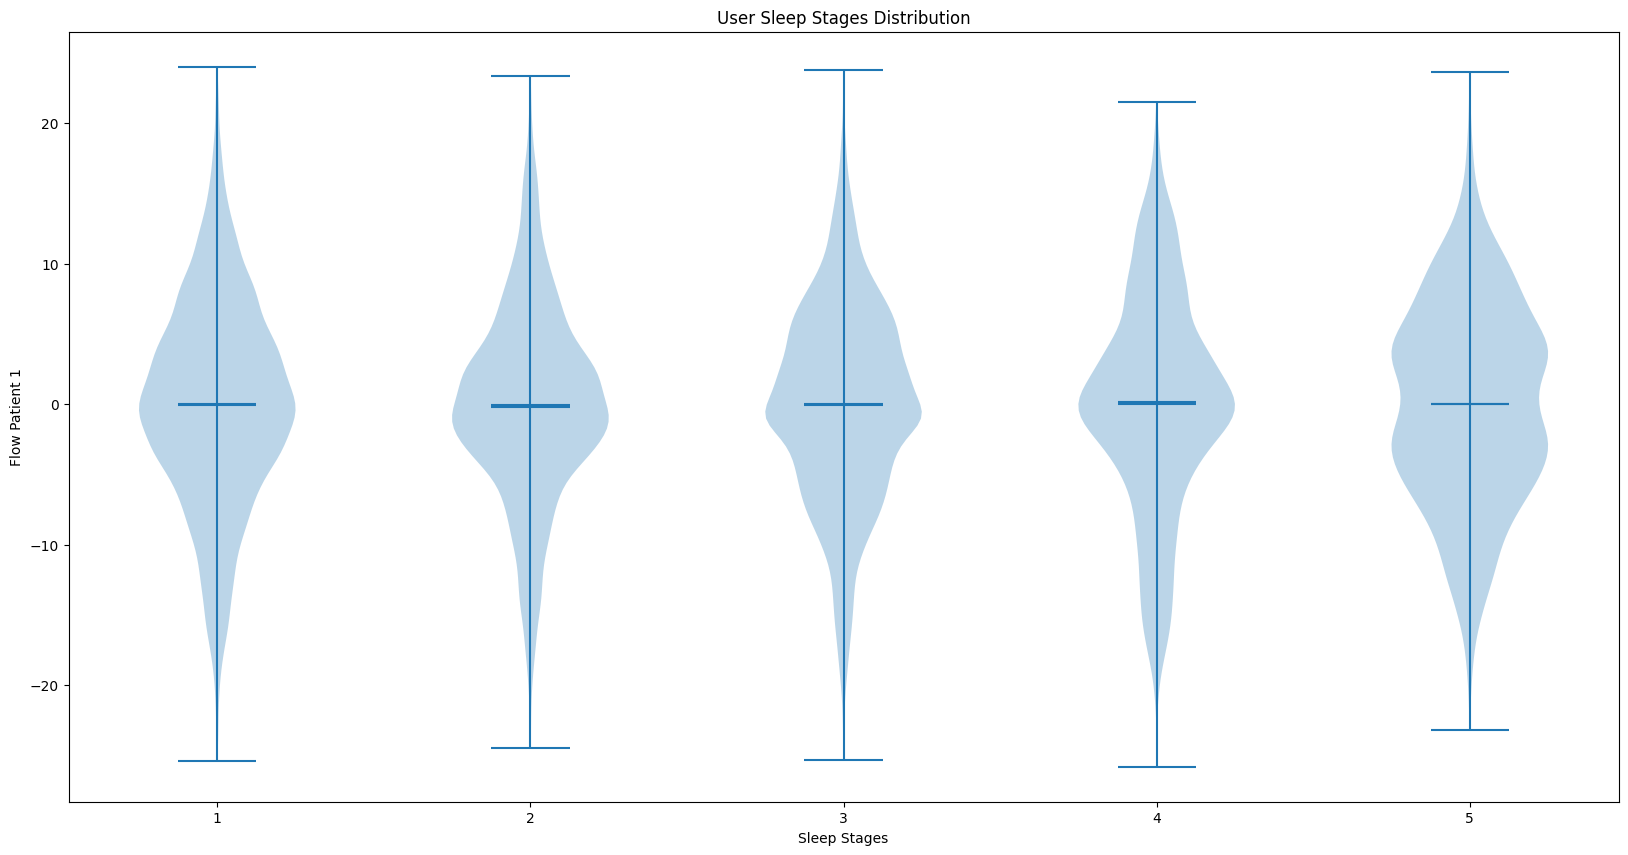

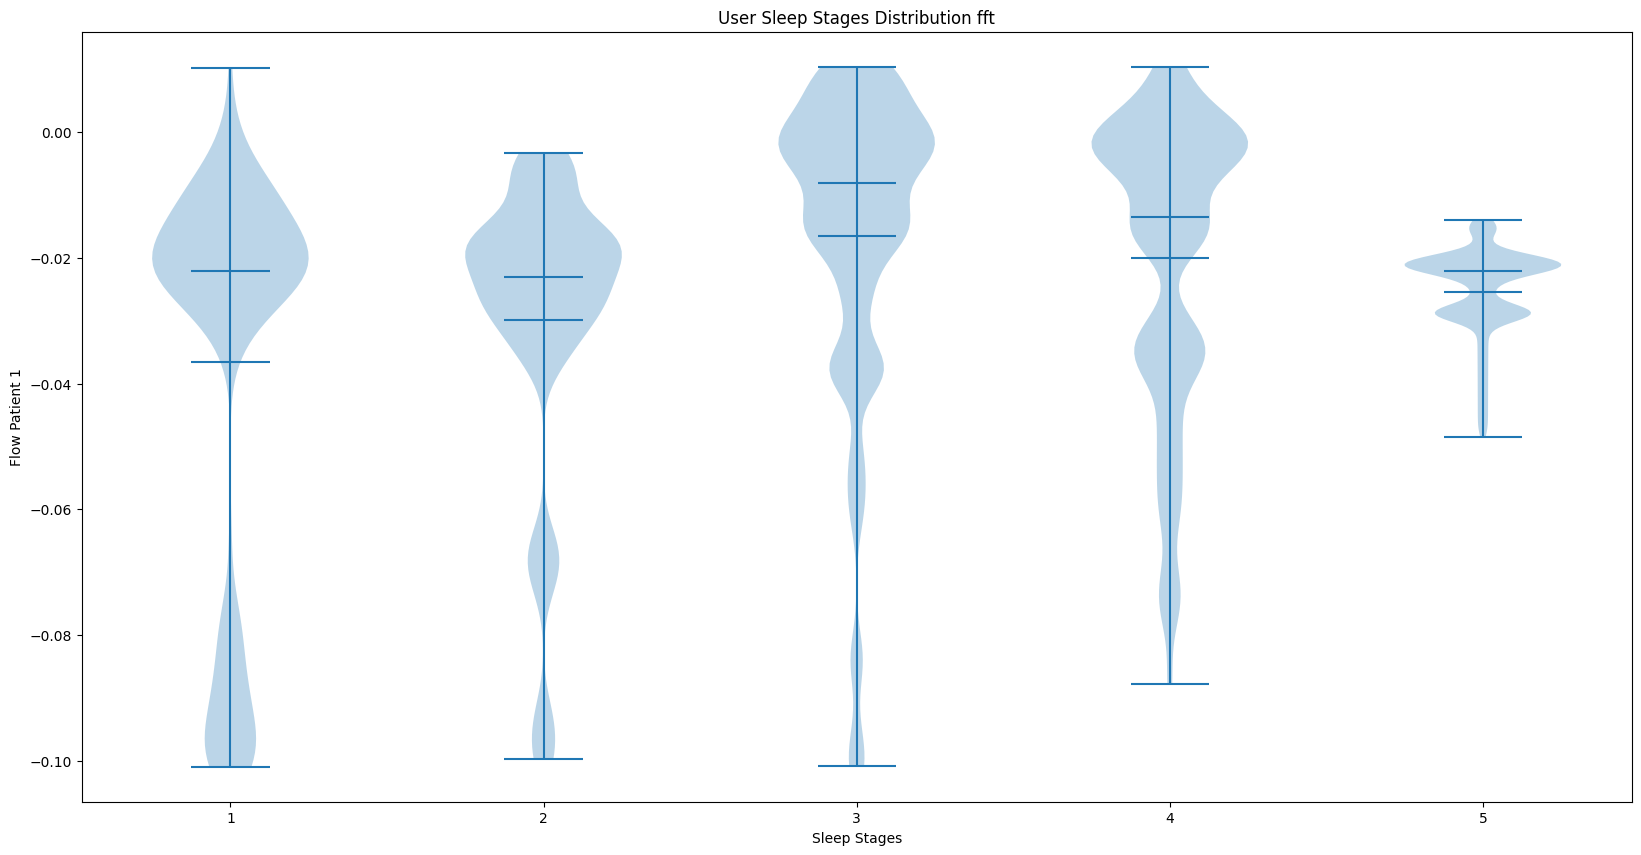

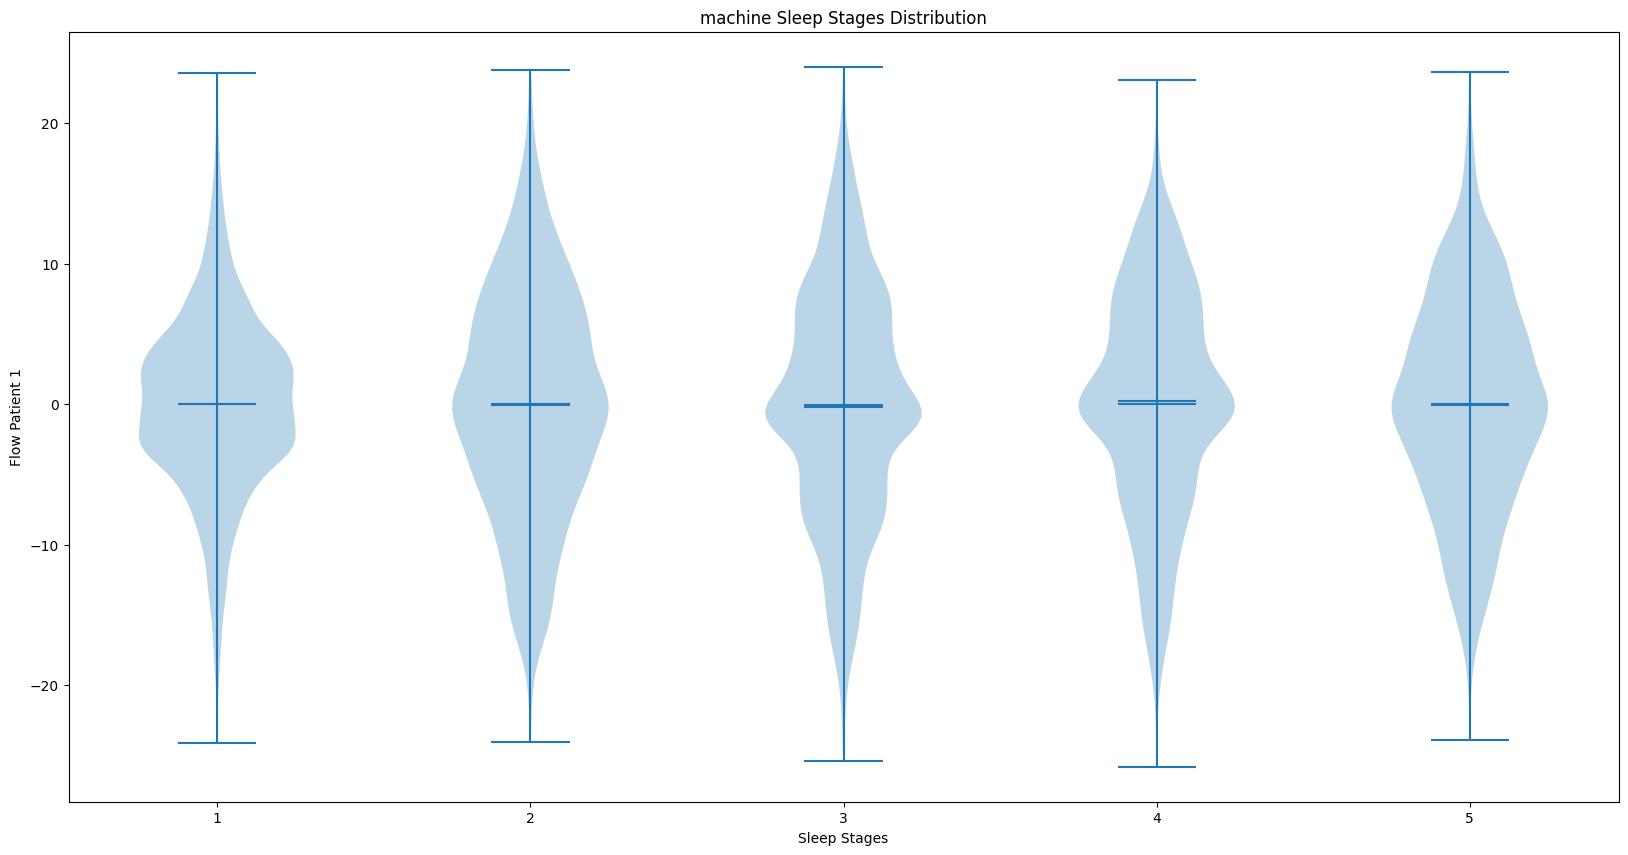

In [50]:
mild_fp1 = pd.read_csv('C:\\Users\\anany\\Desktop\\OSA\\mild_csvs\\Flow patient 1.csv')
reconstructed_mild_fp1_sev_1hz = make_reconstructed_fft(mild_fp1['signal'], 1)
reconstructed_mild_fp1_sev_1hz = np.append(reconstructed_mild_fp1_sev_1hz, np.zeros(36000 - len(reconstructed_mild_fp1_sev_1hz)))
mild_fp1['fft_1'] = reconstructed_mild_fp1_sev_1hz

user_wake = mild_fp1[mild_fp1['user sleep stage'] == 'Wake']
user_nonrem1 = mild_fp1[mild_fp1['user sleep stage'] == 'NonREM1']
user_nonrem2 = mild_fp1[mild_fp1['user sleep stage'] == 'NonREM2']
user_nonrem3 = mild_fp1[mild_fp1['user sleep stage'] == 'NonREM3']
user_rem = mild_fp1[mild_fp1['user sleep stage'] == 'REM']

machine_wake = mild_fp1[mild_fp1['machine sleep stage'] == 'Wake']
machine_nonrem1 = mild_fp1[mild_fp1['machine sleep stage'] == 'NonREM1']
machine_nonrem2 = mild_fp1[mild_fp1['machine sleep stage'] == 'NonREM2']
machine_nonrem3 = mild_fp1[mild_fp1['machine sleep stage'] == 'NonREM3']
machine_rem = mild_fp1[mild_fp1['machine sleep stage'] == 'REM']

plt.figure(figsize=(20, 10))
plt.violinplot([user_wake['signal'], user_nonrem1['signal'], user_nonrem2['signal'], user_nonrem3['signal'], user_rem['signal']], showmeans=True, showextrema=True, showmedians=True)
plt.title("User Sleep Stages Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("Flow Patient 1")
plt.show()

plt.figure(figsize=(20, 10))
plt.violinplot([user_wake['fft_1'], user_nonrem1['fft_1'], user_nonrem2['fft_1'], user_nonrem3['fft_1'], user_rem['fft_1']], showmeans=True, showextrema=True, showmedians=True)
plt.title("User Sleep Stages Distribution fft")
plt.xlabel("Sleep Stages")
plt.ylabel("Flow Patient 1")
plt.show()

plt.figure(figsize=(20, 10))
plt.violinplot([machine_wake['signal'], machine_nonrem1['signal'], machine_nonrem2['signal'], machine_nonrem3['signal'], machine_rem['signal']], showmeans=True, showextrema=True, showmedians=True)
plt.title("machine Sleep Stages Distribution")
plt.xlabel("Sleep Stages")
plt.ylabel("Flow Patient 1")
plt.show()

## Fourier coefficient analysis

In [51]:
EEG_signal_sev_1hz = resampled_signal_1hz
EOG_signal_sev = combined_signal(edf_files_1, labels.index('EOG LOC-A2'))
Flow_signal_sev = combined_signal(edf_files_1, labels.index('Flow patient 1'))
Snore_signal_sev = combined_signal(edf_files_1, labels.index('Snore'))

print(len(EEG_signal_sev_1hz))
print(len(EOG_signal_sev))
print(len(Flow_signal_sev))
print(len(Snore_signal_sev))

34611
6922200
3461100
17305500


In [52]:
EOG_signal_sev_1hz = resample_signal(thresholding(EOG_signal_sev, 2), len(EEG_signal_sev_1hz))
Flow_signal_sev_1hz = resample_signal(thresholding(Flow_signal_sev, 2), len(EEG_signal_sev_1hz))
Snore_signal_sev_1hz = resample_signal(thresholding(Snore_signal_sev, 2), len(EEG_signal_sev_1hz))

EOG_signal_sev_128hz = resample_signal(thresholding(EOG_signal_sev, 2), len(EEG_signal_sev_1hz)*128)
Flow_signal_sev_128hz = resample_signal(thresholding(Flow_signal_sev, 2), len(EEG_signal_sev_1hz)*128)
Snore_signal_sev_128hz = resample_signal(thresholding(Snore_signal_sev, 2), len(EEG_signal_sev_1hz)*128)
EEG_signal_sev_128hz = resample_signal_128hz

In [53]:
print(len(EEG_signal_sev_128hz))
fft_eog_sev_1 = get_fft_coefficients(EOG_signal_sev_1hz, 1)
fft_flow_sev_1 = get_fft_coefficients(Flow_signal_sev_1hz, 1)
fft_snore_sev_1 = get_fft_coefficients(Snore_signal_sev_1hz, 1)
fft_eeg_sev_1 = get_fft_coefficients(EEG_signal_sev_1hz, 1)

fft_eog_sev_128 = get_fft_coefficients(EOG_signal_sev_128hz, 128)
fft_flow_sev_128 = get_fft_coefficients(Flow_signal_sev_128hz, 128)
fft_snore_sev_128 = get_fft_coefficients(Snore_signal_sev_128hz, 128)
fft_eeg_sev_128 = get_fft_coefficients(EEG_signal_sev_128hz, 128)

4430208


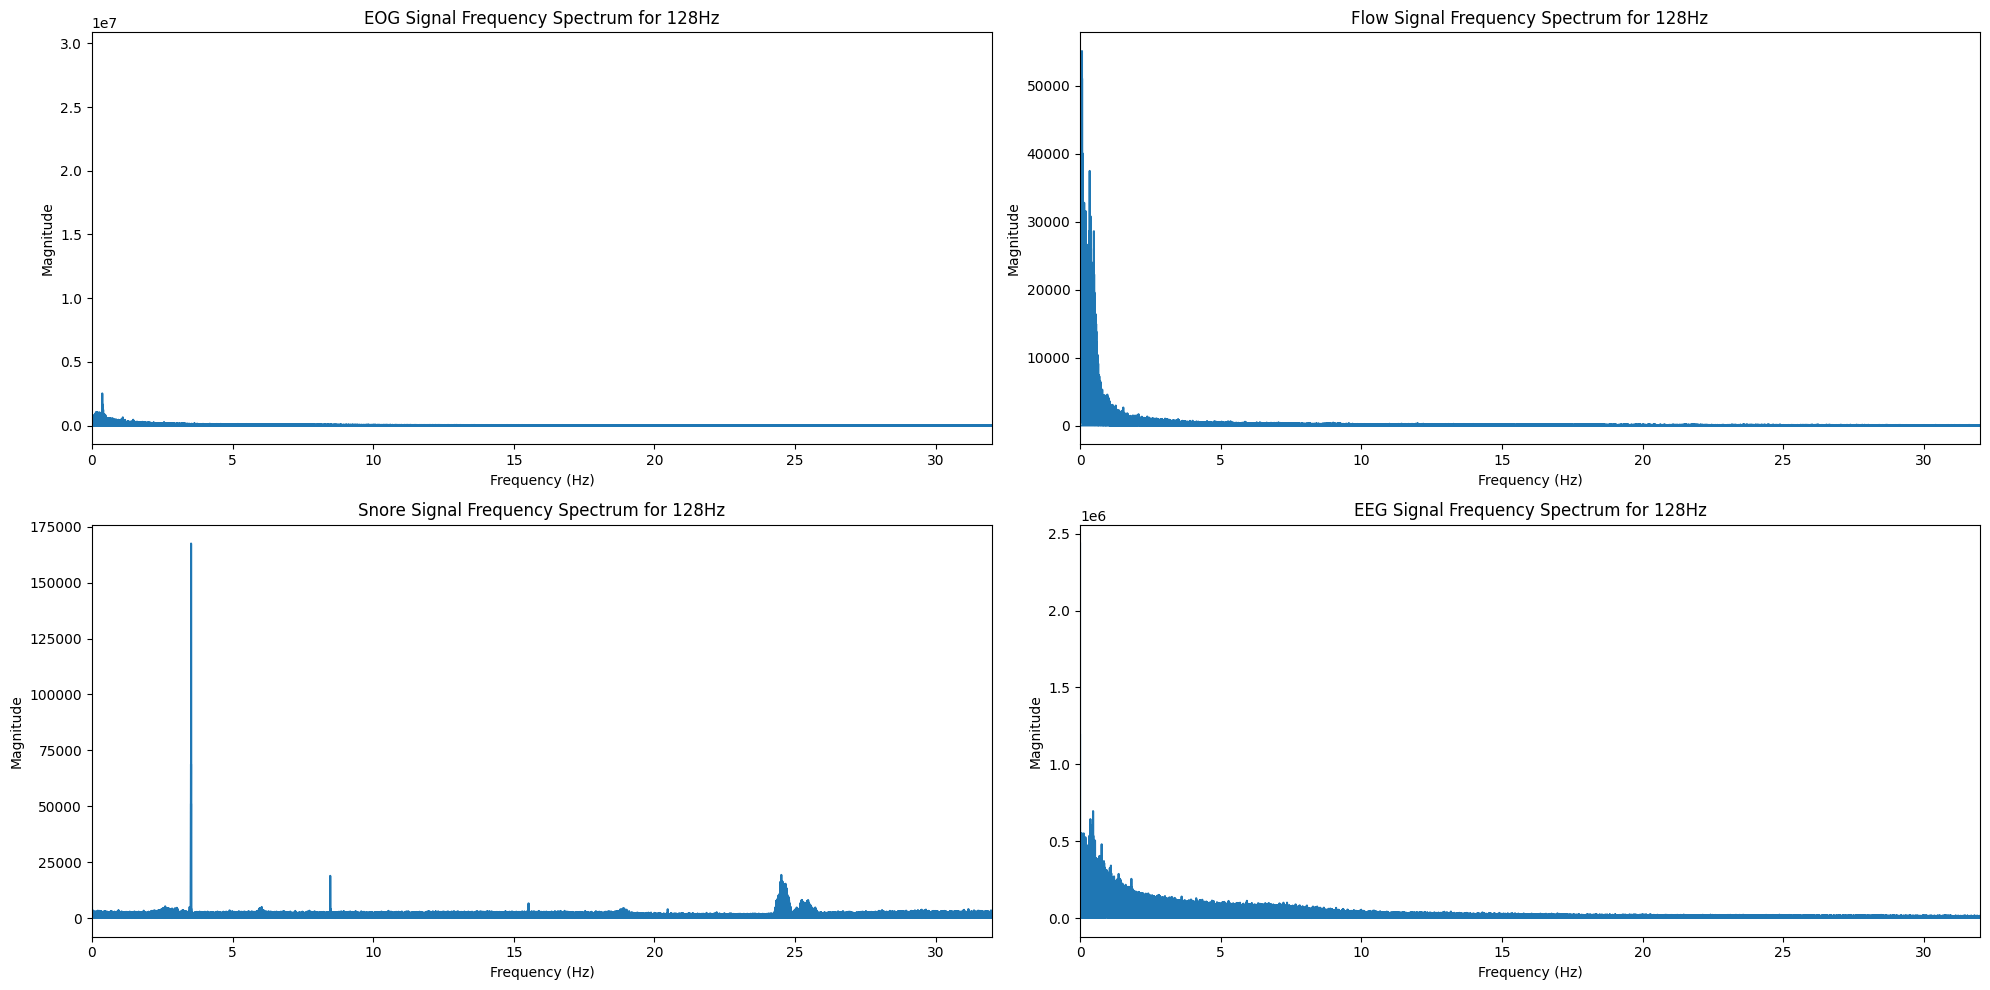

In [54]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.plot(fft_eog_sev_128[1], fft_eog_sev_128[2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("EOG Signal Frequency Spectrum for 128Hz")
max_frequency = fft_eog_sev_128[1].max()
plt.xlim(0, max_frequency / 2)

plt.subplot(2, 2, 2)
plt.plot(fft_flow_sev_128[1], fft_flow_sev_128[2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Flow Signal Frequency Spectrum for 128Hz")
max_frequency = fft_flow_sev_128[1].max()
plt.xlim(0, max_frequency / 2)

plt.subplot(2, 2, 3)
plt.plot(fft_snore_sev_128[1], fft_snore_sev_128[2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Snore Signal Frequency Spectrum for 128Hz")
max_frequency = fft_snore_sev_128[1].max()
plt.xlim(0, max_frequency / 2)

plt.subplot(2, 2, 4)
plt.plot(fft_eeg_sev_128[1], fft_eeg_sev_128[2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("EEG Signal Frequency Spectrum for 128Hz")
max_frequency = fft_eeg_sev_128[1].max()
plt.xlim(0, max_frequency / 2)

plt.tight_layout()
plt.show()

## finding optimum window

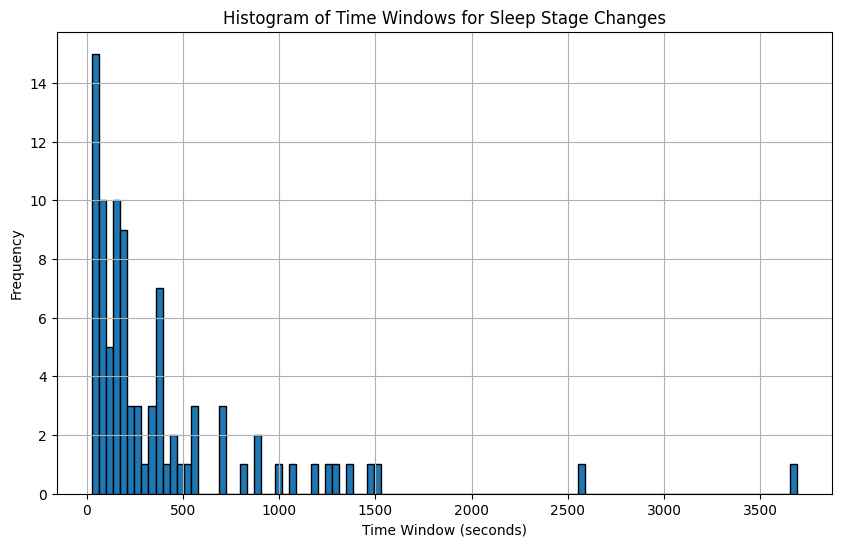

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
file_path = 'c:/Users/anany/Desktop/OSA/severe_csvs/EOG LOC-A2.csv'
df = pd.read_csv(file_path)

# Identify the time points where the sleep stage changes
sleep_stage_changes = df['user sleep stage'].ne(df['user sleep stage'].shift()).cumsum()

# Calculate the time windows between these changes
time_windows = df.groupby(sleep_stage_changes)['time'].apply(lambda x: x.max() - x.min()).values

# Plot a histogram of the time windows
plt.figure(figsize=(10, 6))
plt.hist(time_windows, bins=100, edgecolor='black')
plt.title('Histogram of Time Windows for Sleep Stage Changes')
plt.xlabel('Time Window (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [56]:
import numpy as np

min_window = np.min(time_windows)  # Absolute minimum
quantile_window = np.percentile(time_windows, 5)  # 5th percentile
print(f"Minimum Window: {min_window} seconds, Quantile Window: {quantile_window} seconds")

Minimum Window: 29.0 seconds, Quantile Window: 29.0 seconds


## RANDOM FOREST CLASSIFIER

In [57]:
data = {
    'times': severe_EEGO1A2['time'],
    'eeg': severe_EEGO1A2['signal'],
    'eog': severe_eog['signal'],
    'flow': severe_fp1['signal'],
    'snore': severe_snore['signal'],
    'stages': severe_EEGO1A2['user sleep stage']
}
df_for_rf = pd.DataFrame(data)

print(df_for_rf.head())

   times        eeg        eog      flow     snore stages
0    0.0   0.004776   0.004776  0.001526  0.001526   Wake
1    1.0  -2.338682   1.876629 -9.015111  0.564715   Wake
2    2.0 -55.157353  -1.452307 -5.475272 -0.058875   Wake
3    3.0 -44.892542 -27.395217 -1.477687  0.155936   Wake
4    4.0  -2.338682  12.515859 -1.318615  0.821252   Wake


In [58]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Identify the time points where the sleep stage changes
sleep_stage_changes = df_for_rf['stages'].ne(df_for_rf['stages'].shift()).cumsum()

# Extract the first 29 seconds of each sleep stage window
first_29_seconds = df_for_rf.groupby(sleep_stage_changes).head(29)

# Prepare the feature matrix (X) and target vector (y)
features = ['eeg', 'eog', 'flow', 'snore']  # Correct way to get a list of column names
X = first_29_seconds[features]
y = first_29_seconds['stages']

# Handle missing values if any
X = X.fillna(0)

# Split the data into training and testing sets (optional, for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set (optional, for evaluation)
y_pred = clf.predict(X_test)

# Evaluate the classifier (optional, for evaluation)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train on the entire data
clf.fit(X, y)

Accuracy: 0.2796934865900383
Classification Report:
               precision    recall  f1-score   support

     NonREM1       0.20      0.19      0.20        93
     NonREM2       0.28      0.48      0.36       133
     NonREM3       0.36      0.31      0.33       121
   NotScored       0.00      0.00      0.00         9
         REM       0.29      0.19      0.23        85
        Wake       0.22      0.14      0.17        81

    accuracy                           0.28       522
   macro avg       0.23      0.22      0.21       522
weighted avg       0.27      0.28      0.27       522



c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

RandomForestClassifier(random_state=42)

In [64]:
from scipy.stats import zscore

severe_EEGO1A2['z_fft_1_eeg'] = zscore(severe_EEGO1A2['fft_1'])
severe_eog['z_fft_1_eog'] = zscore(severe_eog['fft_1'])
severe_fp1['z_fft_1_flow'] = zscore(severe_fp1['fft_1'])
severe_snore['z_fft_1_snore'] = zscore(severe_snore['fft_1'])

data = {
    'times': severe_EEGO1A2['time'],
    'eeg': severe_EEGO1A2['signal'],
    'eog': severe_eog['signal'],
    'flow': severe_fp1['signal'],
    'snore': severe_snore['signal'],
    'stages': severe_EEGO1A2['user sleep stage'],
    'fft_1_eeg': severe_EEGO1A2['fft_1'],
    'fft_1_eog': severe_eog['fft_1'],
    'fft_1_flow': severe_fp1['fft_1'],
    'fft_1_snore': severe_snore['fft_1'],
    'z_fft_1_eeg': severe_EEGO1A2['z_fft_1_eeg'],
    'z_fft_1_eog': severe_eog['z_fft_1_eog'],
    'z_fft_1_flow': severe_fp1['z_fft_1_flow'],
    'z_fft_1_snore': severe_snore['z_fft_1_snore']
}
df_for_rf = pd.DataFrame(data)

sleep_stage_changes = df_for_rf['stages'].ne(df_for_rf['stages'].shift()).cumsum()

# Extract the first 29 seconds of each sleep stage window
first_29_seconds = df_for_rf.groupby(sleep_stage_changes).head(29)

# Prepare the feature matrix (X) and target vector (y)
features = ['fft_1_eeg', 'fft_1_eog', 'fft_1_flow', 'fft_1_snore']  # Correct way to get a list of column names
X = first_29_seconds[features]
y = first_29_seconds['stages']

# Handle missing values if any
X = X.fillna(0)

# Split the data into training and testing sets (optional, for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set (optional, for evaluation)
y_pred = clf.predict(X_test)

# Evaluate the classifier (optional, for evaluation)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train on the entire data
clf.fit(X, y)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

     NonREM1       1.00      1.00      1.00        93
     NonREM2       1.00      1.00      1.00       133
     NonREM3       1.00      1.00      1.00       121
   NotScored       1.00      1.00      1.00         9
         REM       1.00      1.00      1.00        85
        Wake       1.00      1.00      1.00        81

    accuracy                           1.00       522
   macro avg       1.00      1.00      1.00       522
weighted avg       1.00      1.00      1.00       522



RandomForestClassifier(random_state=42)

In [65]:
features = ['z_fft_1_eeg', 'z_fft_1_eog', 'z_fft_1_flow', 'z_fft_1_snore']  # Correct way to get a list of column names
X = first_29_seconds[features]
y = first_29_seconds['stages']

# Handle missing values if any
X = X.fillna(0)

# Split the data into training and testing sets (optional, for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set (optional, for evaluation)
y_pred = clf.predict(X_test)

# Evaluate the classifier (optional, for evaluation)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train on the entire data
clf.fit(X, y)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

     NonREM1       1.00      1.00      1.00        93
     NonREM2       1.00      1.00      1.00       133
     NonREM3       1.00      1.00      1.00       121
   NotScored       1.00      1.00      1.00         9
         REM       1.00      1.00      1.00        85
        Wake       1.00      1.00      1.00        81

    accuracy                           1.00       522
   macro avg       1.00      1.00      1.00       522
weighted avg       1.00      1.00      1.00       522



RandomForestClassifier(random_state=42)

In [68]:
data_128 = {
    'times': np.linspace(0, 4430208, 4430208),
    'eeg': EEG_signal_sev_128hz,
    'eog': EOG_signal_sev_128hz,
    'flow': Flow_signal_sev_128hz,
    'snore': Snore_signal_sev_128hz,
    'fft_128_eeg': make_reconstructed_fft(EEG_signal_sev_128hz, 128),
    'fft_128_eog': make_reconstructed_fft(EOG_signal_sev_128hz, 128),
    'fft_128_flow': make_reconstructed_fft(Flow_signal_sev_128hz, 128),
    'fft_128_snore': make_reconstructed_fft(Snore_signal_sev_128hz, 128),
    'z_fft_128_eeg': zscore(make_reconstructed_fft(EEG_signal_sev_128hz, 128)),
    'z_fft_128_eog': zscore(make_reconstructed_fft(EOG_signal_sev_128hz, 128)),
    'z_fft_128_flow': zscore(make_reconstructed_fft(Flow_signal_sev_128hz, 128)),
    'z_fft_128_snore': zscore(make_reconstructed_fft(Snore_signal_sev_128hz, 128))  
}

df_for_rf_128 = pd.DataFrame(data_128)  


In [71]:
time_128hz = df_for_rf_128['times']

df_for_rf['stages'] = df_for_rf['stages'].astype('category')
df_for_rf_128['stages'] = np.interp(time_128hz, df_for_rf['times'], df_for_rf['stages'].cat.codes, left=np.nan, right=np.nan)
df_for_rf_128['stages'] = pd.Series(df_for_rf_128['stages']).ffill().bfill().round().astype(int)
df_for_rf_128['stages'] = df_for_rf_128['stages'].map(dict(enumerate(df_for_rf['stages'].cat.categories)))

print(df_for_rf_128.head())

      times       eeg       eog      flow     snore  fft_128_eeg  fft_128_eog  \
0  0.000000  0.004776  0.004776  0.001526  0.001526    -1.157637    13.290102   
1  1.000000  0.004776  0.004776  0.001526  0.001526    -1.157637    13.290103   
2  2.000000  0.004776  0.004776  0.001526  0.001526    -1.157638    13.290103   
3  3.000001  0.004776  0.004776  0.001526  0.001526    -1.157639    13.290104   
4  4.000001  0.004776  0.004776  0.001526  0.001526    -1.157639    13.290104   

   fft_128_flow  fft_128_snore  z_fft_128_eeg  z_fft_128_eog  z_fft_128_flow  \
0      0.000638      -0.011854      -0.003895       0.213314        0.187729   
1      0.000638      -0.011854      -0.003899       0.213317        0.187725   
2      0.000638      -0.011854      -0.003903       0.213319        0.187722   
3      0.000638      -0.011854      -0.003907       0.213322        0.187718   
4      0.000638      -0.011854      -0.003911       0.213325        0.187715   

   z_fft_128_snore stages  
0   

In [72]:
sleep_stage_changes = df_for_rf_128['stages'].ne(df_for_rf_128['stages'].shift()).cumsum()

# Extract the first 29 seconds of each sleep stage window
first_29_seconds = df_for_rf_128.groupby(sleep_stage_changes).head(29*128)

# Prepare the feature matrix (X) and target vector (y)
features = ['fft_128_eeg', 'fft_128_eog', 'fft_128_flow', 'fft_128_snore']  # Correct way to get a list of column names
X = first_29_seconds[features]
y = first_29_seconds['stages']

# Handle missing values if any
X = X.fillna(0)

# Split the data into training and testing sets (optional, for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set (optional, for evaluation)
y_pred = clf.predict(X_test)

# Evaluate the classifier (optional, for evaluation)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train on the entire data
clf.fit(X, y)

Accuracy: 0.998166819431714
Classification Report:
               precision    recall  f1-score   support

     NonREM1       0.99      1.00      0.99       484
     NonREM2       1.00      1.00      1.00      2470
     NonREM3       1.00      1.00      1.00      2308
   NotScored       1.00      1.00      1.00       707
         REM       1.00      1.00      1.00      1339
        Wake       0.99      0.99      0.99       329

    accuracy                           1.00      7637
   macro avg       1.00      1.00      1.00      7637
weighted avg       1.00      1.00      1.00      7637



RandomForestClassifier(random_state=42)

In [63]:
import joblib
joblib.dump(clf, 'random_forest_sleep_stage_classifier.pkl')

print("Model trained and saved successfully.")

Model trained and saved successfully.


In [73]:
features = ['z_fft_128_eeg', 'z_fft_128_eog', 'z_fft_128_flow', 'z_fft_128_snore']  # Correct way to get a list of column names
X = first_29_seconds[features]
y = first_29_seconds['stages']

# Handle missing values if any
X = X.fillna(0)

# Split the data into training and testing sets (optional, for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set (optional, for evaluation)
y_pred = clf.predict(X_test)

# Evaluate the classifier (optional, for evaluation)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train on the entire data
clf.fit(X, y)

Accuracy: 0.998166819431714
Classification Report:
               precision    recall  f1-score   support

     NonREM1       0.99      1.00      0.99       484
     NonREM2       1.00      1.00      1.00      2470
     NonREM3       1.00      1.00      1.00      2308
   NotScored       1.00      1.00      1.00       707
         REM       1.00      1.00      1.00      1339
        Wake       1.00      0.99      0.99       329

    accuracy                           1.00      7637
   macro avg       1.00      1.00      1.00      7637
weighted avg       1.00      1.00      1.00      7637



RandomForestClassifier(random_state=42)

In [74]:
import joblib
joblib.dump(clf, 'random_forest_sleep_stage_classifier_zscore.pkl')

print("Model trained and saved successfully.")

Model trained and saved successfully.
